In [1]:
rm(list=ls())
require(tidyr)
require(ggplot2)
require(coda)

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: coda


# Estimate S using wf simulations

In [2]:
##wf simulations to just produce s values (not f1, f2), can input multiple ne values with multiple generations
wfs_bs_simp=function(x, ne=c(598), gen=1, smin=-1, smax=1){
    ##determine direction of maf change  to determine outliers
    f2s=replicate(100, mapply(wfs_byf1_variablene_s,  x[,2], MoreArgs = list(gen=gen, ne=ne, h=0.5, smin=-1, smax=1)))
    f2s=as.data.frame(f2s)
    snp=x[1,1]
    f2s$SNP=snp
    out=f2s
return(out)

}

# gen: the number of generations to simulate
# ne: the effective population size (in number of alleles) for each sampled generation; length(n) == gen
wfs_byf1_variablene_s <- function(f1=0.5, gen=2, ne=c(1000,10), h=0.5, smin=-1, smax=1){ 
#using bootstrapped values as f1 and f2. comparing f2 to simulated f2s. 
	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
    ##for some reason angsd gave some bootstrapped f1s that are > 1...so round to 1. 
    if(f1>1) f1=round(f1)
	#print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,ne[i],x)/ne[i]
		#print(paste(x,p))
	}
	f2 <- p
	
	# return values
	out = c(f1,f2, s)
        return(out)
}


In [19]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }
    out=c(simfull, f2bs)
return(out)
}


In [4]:
#only need to do this for significant snps
comPvaluesChrNJNY50sig_out=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv", row.names=1)

In [5]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NJNY50_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs")
nj_files = list.files( pattern="NJ_")
NJ=lapply(nj_files, read.table, header=T)

In [6]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NYUnoout_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs/")
ny_files = list.files( pattern="NY_")
NY=lapply(ny_files, read.table, header=T)

In [21]:
NJ_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NJ)
NY_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NY)

In [ ]:
1661413 dataframe 6

In [22]:
lapply(NY_sig, `[`, 2, )

,SNP,MAF_U,MAF_E,nInd_U,nInd_E
2,11932,0.335778,0.78819,10,12
,SNP,MAF_U,MAF_E,nInd_U,nInd_E
2,1241213,0.524043,0.743304,13,10
,SNP,MAF_U,MAF_E,nInd_U,nInd_E
2,1396110,0.807491,0.129724,15,13
,SNP,MAF_U,MAF_E,nInd_U,nInd_E
2,1484586,0.488114,3e-06,9,12
,SNP,MAF_U,MAF_E,nInd_U,nInd_E
2,14993622,0.860941,0.071348,12,13
,SNP,MAF_U,MAF_E,nInd_U,nInd_E


In [9]:
NJ_f2s=lapply(NJ_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NJ_f2s=lapply(NJ_f2s, t)
NJ_f2s=lapply(NJ_f2s, as.data.frame)
tNJ_f2s=lapply(NJ_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [ ]:
lapply(tNJ_f2s, `[`, 2, )

In [ ]:
#f1s and simulated f2s for 2056629
head(tNJ_f2s[12])

In [76]:
#simulated f2s for SNp 11932
#head(tNJ_f2scount[1])

In [11]:
NY_f2s=lapply(NY_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [17]:
#Add count column and count up number of times a simulated f2 is in the top 1k closest to a given bootstrapped f2. 
NY_f2scount=mapply(wfs_bs_s_count, NY_sig, tNY_f2s, SIMPLIFY=FALSE)
NJ_f2scount=mapply(wfs_bs_s_count, NJ_sig, tNJ_f2s, SIMPLIFY=FALSE)

In [22]:
#sample based on count data produced to get 1000 s values 
sNJ=lapply(NJ_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})
sNY=lapply(NY_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})

Doesnt work when f1 is 0 or 1. 

In [ ]:
head(NJ_f2scount[2])

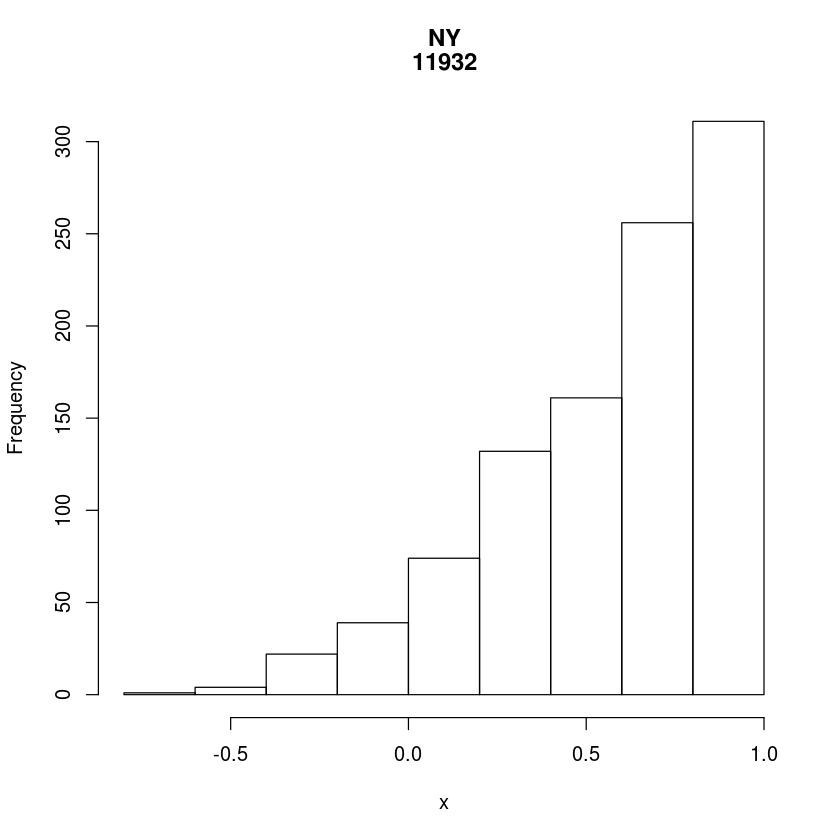

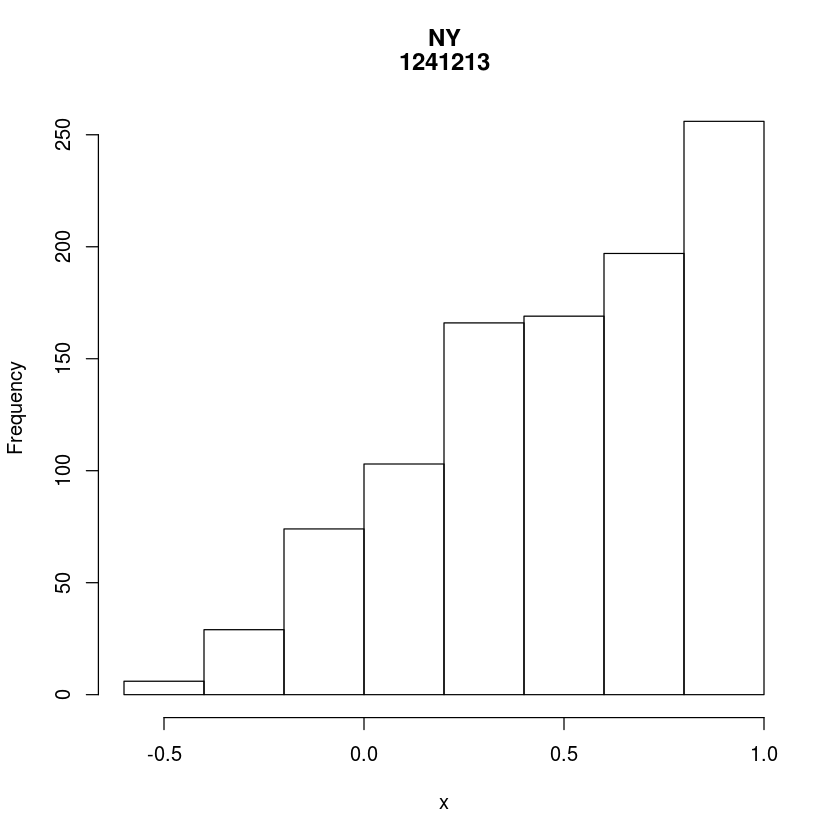

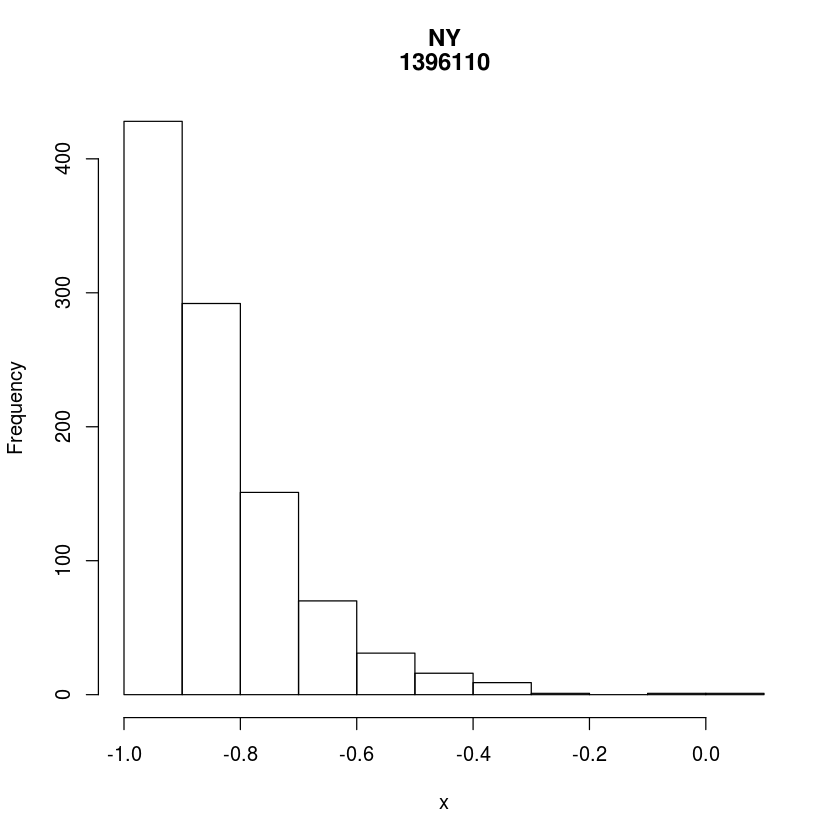

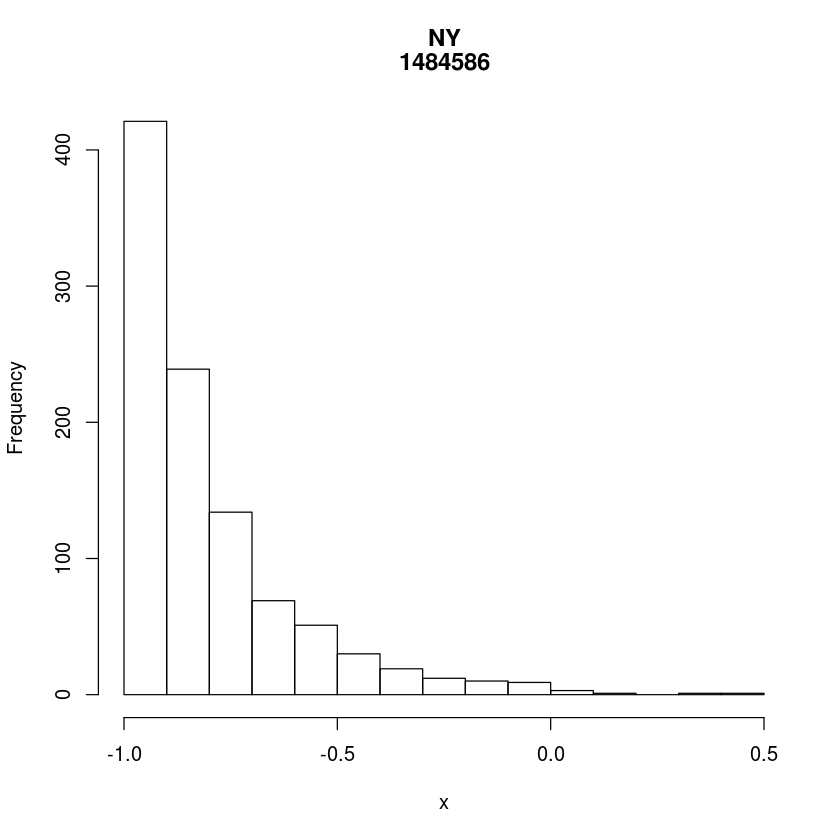

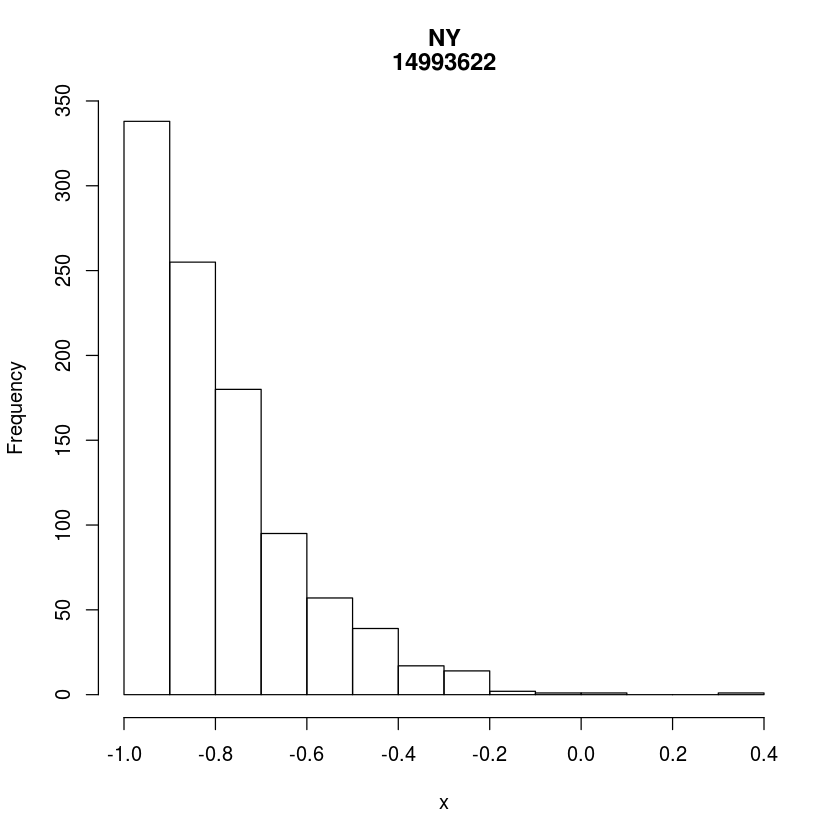

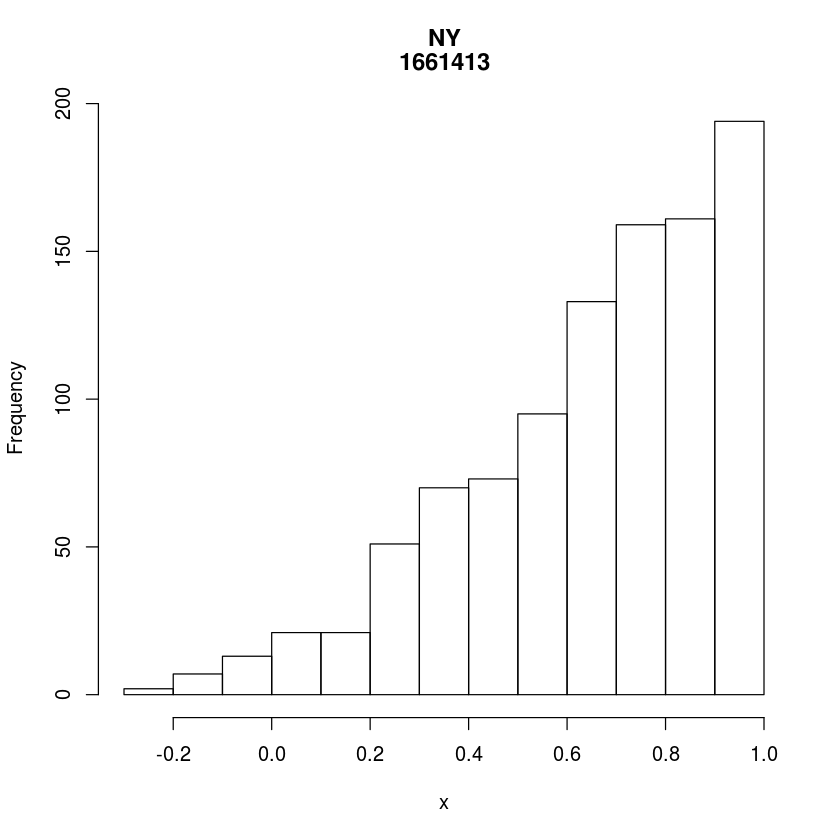

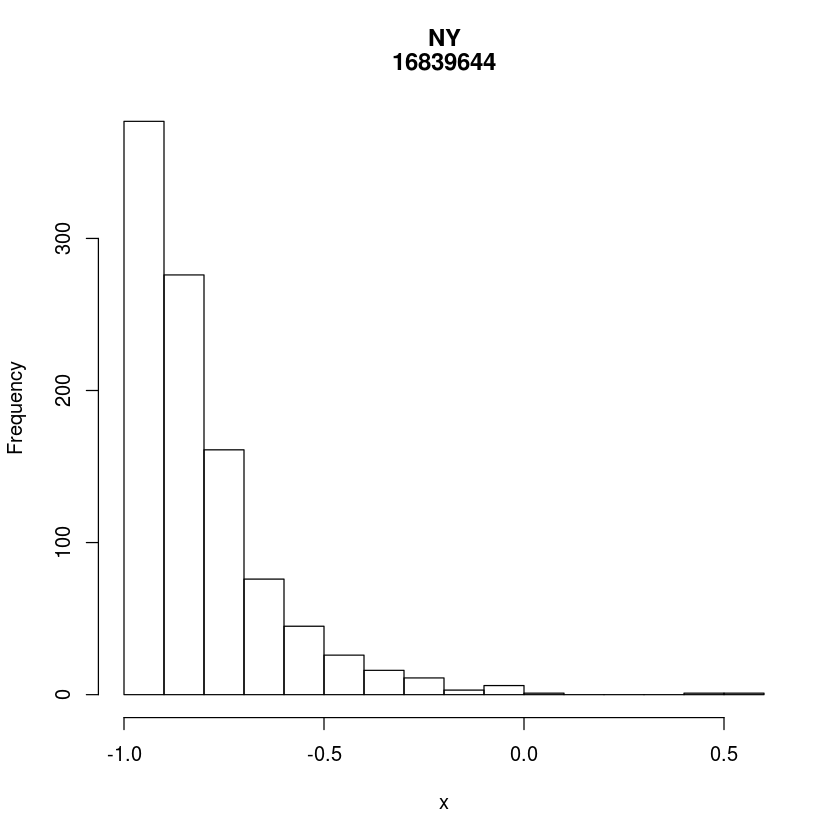

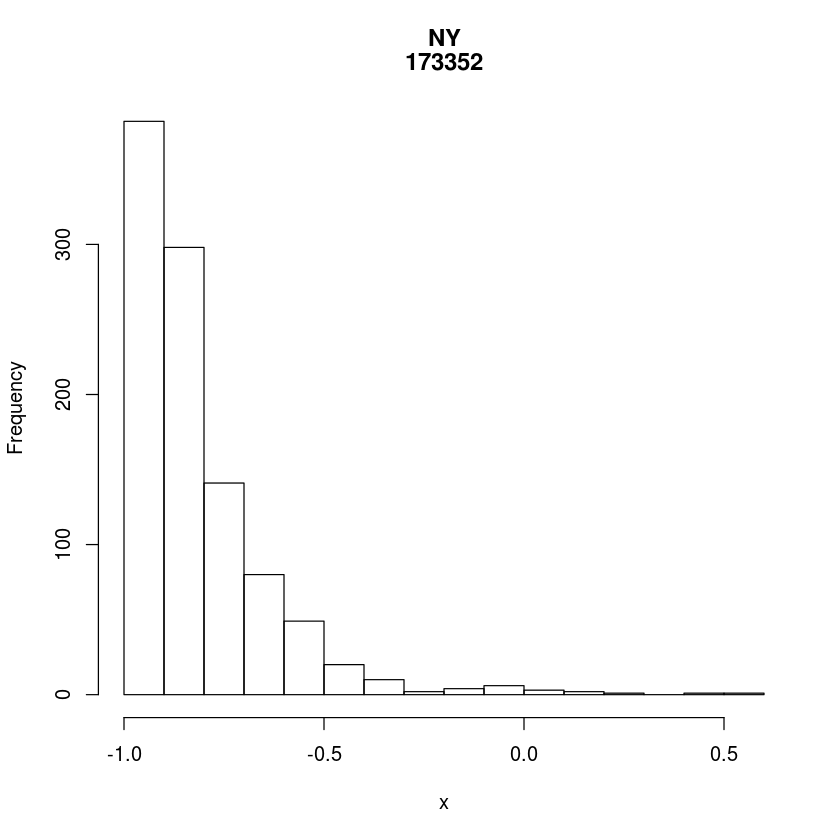

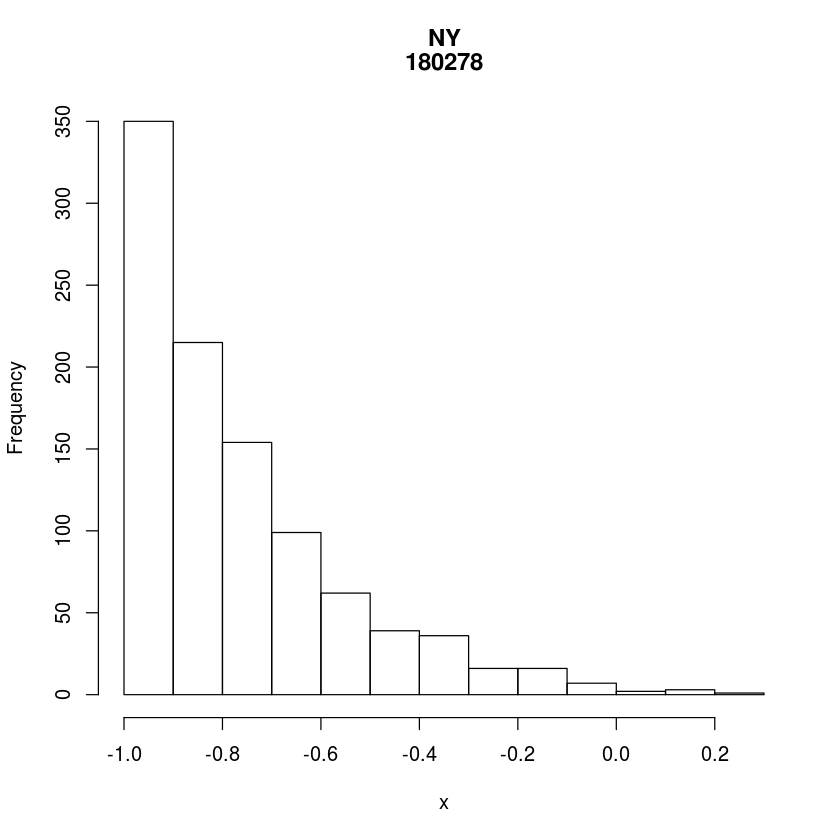

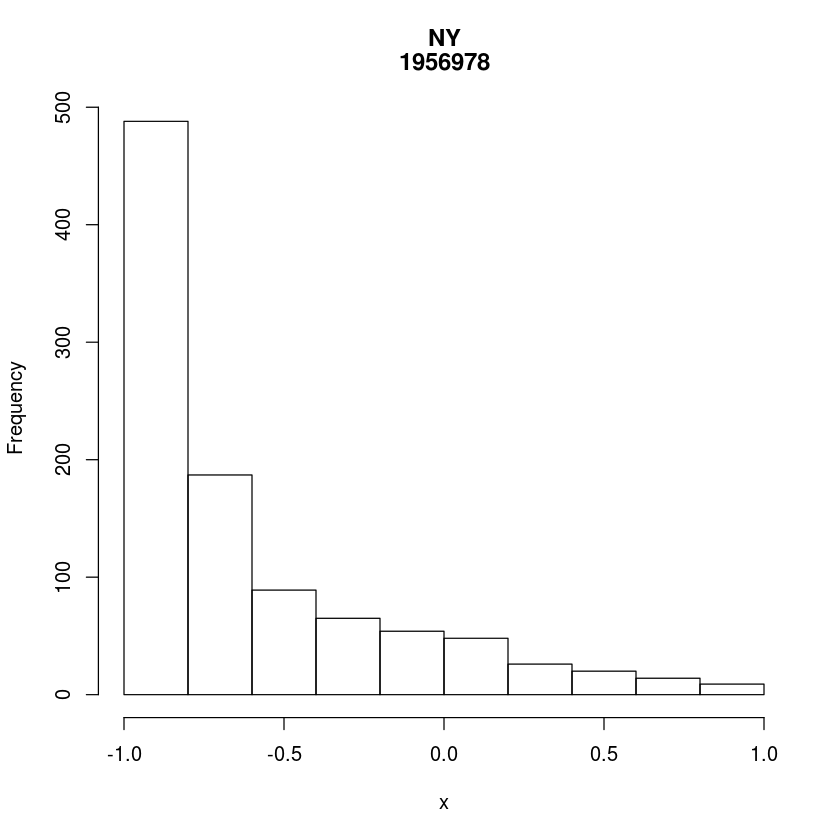

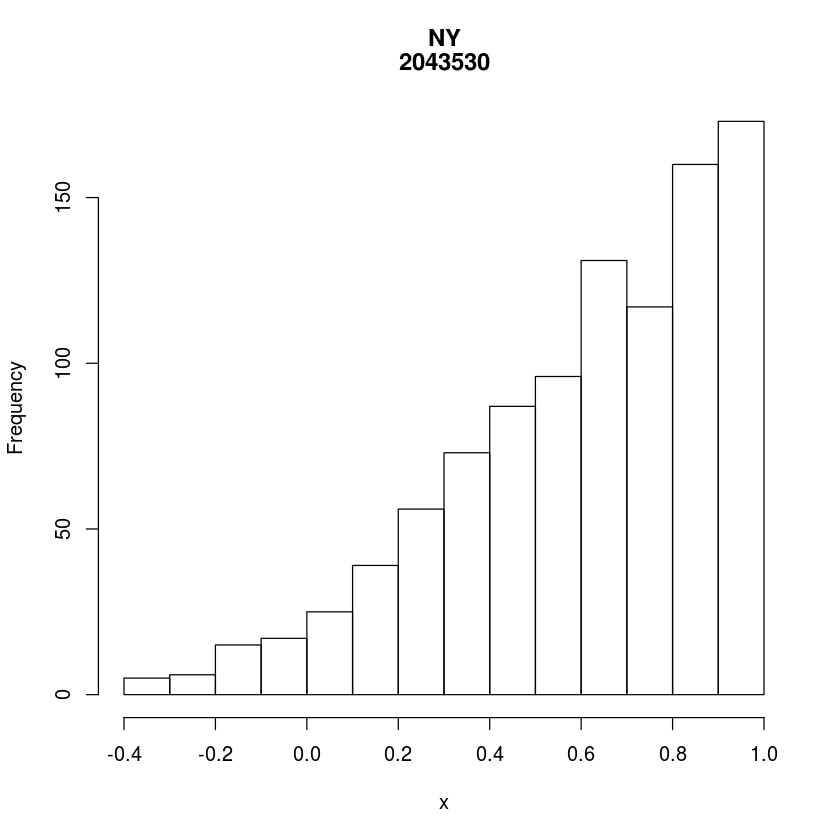

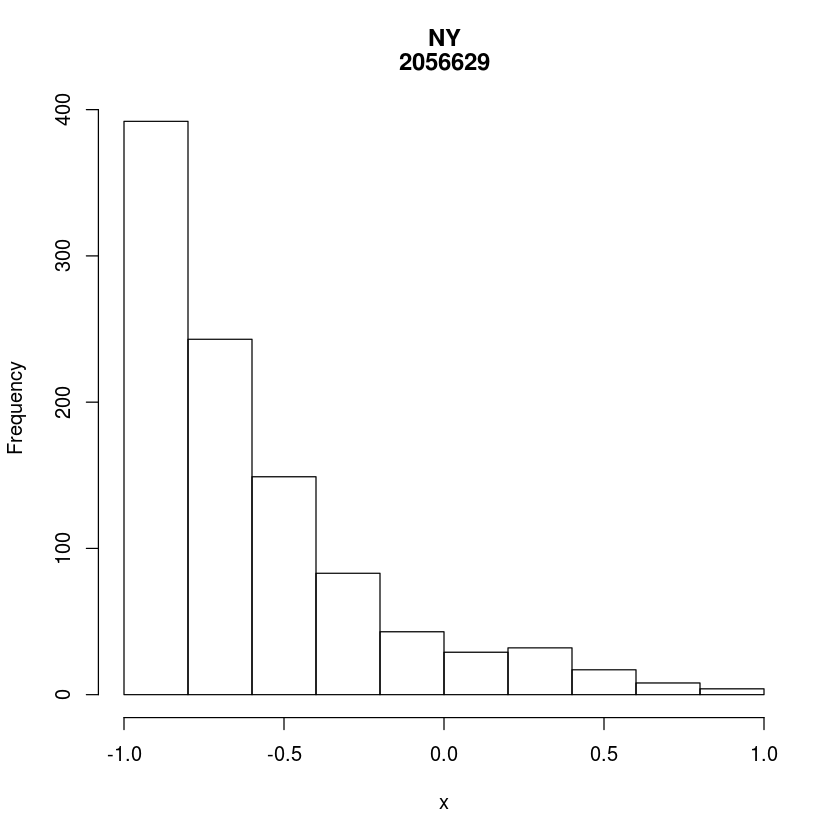

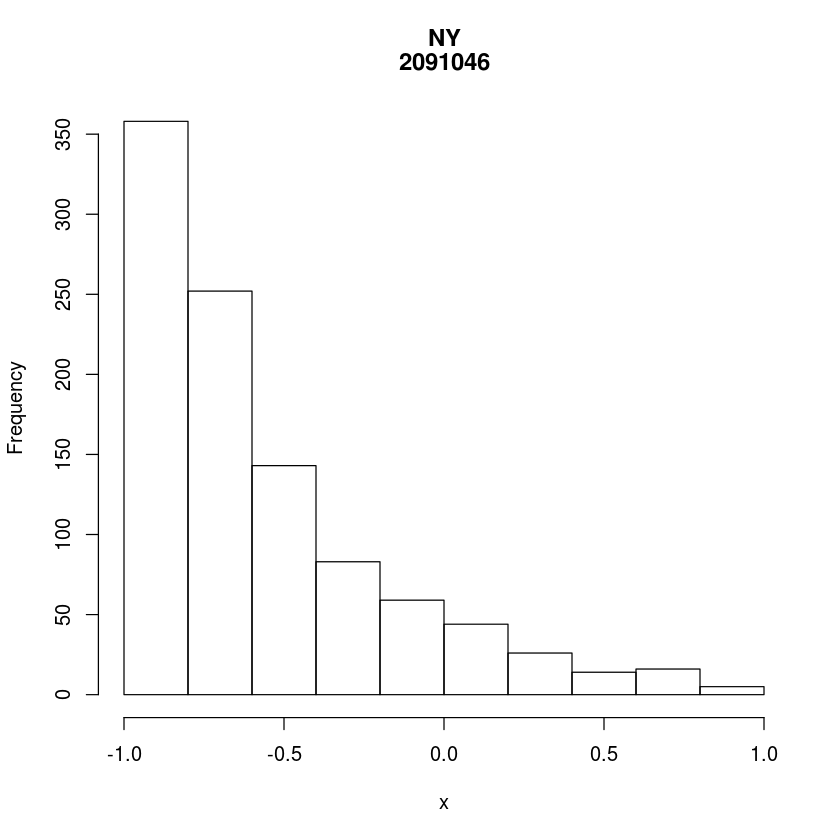

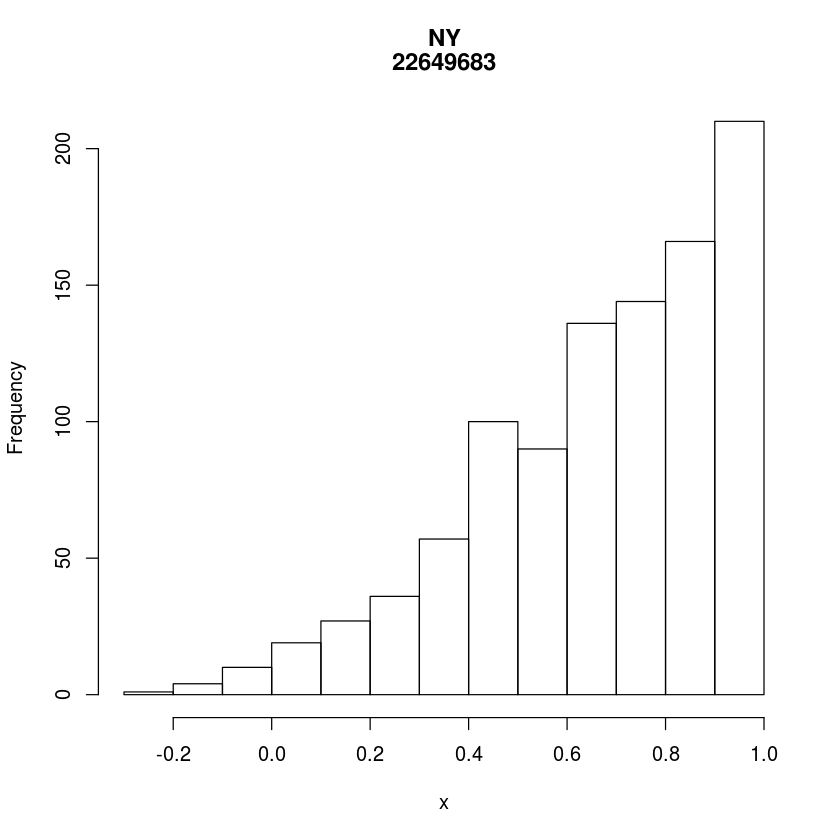

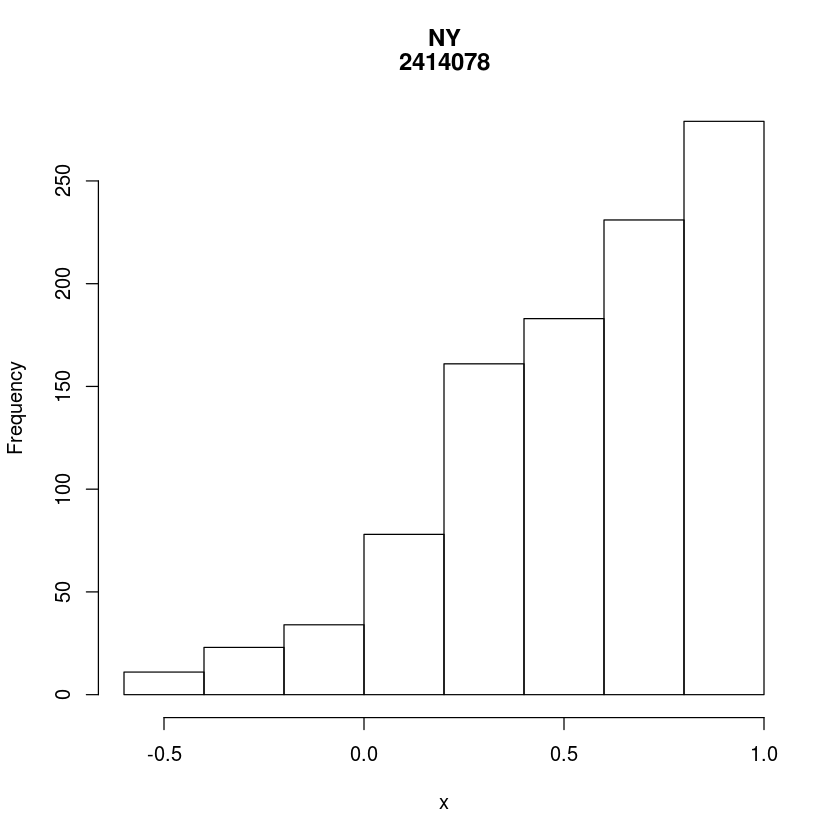

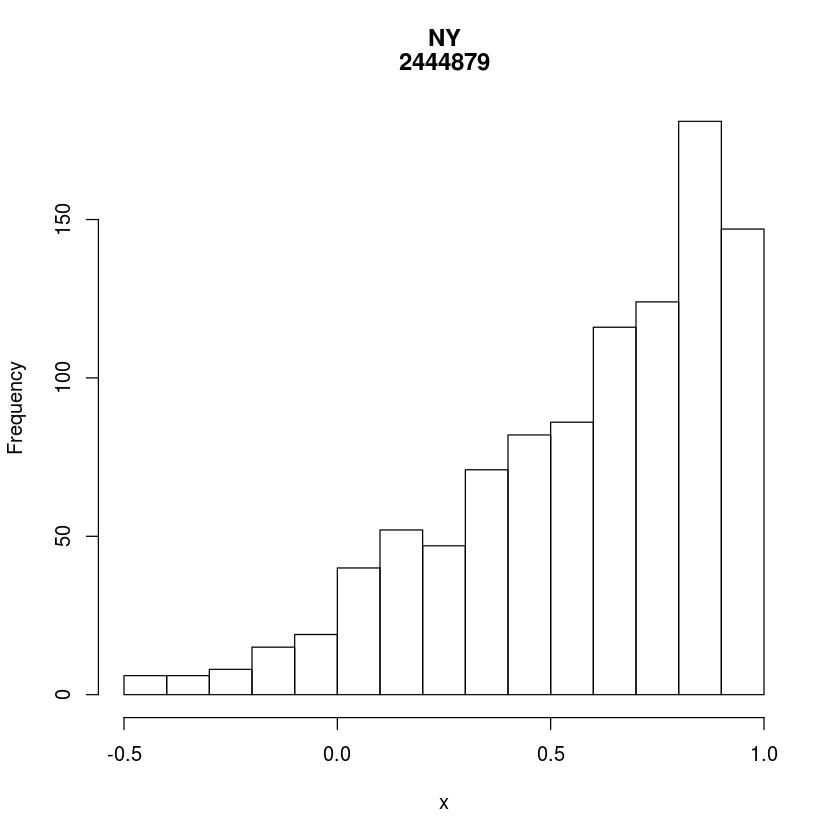

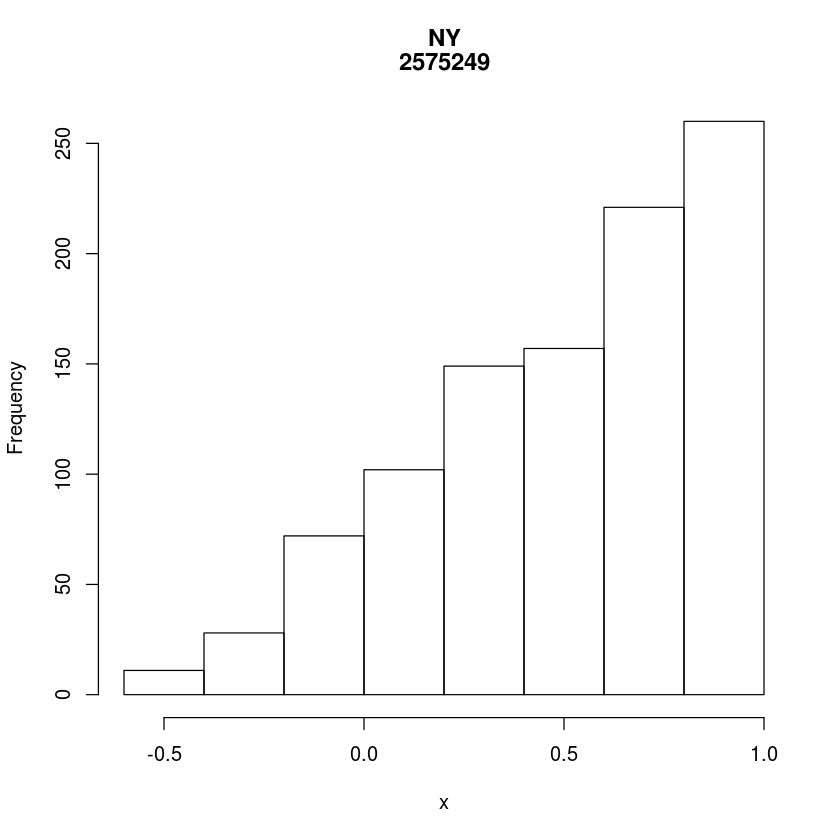

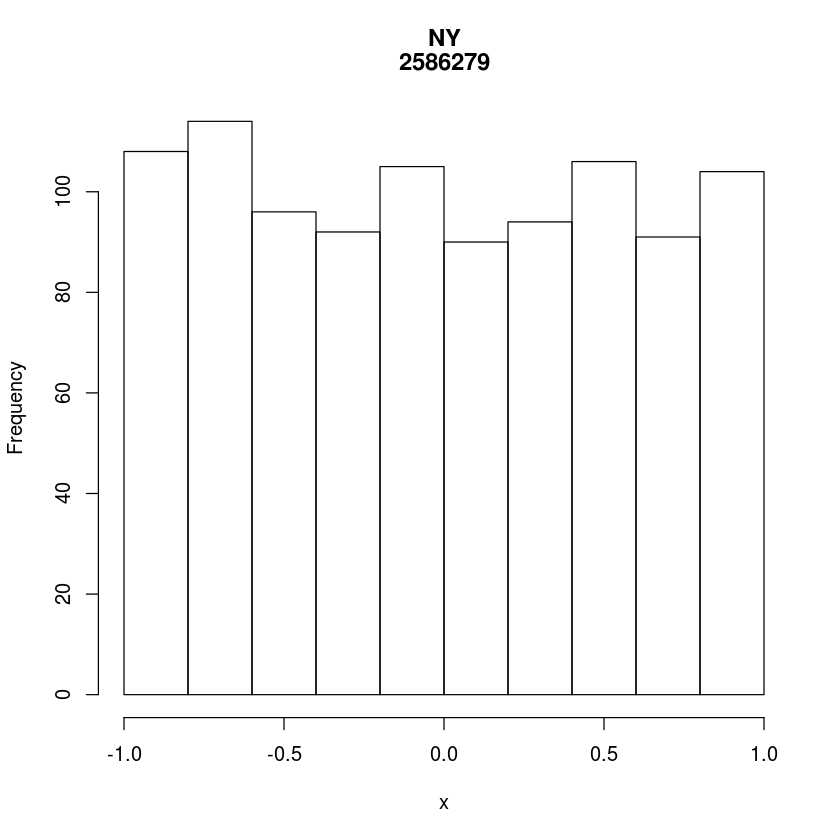

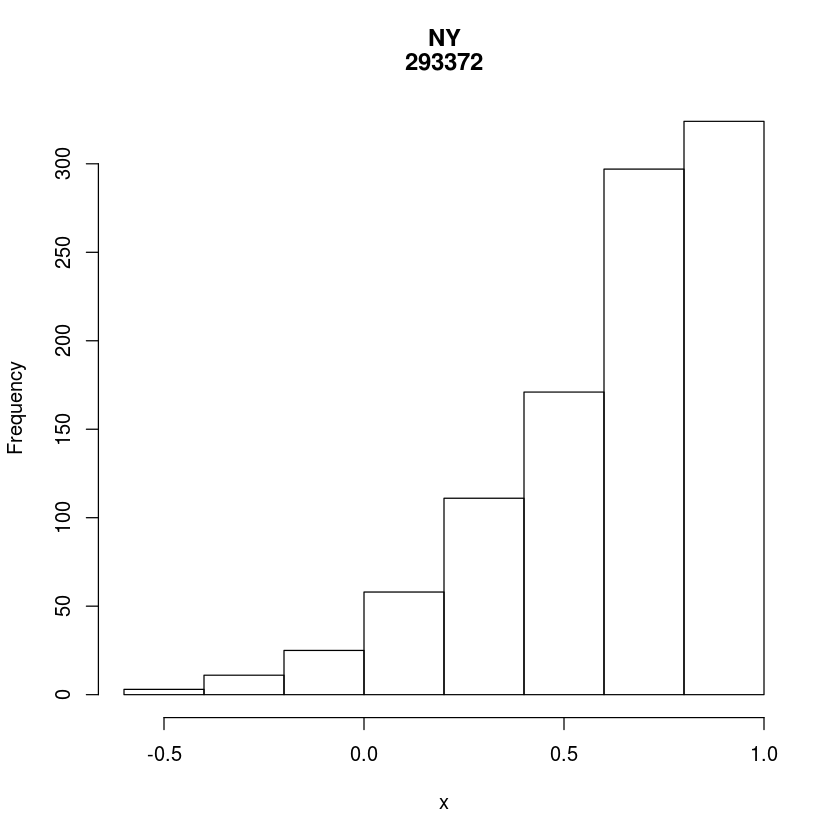

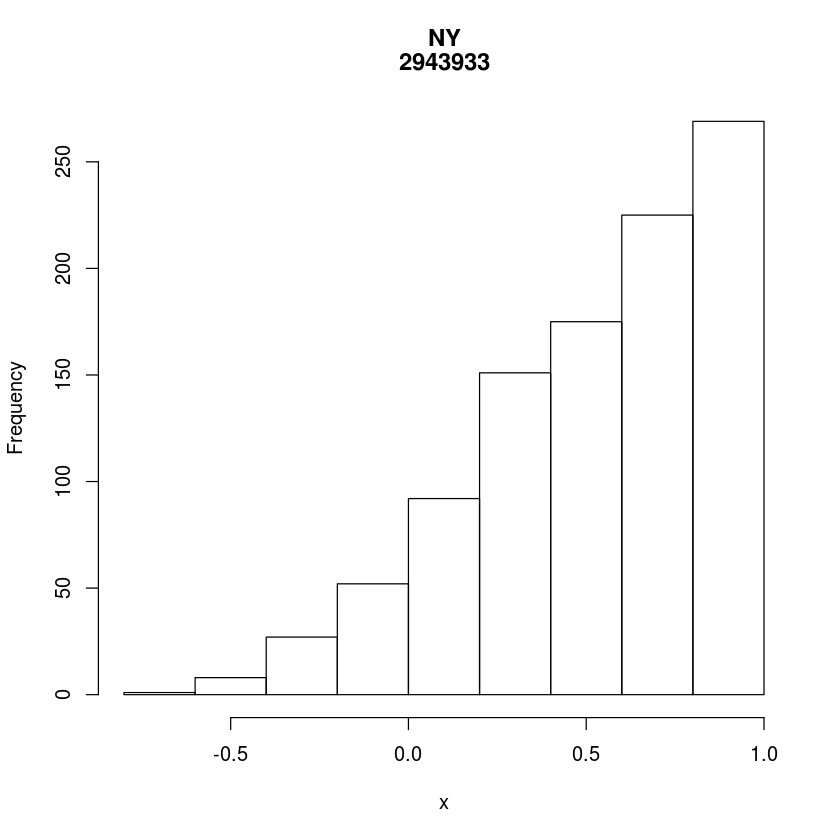

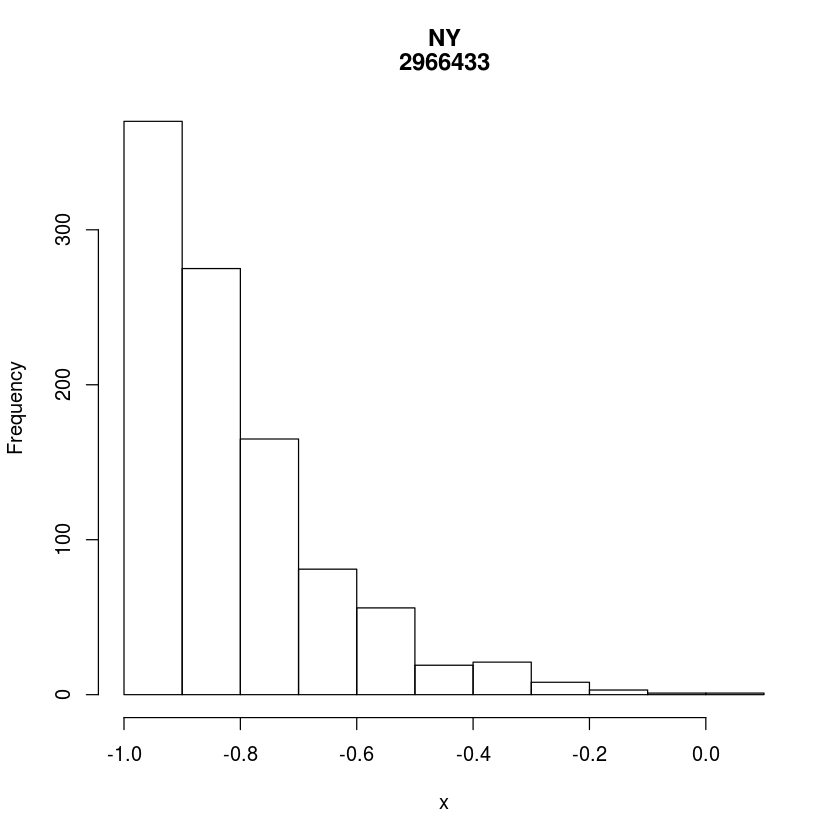

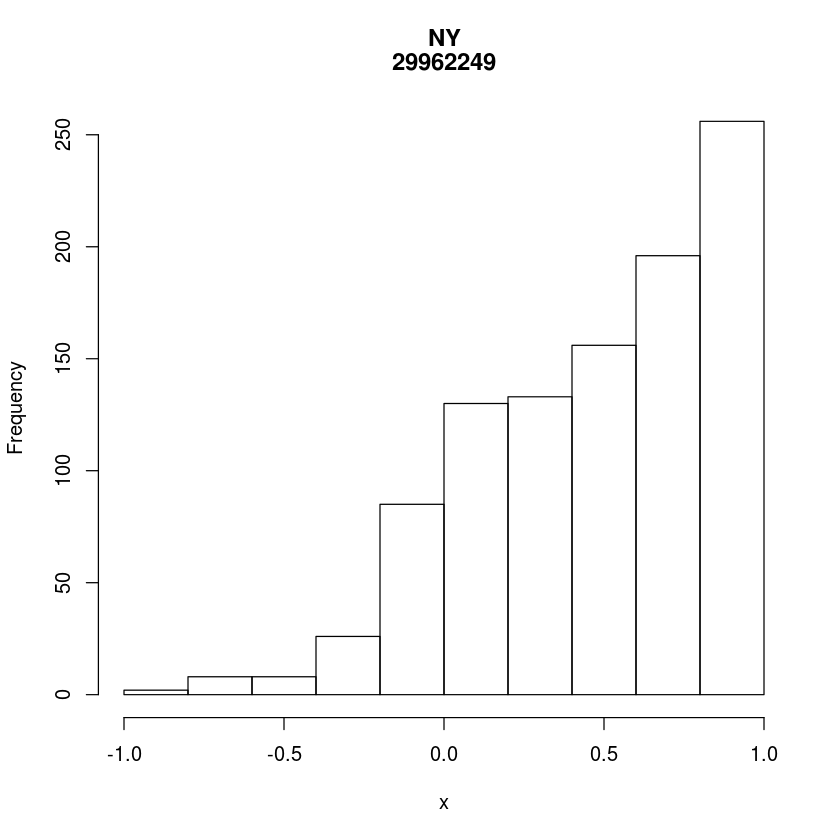

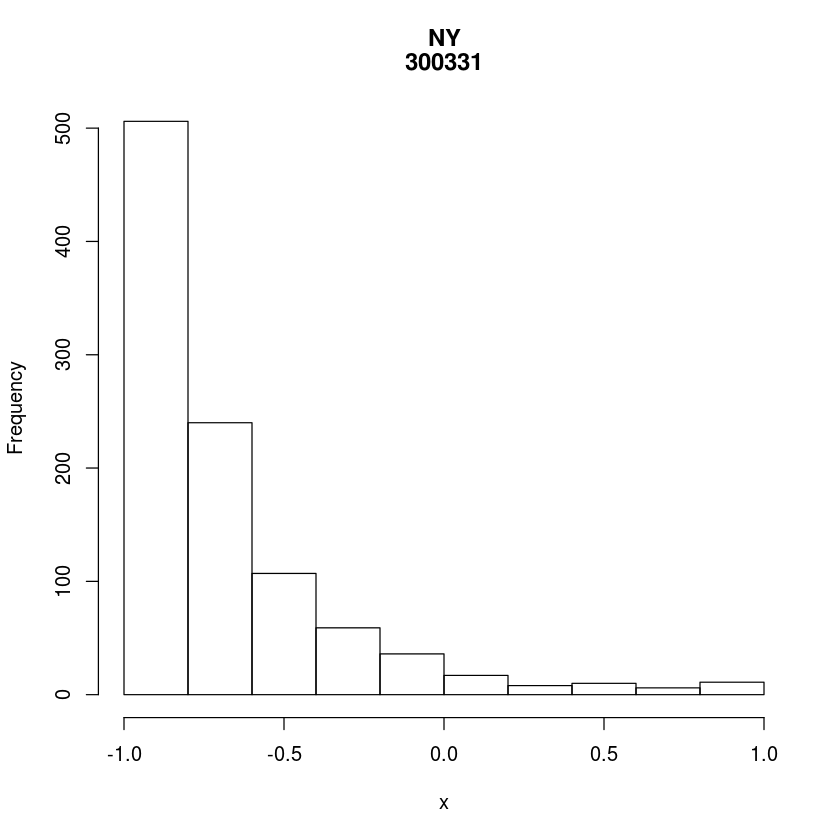

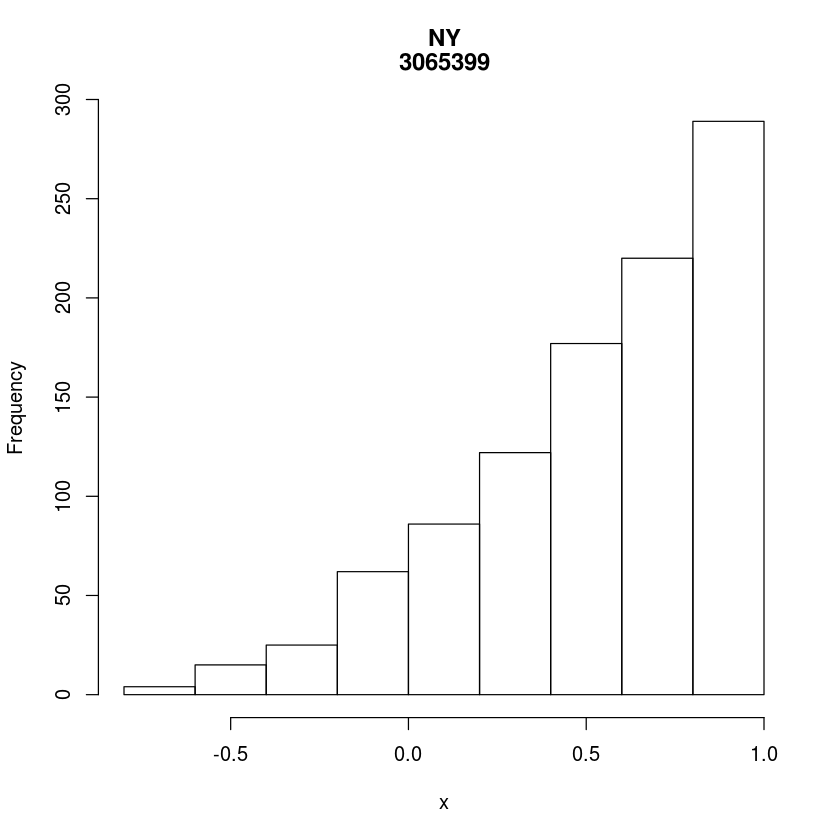

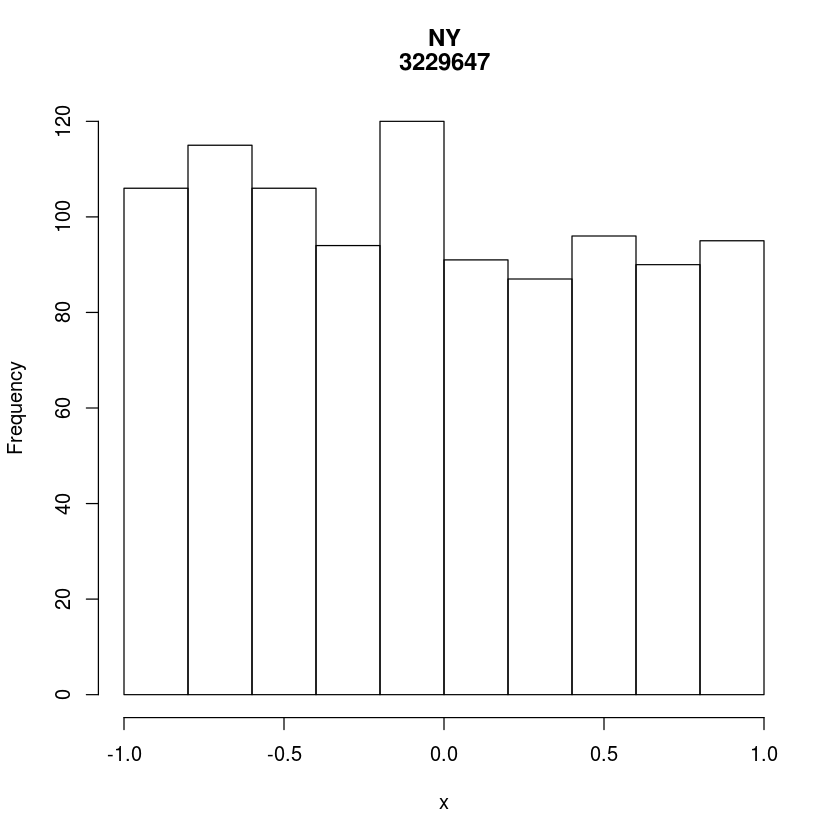

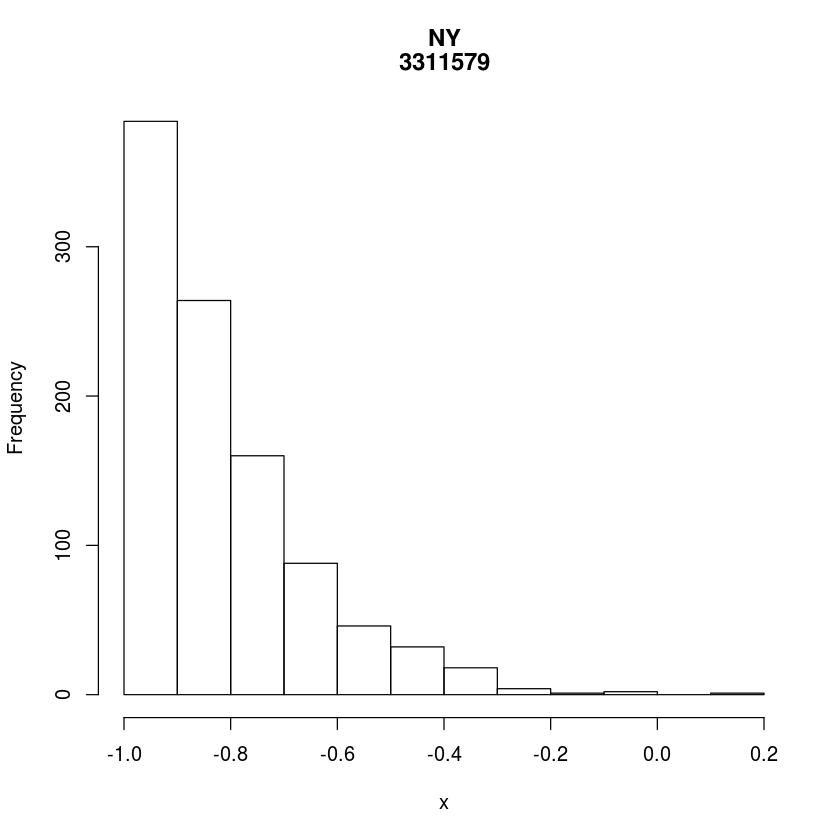

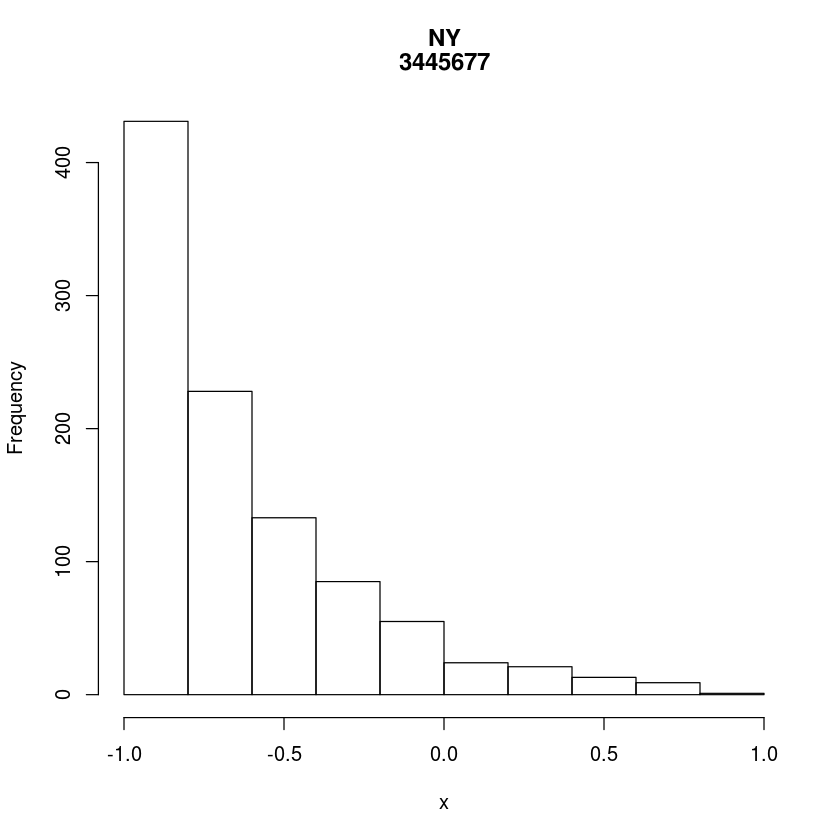

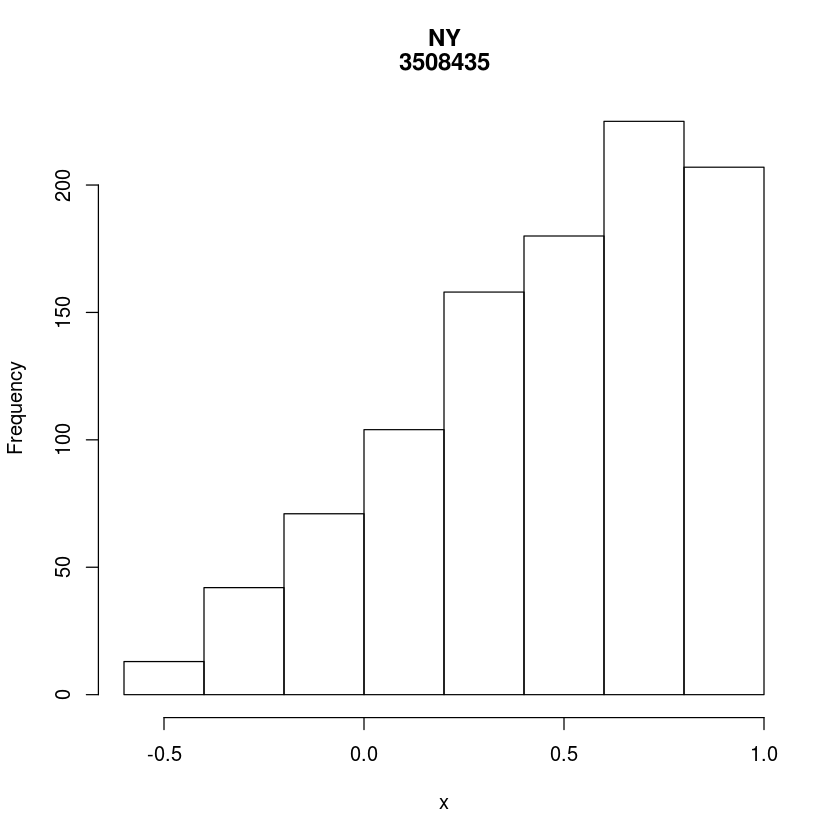

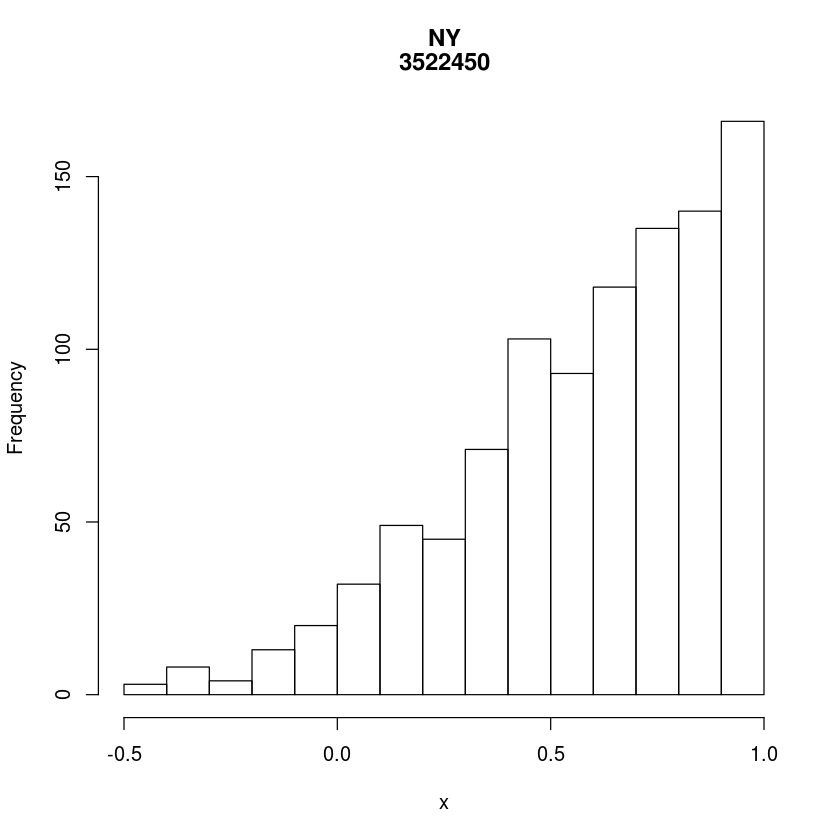

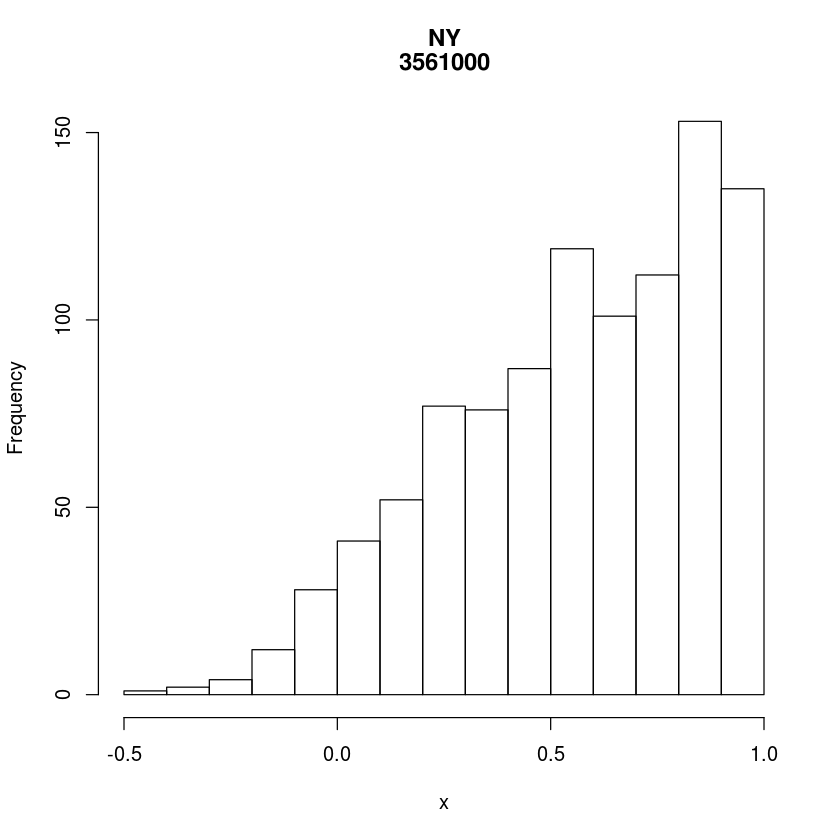

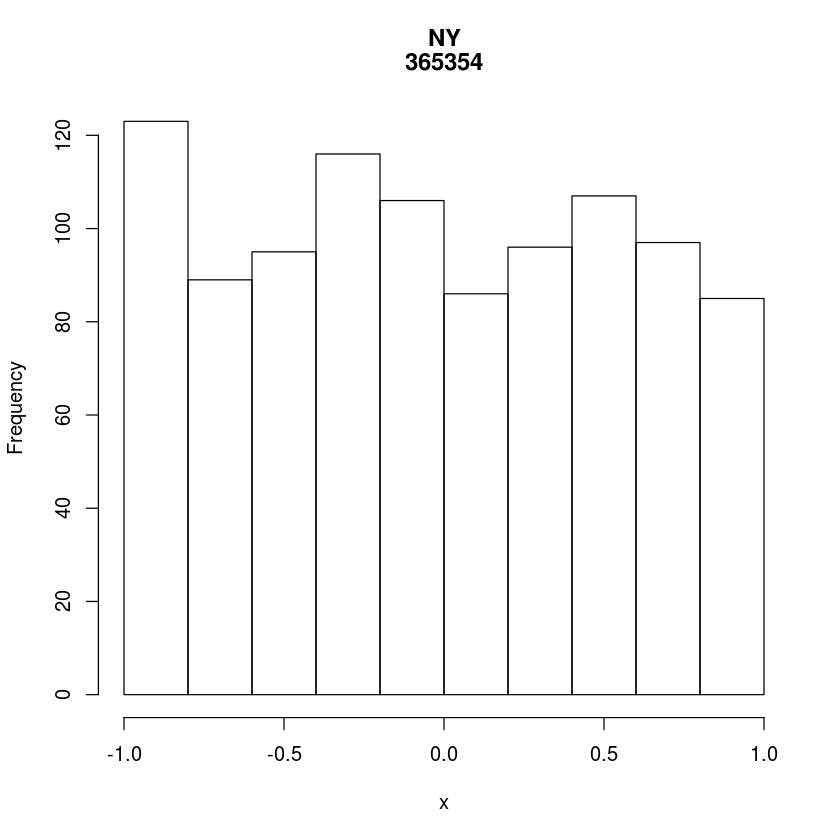

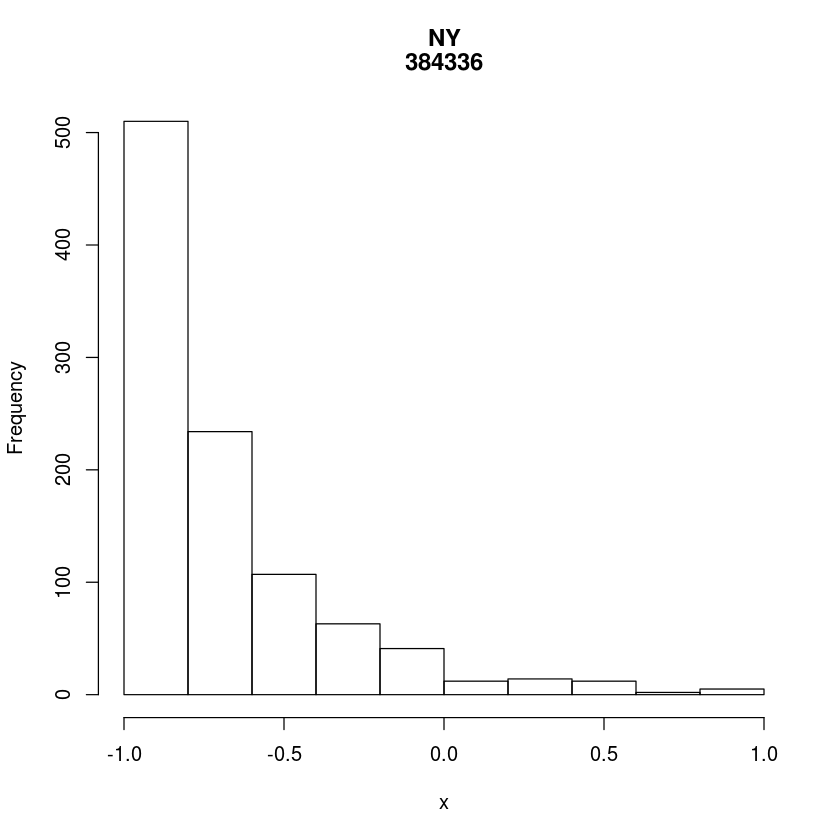

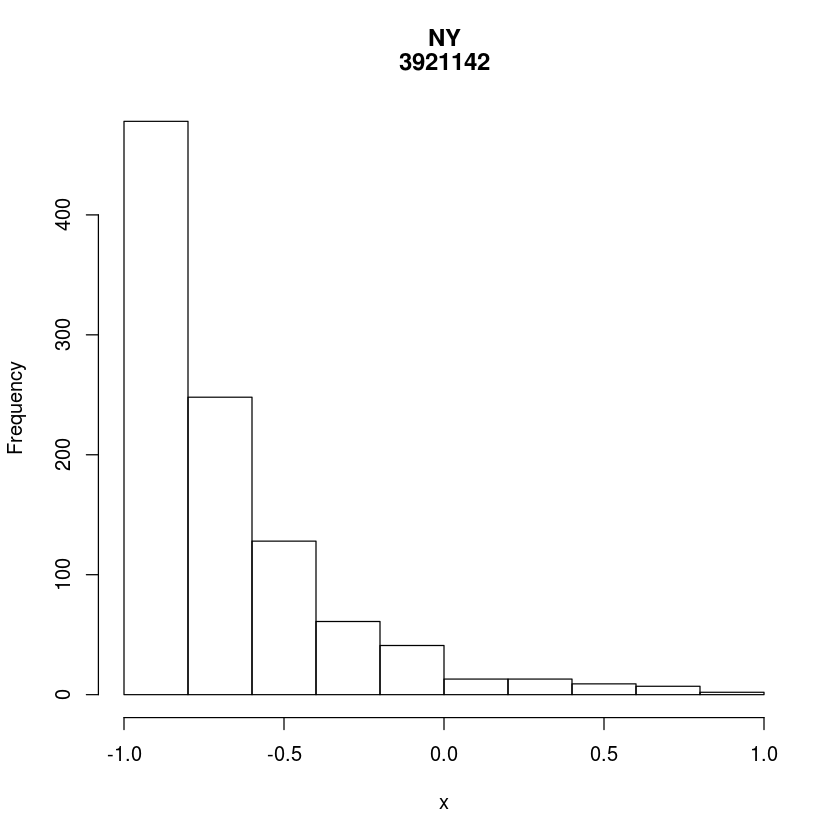

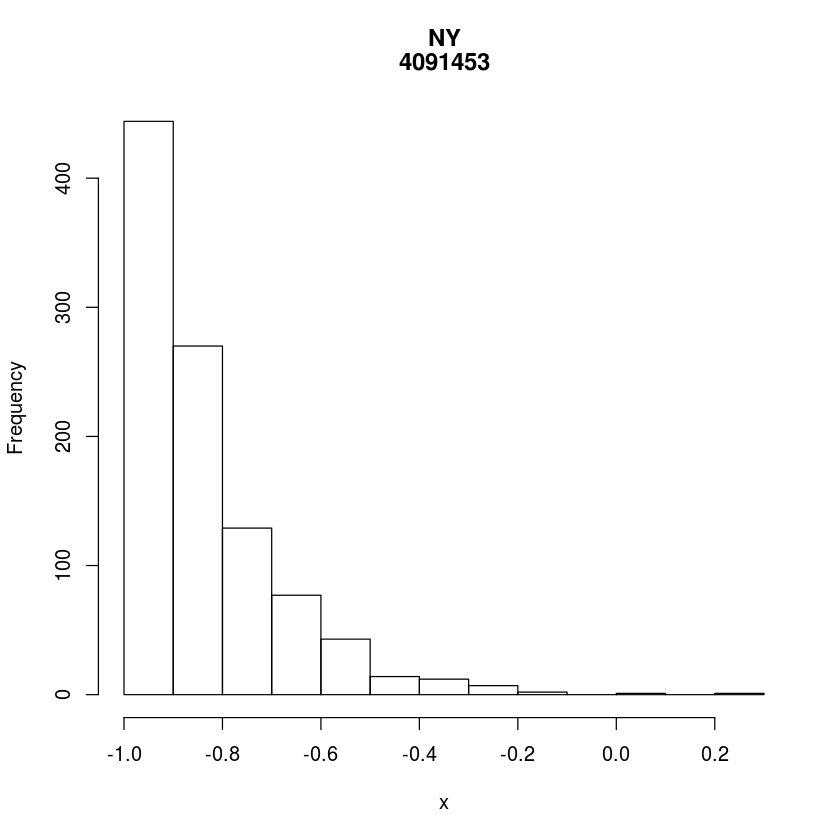

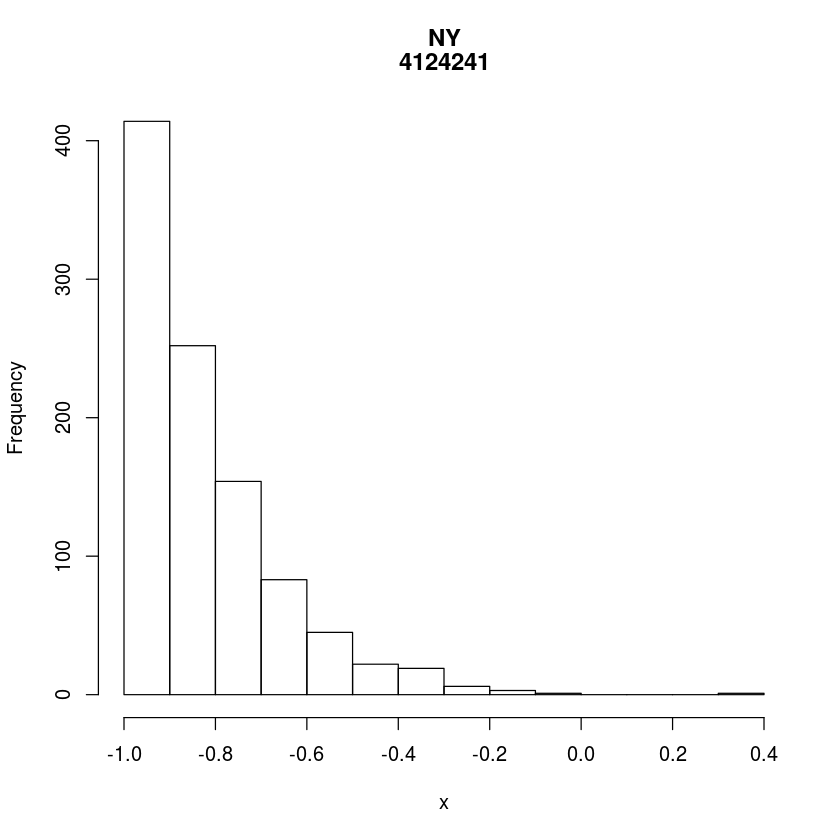

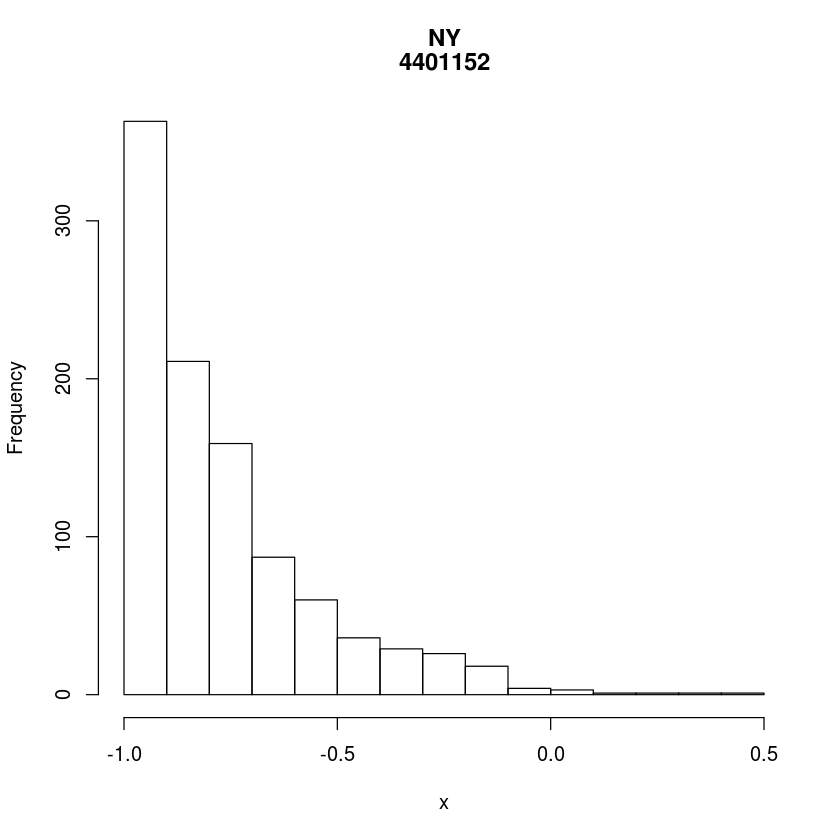

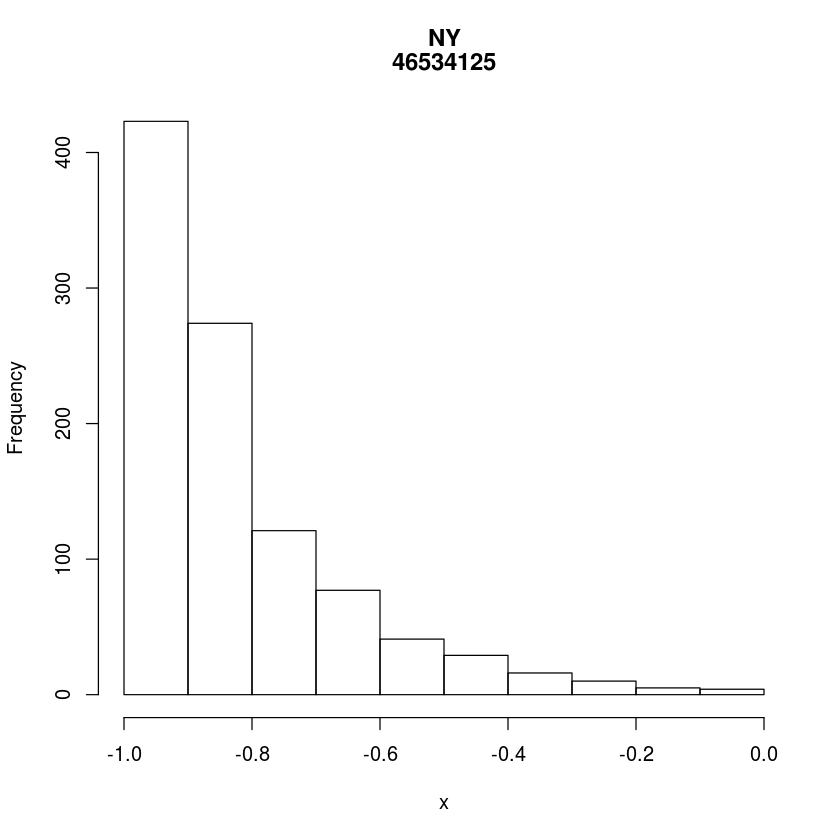

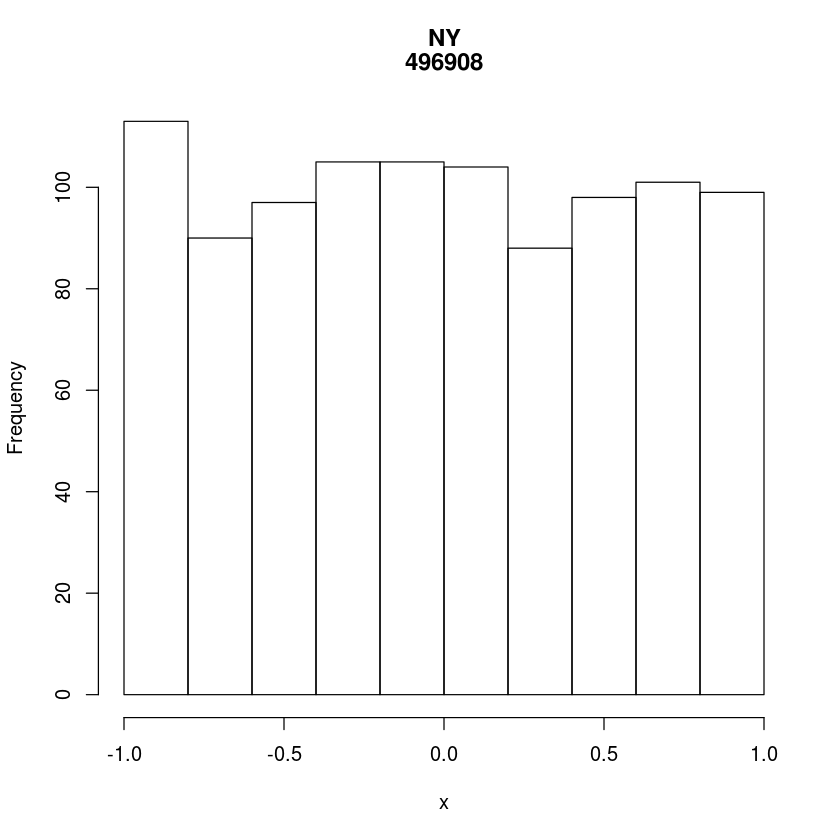

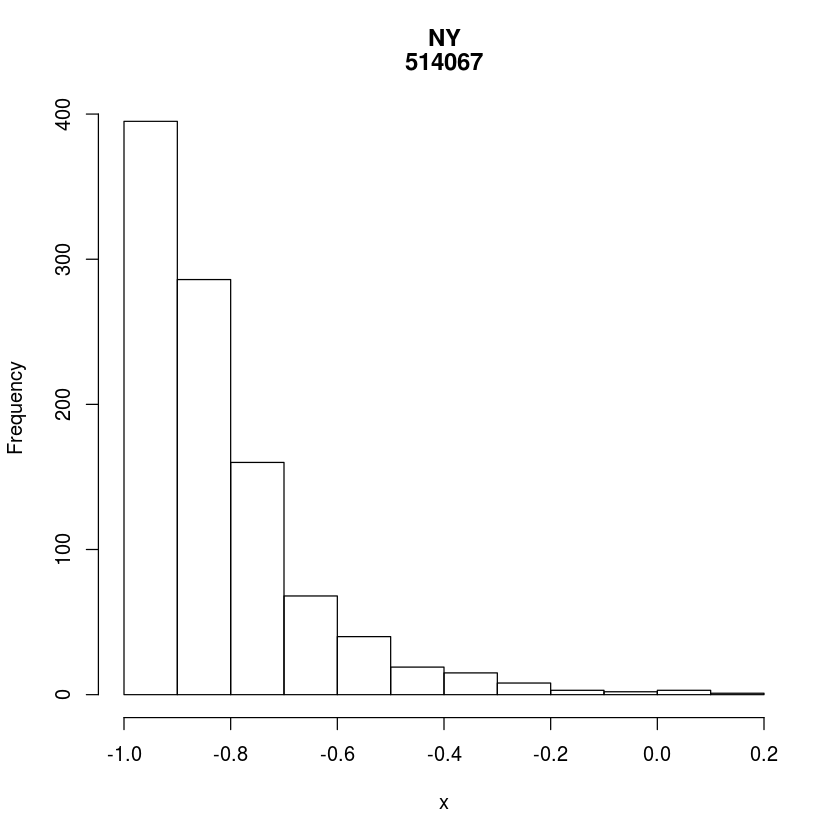

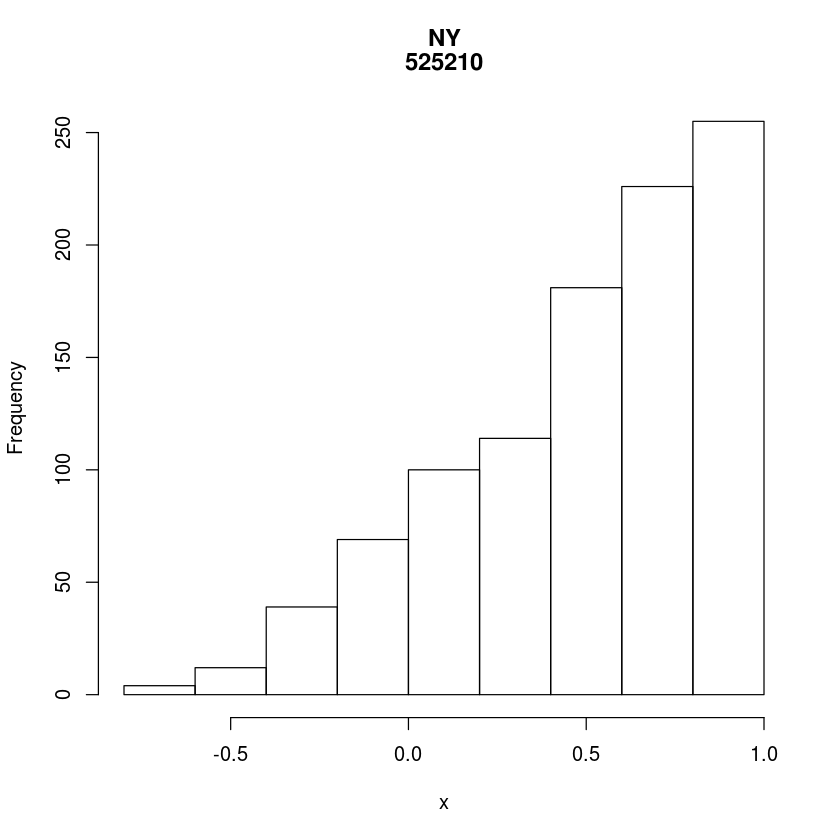

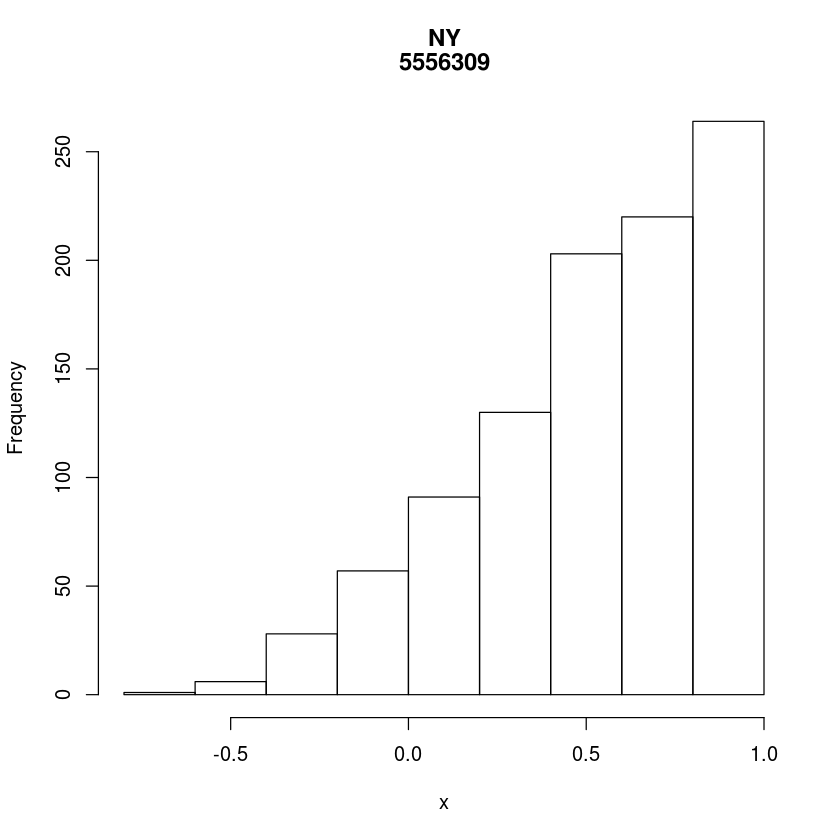

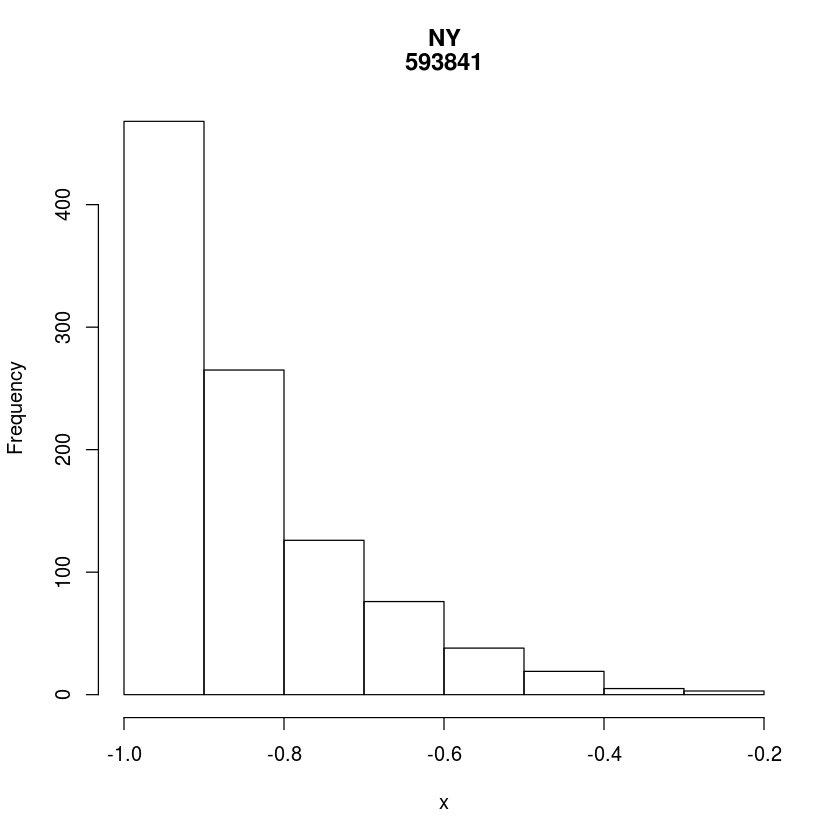

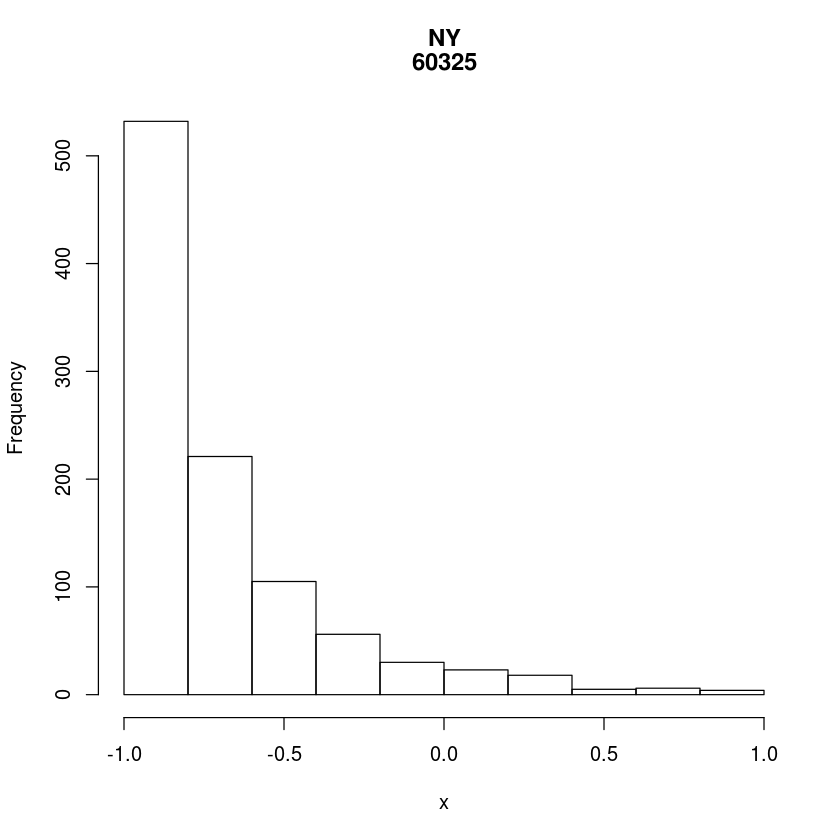

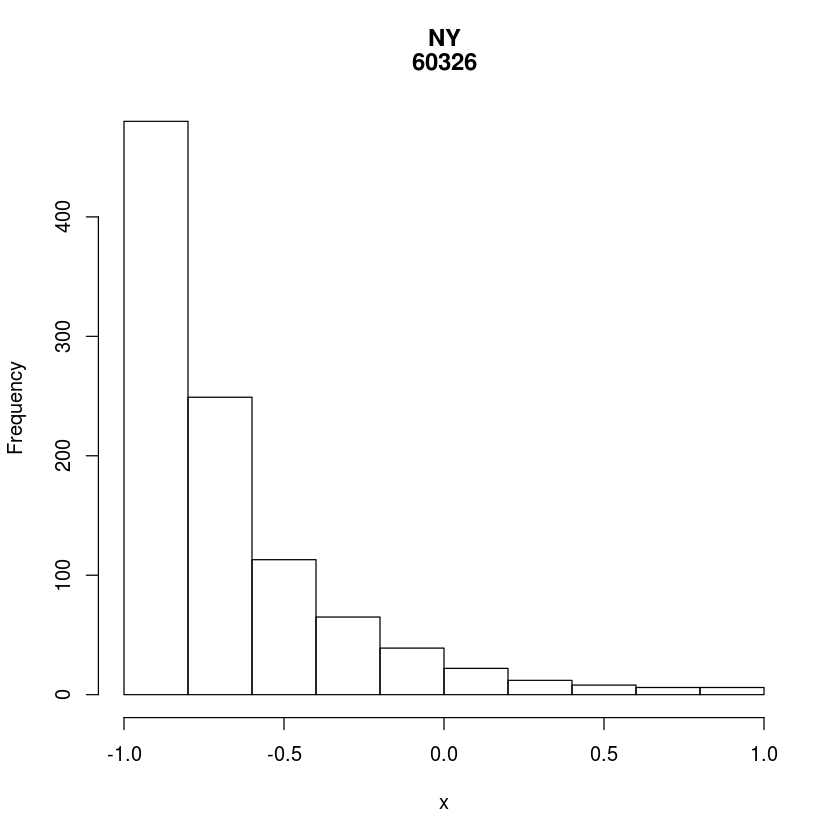

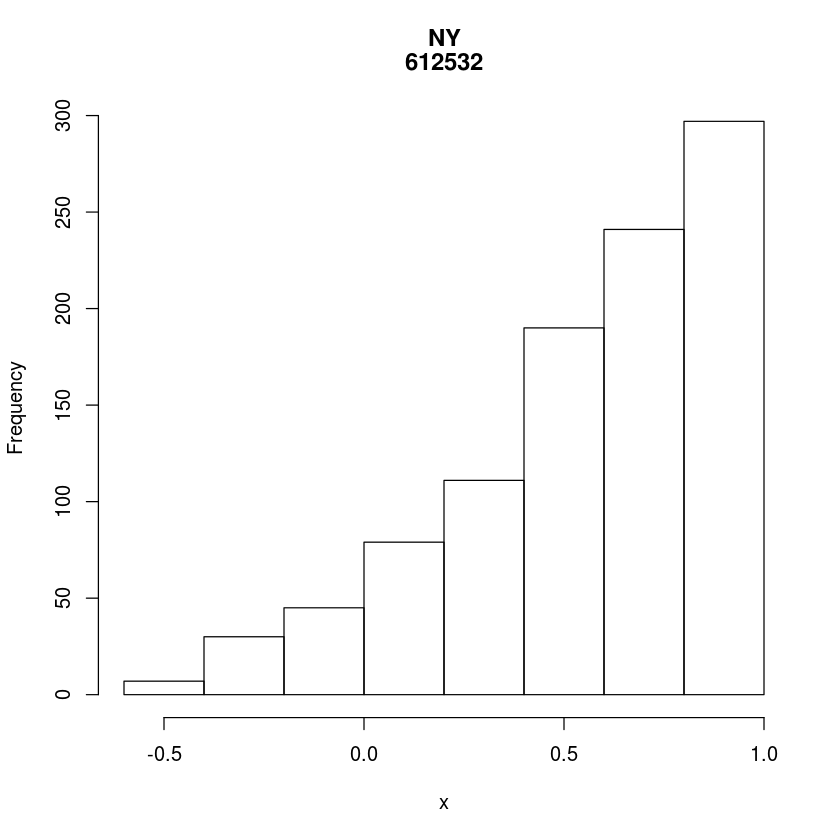

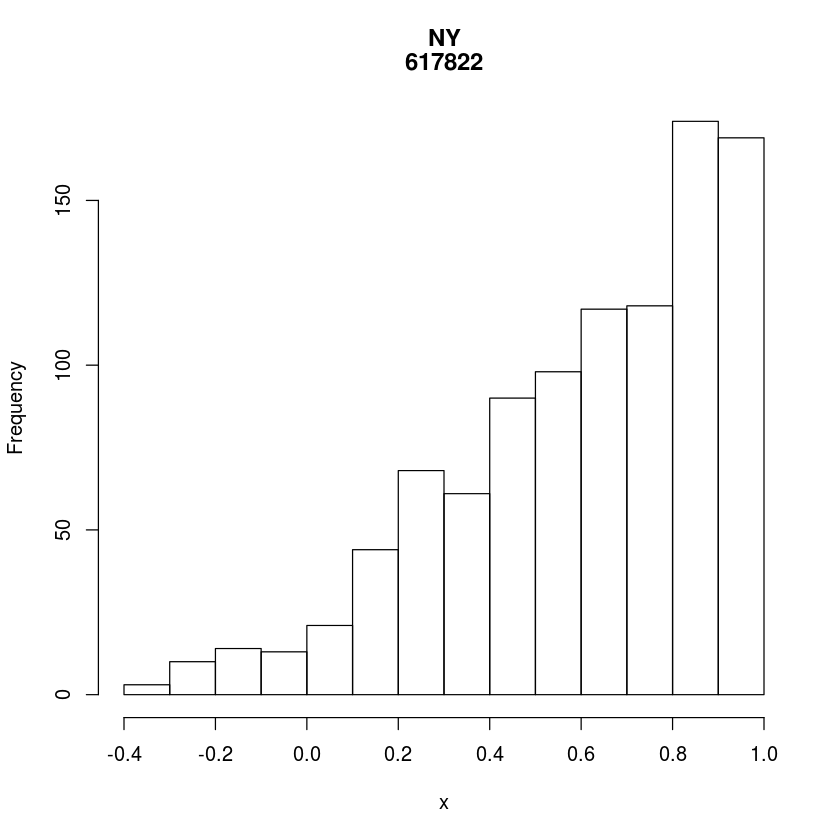

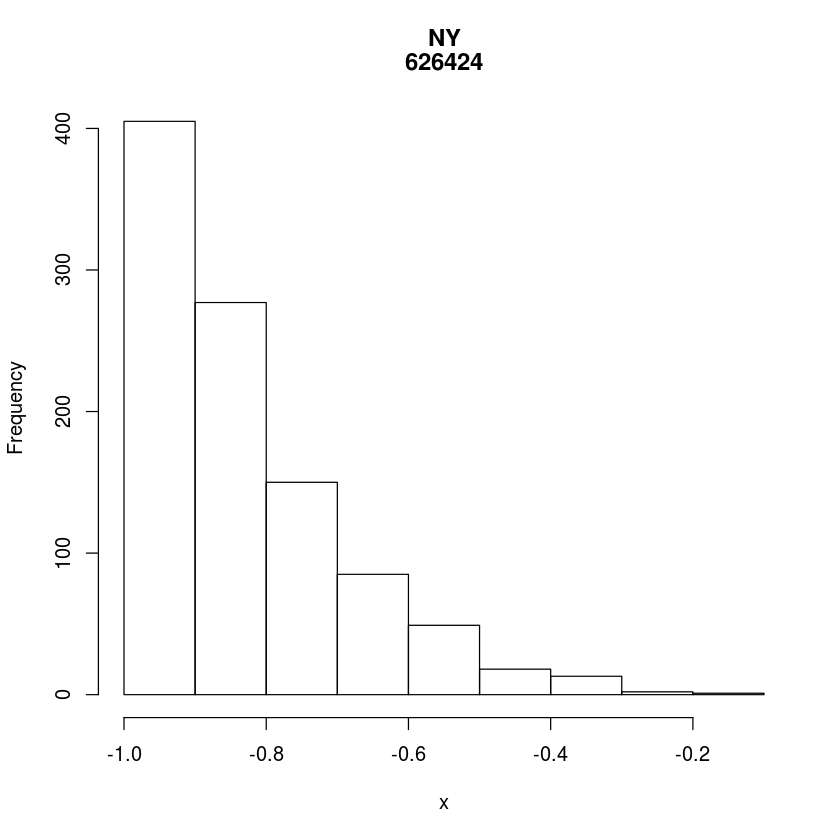

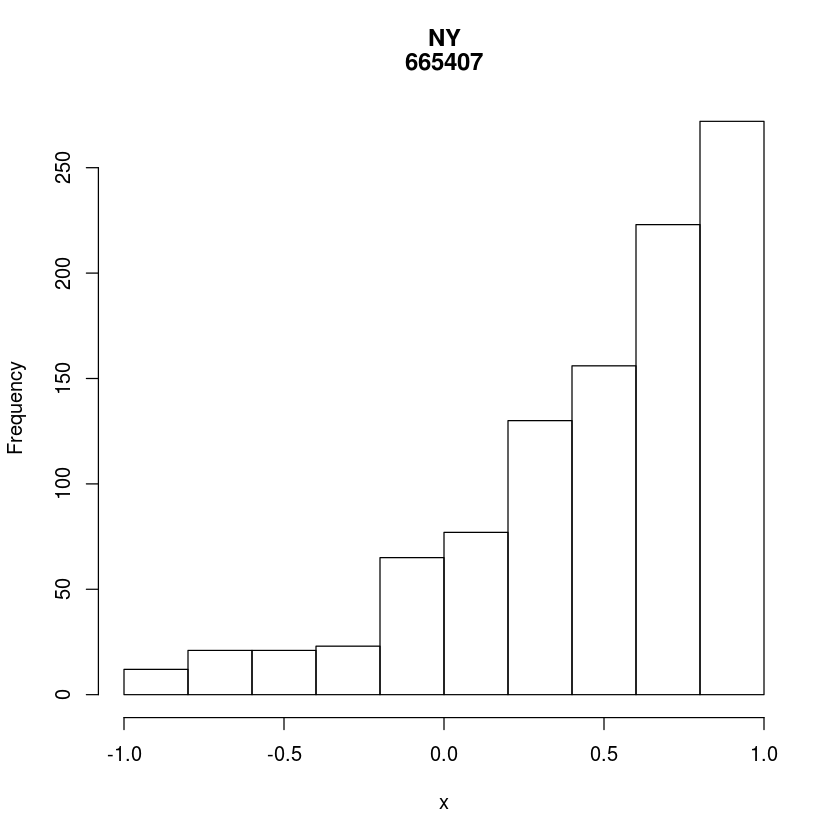

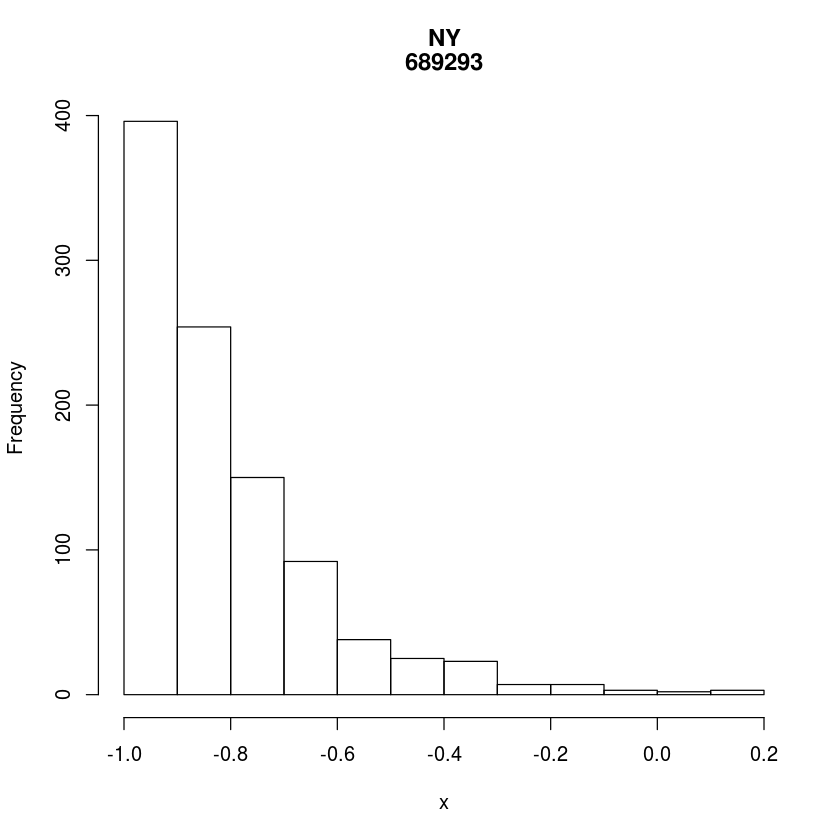

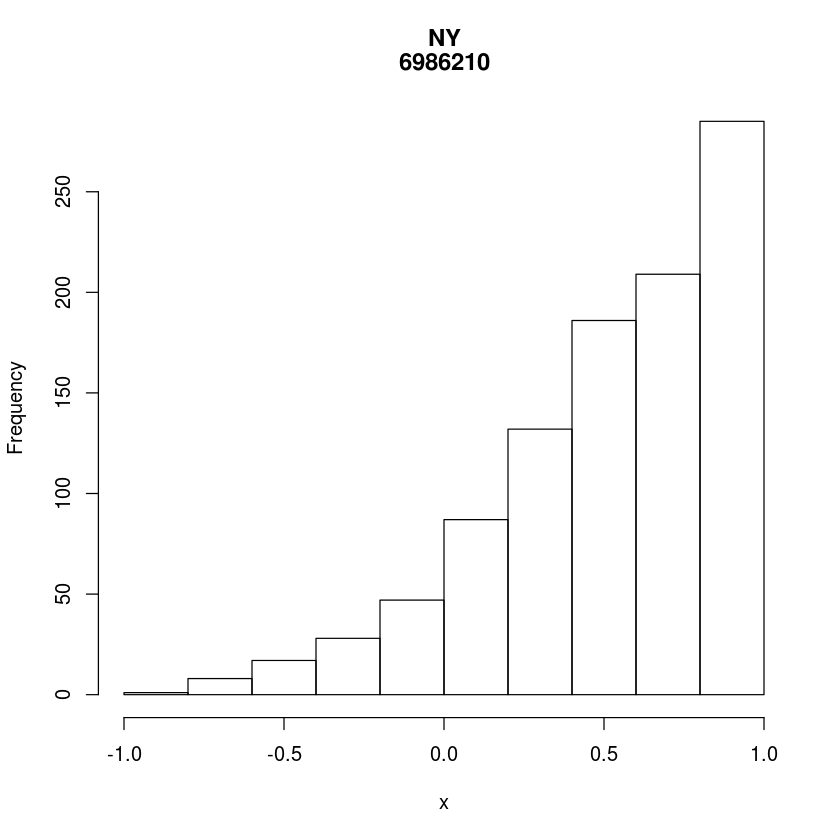

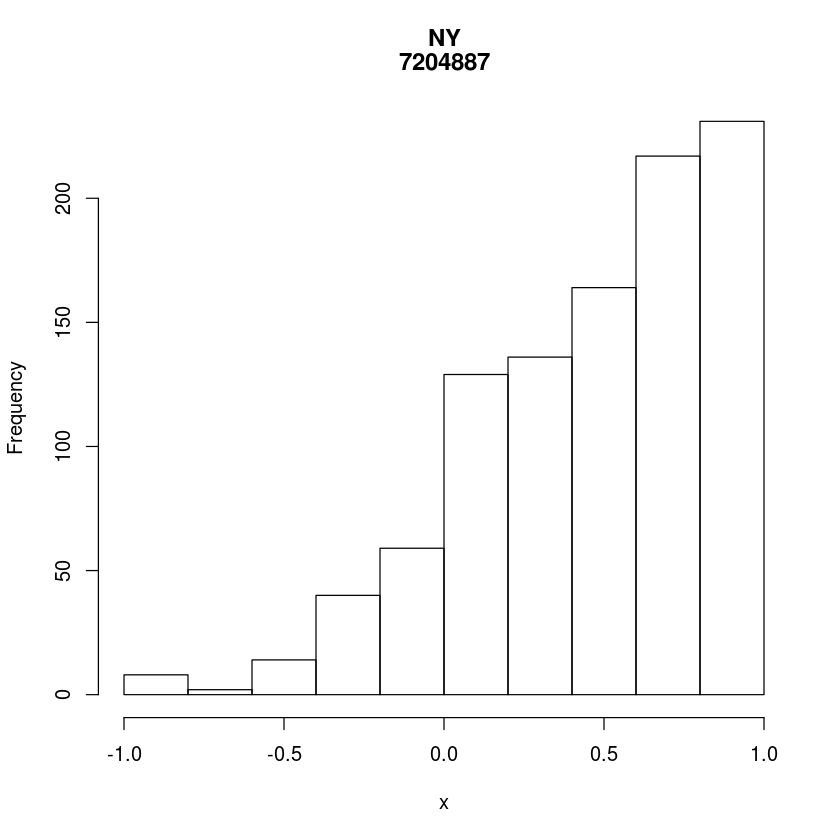

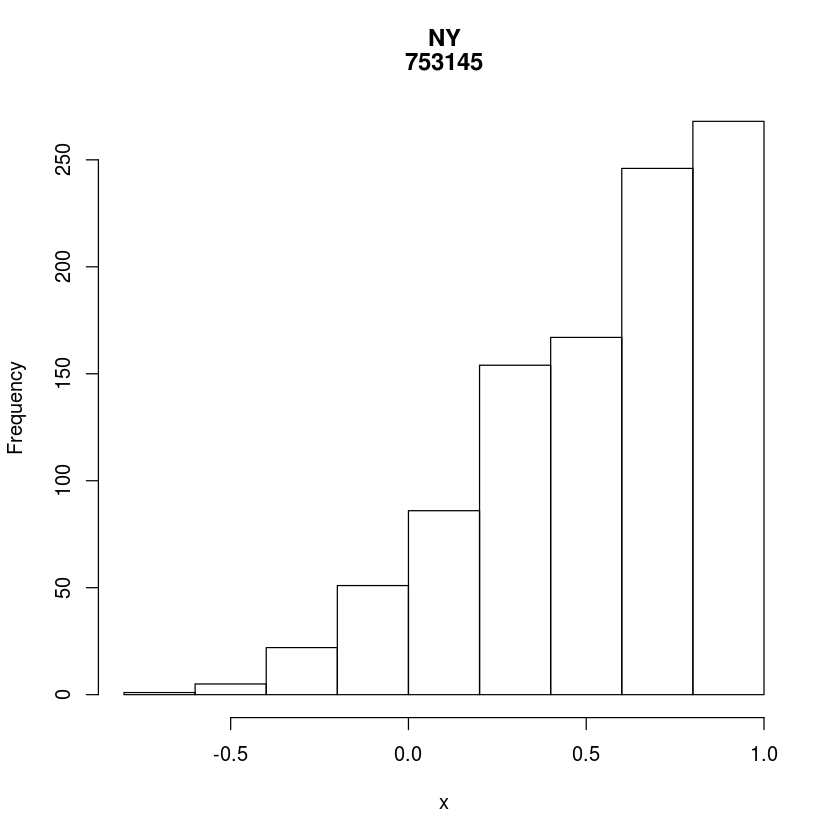

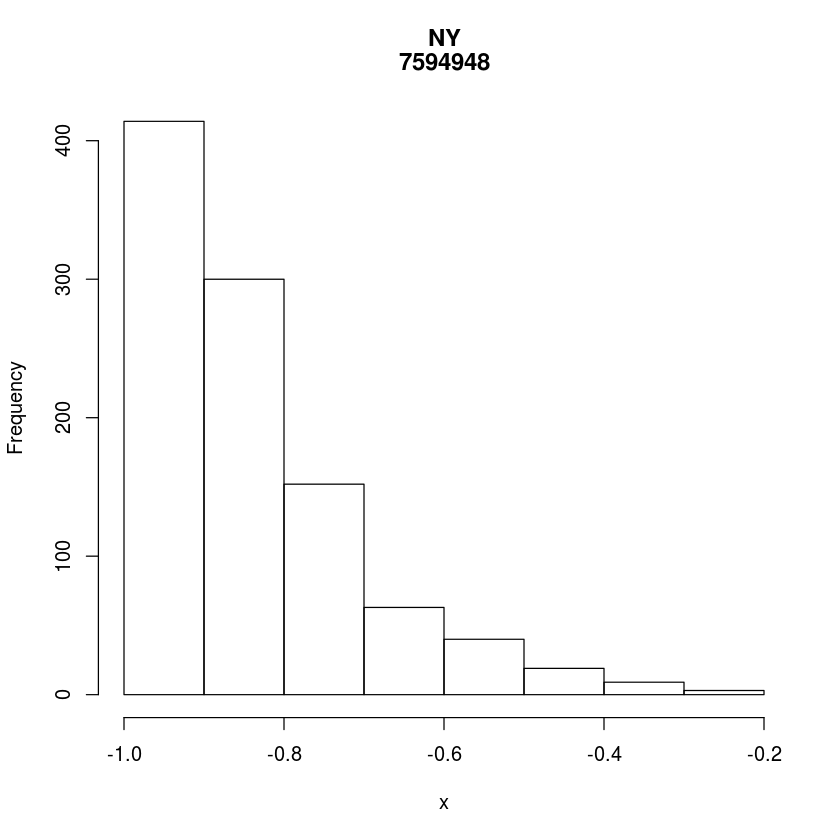

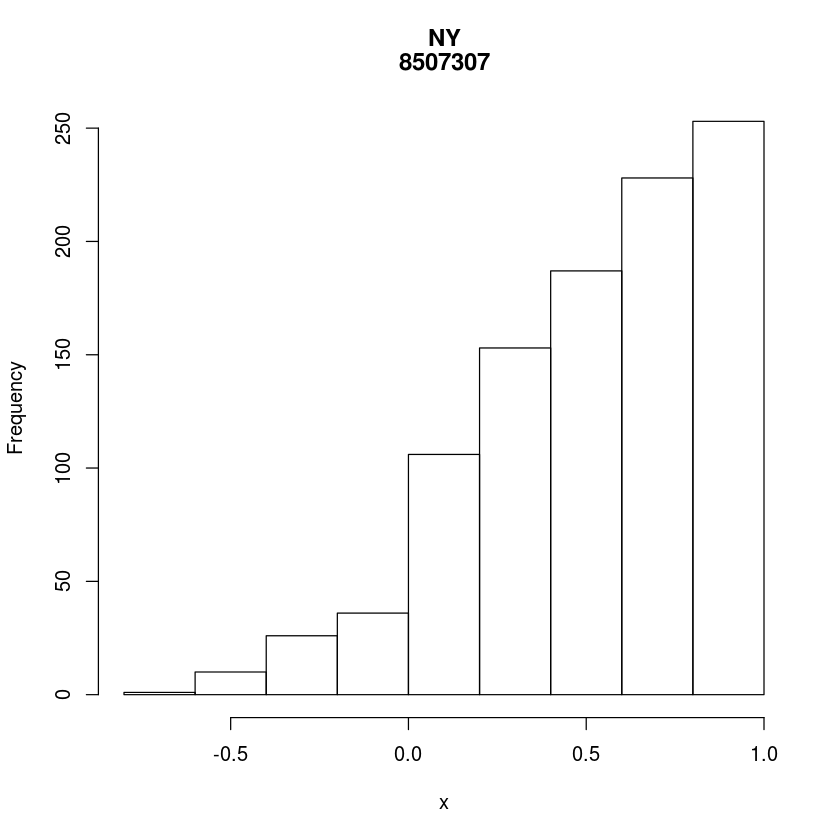

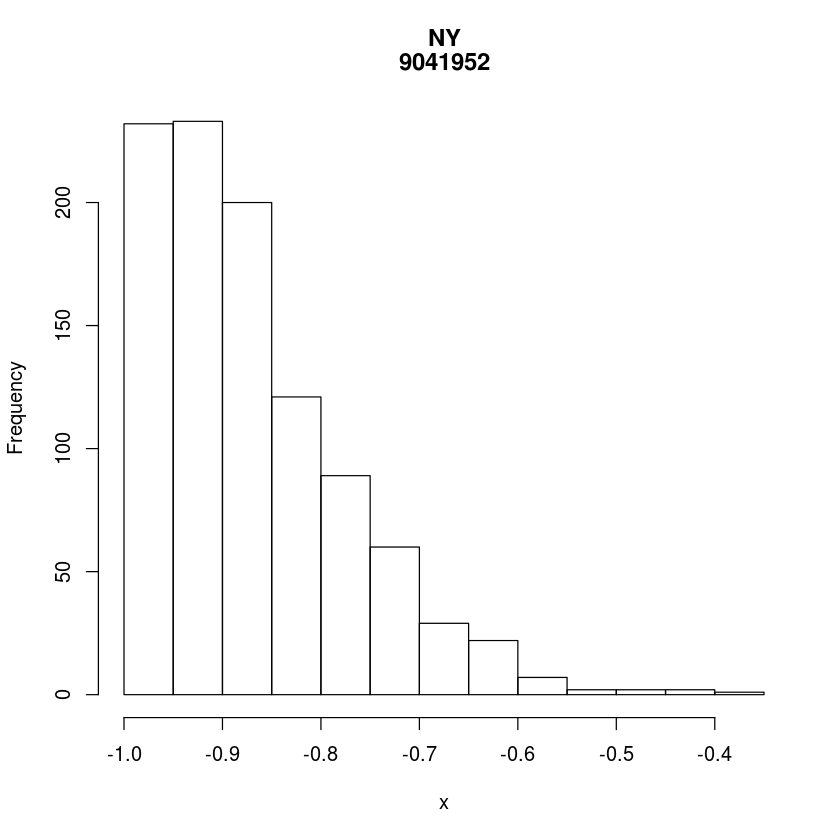

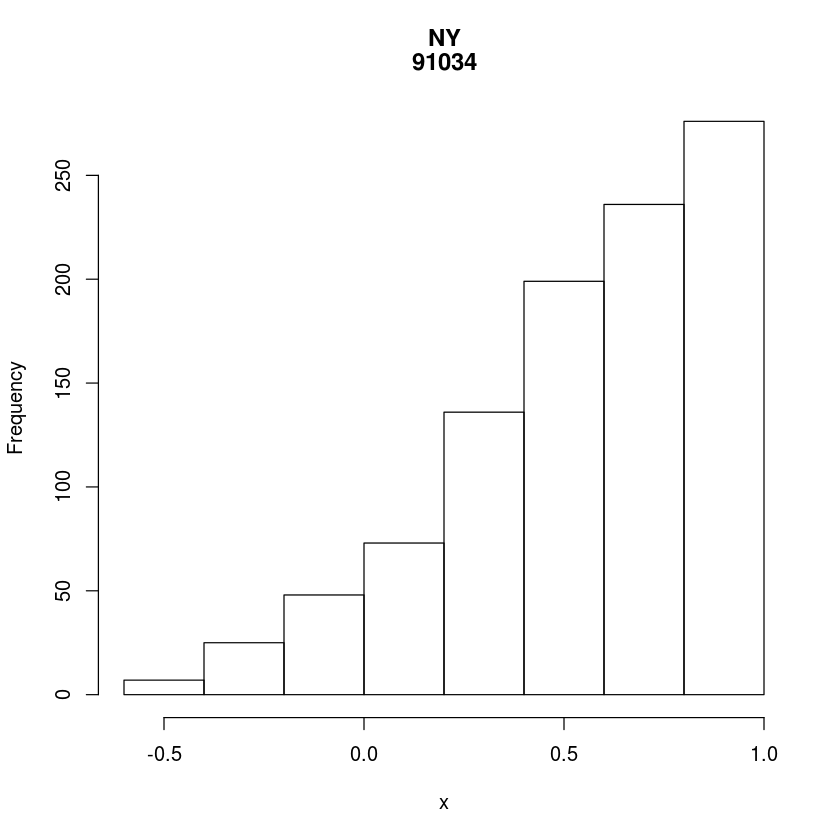

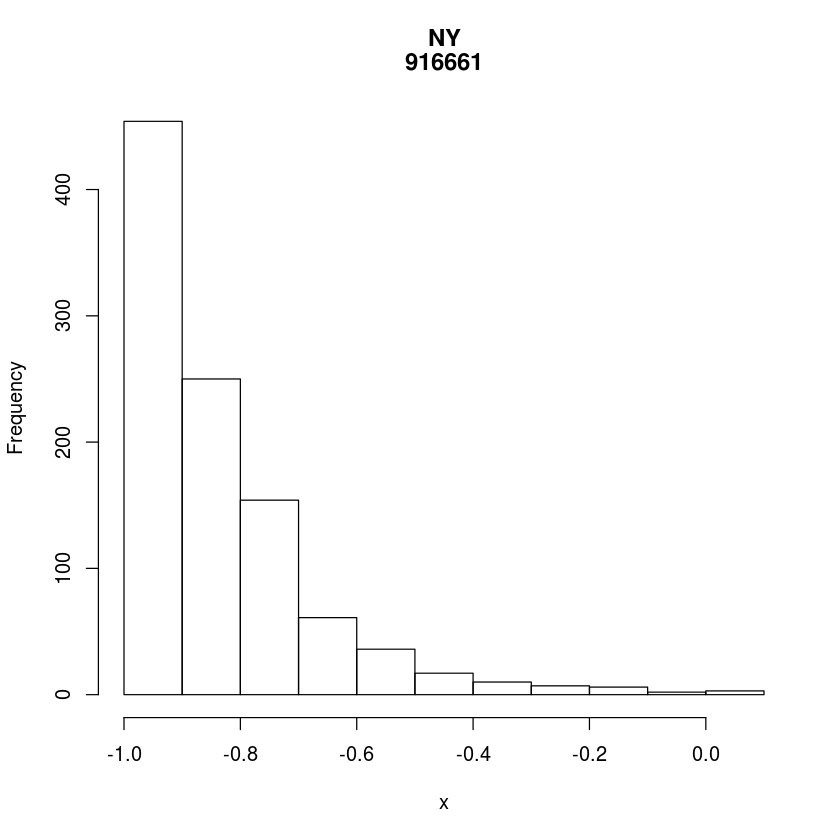

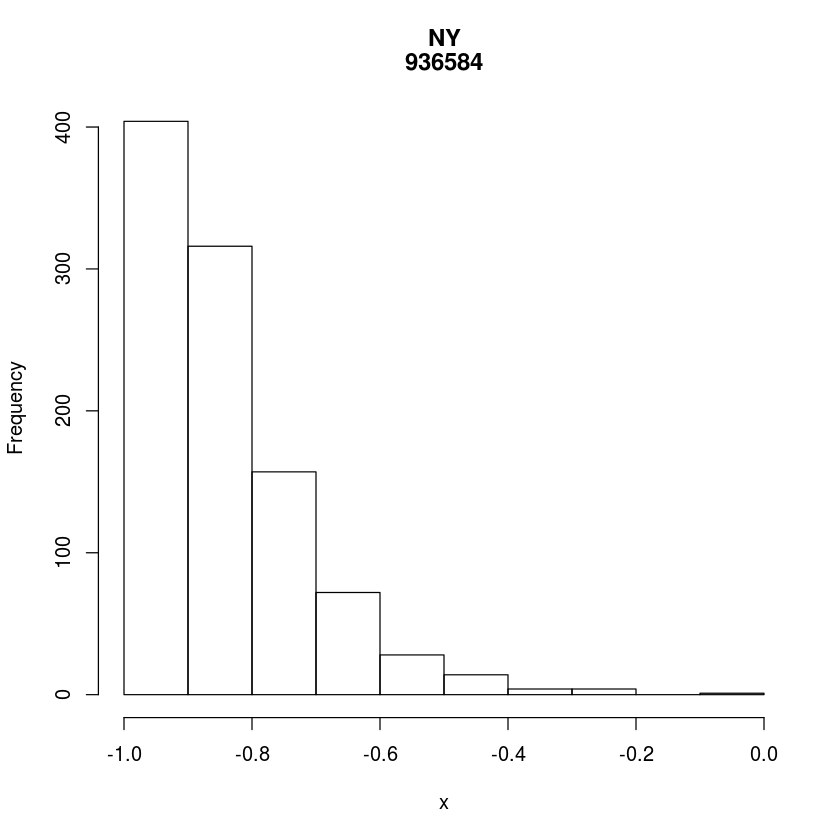

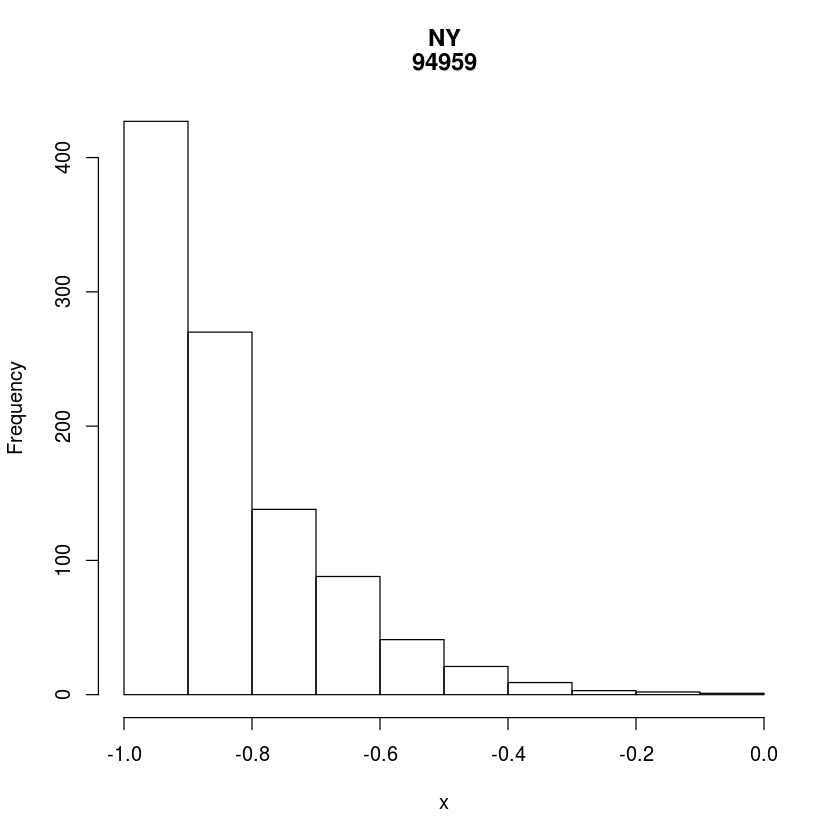

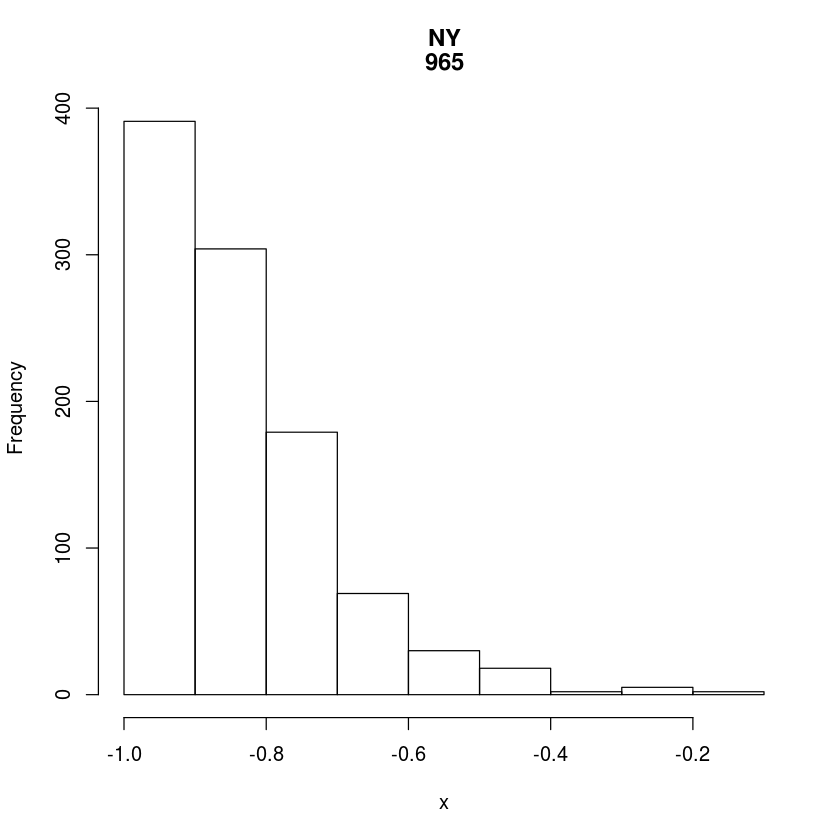

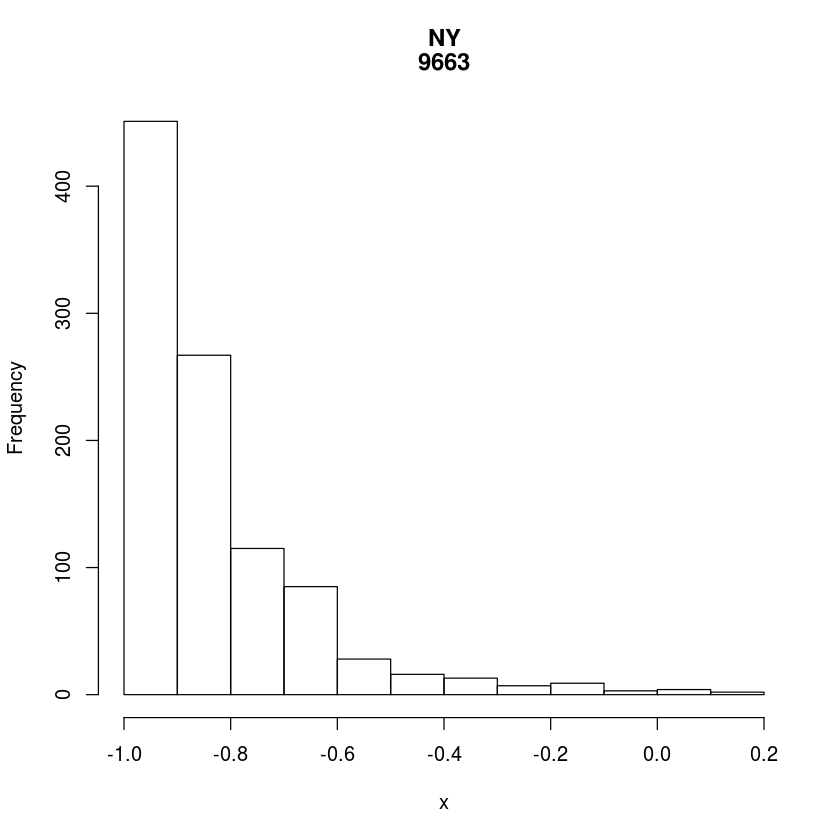

breaks,"-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4","-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0",⋯,"-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2","-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35","-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1"
counts,"1, 4, 22, 39, 74, 132, 161, 256, 311","6, 29, 74, 103, 166, 169, 197, 256","428, 292, 151, 70, 31, 16, 9, 1, 0, 1, 1","421, 239, 134, 69, 51, 30, 19, 12, 10, 9, 3, 1, 0, 1, 1","338, 255, 180, 95, 57, 39, 17, 14, 2, 1, 1, 0, 0, 1","2, 7, 13, 21, 21, 51, 70, 73, 95, 133, 159, 161, 194","377, 276, 161, 76, 45, 26, 16, 11, 3, 6, 1, 0, 0, 0, 1, 1","382, 298, 141, 80, 49, 20, 10, 2, 4, 6, 3, 2, 1, 0, 1, 1","350, 215, 154, 99, 62, 39, 36, 16, 16, 7, 2, 3, 1","488, 187, 89, 65, 54, 48, 26, 20, 14, 9",⋯,"414, 300, 152, 63, 40, 19, 9, 3","1, 10, 26, 36, 106, 153, 187, 228, 253","232, 233, 200, 121, 89, 60, 29, 22, 7, 2, 2, 2, 1","7, 25, 48, 73, 136, 199, 236, 276","454, 250, 154, 61, 36, 17, 10, 7, 6, 2, 3","404, 316, 157, 72, 28, 14, 4, 4, 0, 1","427, 270, 138, 88, 41, 21, 9, 3, 2, 1","391, 304, 179, 69, 30, 18, 2, 5, 2","451, 267, 115, 85, 28, 16, 13, 7, 9, 3, 4, 2","337, 303, 181, 96, 38, 15, 19, 10, 1"
density,"0.005, 0.020, 0.110, 0.195, 0.370, 0.660, 0.805, 1.280, 1.555","0.030, 0.145, 0.370, 0.515, 0.830, 0.845, 0.985, 1.280","4.28, 2.92, 1.51, 0.70, 0.31, 0.16, 0.09, 0.01, 0.00, 0.01, 0.01","4.21, 2.39, 1.34, 0.69, 0.51, 0.30, 0.19, 0.12, 0.10, 0.09, 0.03, 0.01, 0.00, 0.01, 0.01","3.38, 2.55, 1.80, 0.95, 0.57, 0.39, 0.17, 0.14, 0.02, 0.01, 0.01, 0.00, 0.00, 0.01","0.02, 0.07, 0.13, 0.21, 0.21, 0.51, 0.70, 0.73, 0.95, 1.33, 1.59, 1.61, 1.94","3.77, 2.76, 1.61, 0.76, 0.45, 0.26, 0.16, 0.11, 0.03, 0.06, 0.01, 0.00, 0.00, 0.00, 0.01, 0.01","3.82, 2.98, 1.41, 0.80, 0.49, 0.20, 0.10, 0.02, 0.04, 0.06, 0.03, 0.02, 0.01, 0.00, 0.01, 0.01","3.50, 2.15, 1.54, 0.99, 0.62, 0.39, 0.36, 0.16, 0.16, 0.07, 0.02, 0.03, 0.01","2.440, 0.935, 0.445, 0.325, 0.270, 0.240, 0.130, 0.100, 0.070, 0.045",⋯,"4.14, 3.00, 1.52, 0.63, 0.40, 0.19, 0.09, 0.03","0.005, 0.050, 0.130, 0.180, 0.530, 0.765, 0.935, 1.140, 1.265","4.64, 4.66, 4.00, 2.42, 1.78, 1.20, 0.58, 0.44, 0.14, 0.04, 0.04, 0.04, 0.02","0.035, 0.125, 0.240, 0.365, 0.680, 0.995, 1.180, 1.380","4.54, 2.50, 1.54, 0.61, 0.36, 0.17, 0.10, 0.07, 0.06, 0.02, 0.03","4.04, 3.16, 1.57, 0.72, 0.28, 0.14, 0.04, 0.04, 0.00, 0.01","4.27, 2.70, 1.38, 0.88, 0.41, 0.21, 0.09, 0.03, 0.02, 0.01","3.91, 3.04, 1.79, 0.69, 0.30, 0.18, 0.02, 0.05, 0.02","4.51, 2.67, 1.15, 0.85, 0.28, 0.16, 0.13, 0.07, 0.09, 0.03, 0.04, 0.02","3.37, 3.03, 1.81, 0.96, 0.38, 0.15, 0.19, 0.10, 0.01"
mids,"-0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9","-0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9","-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05","-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.

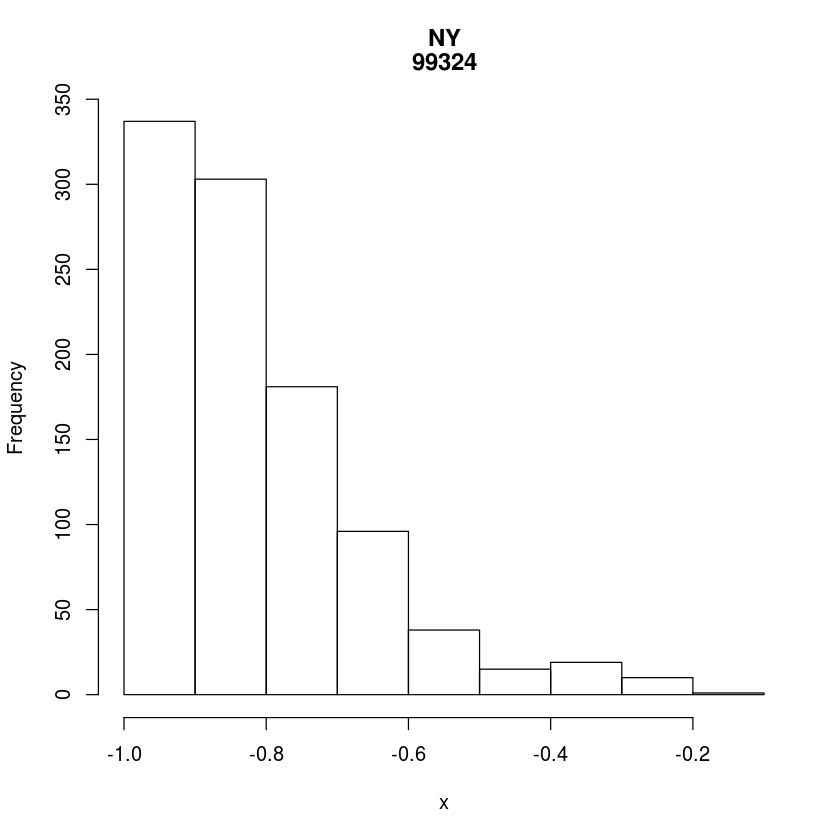

In [25]:
mapply(function(x, y) {
hist(x, main=c("NY", y[1,4]))}, sNY, NY_f2scount)


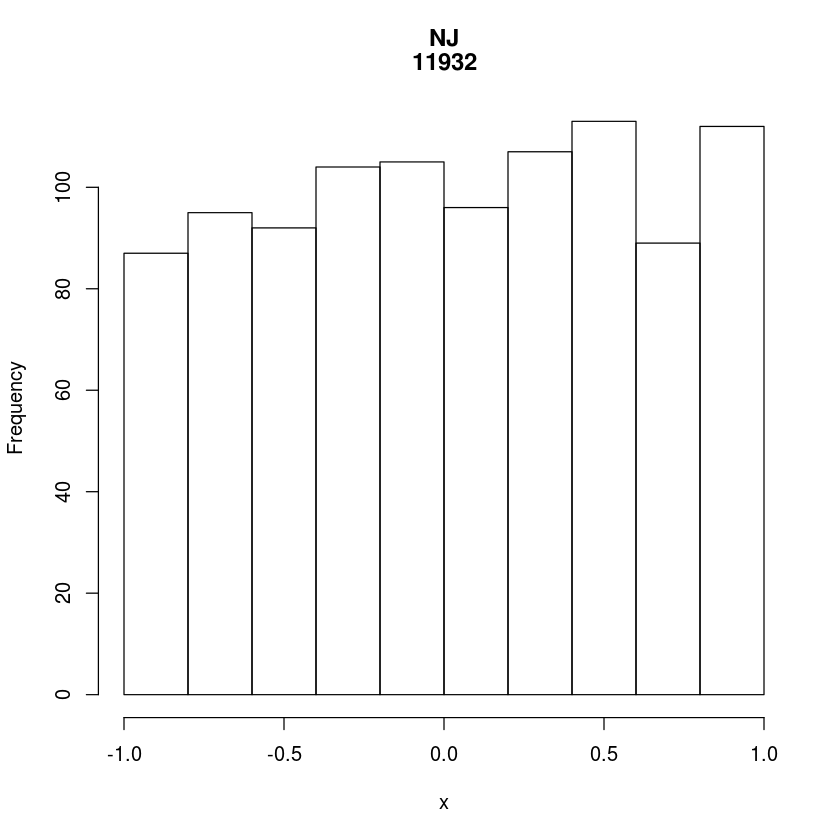

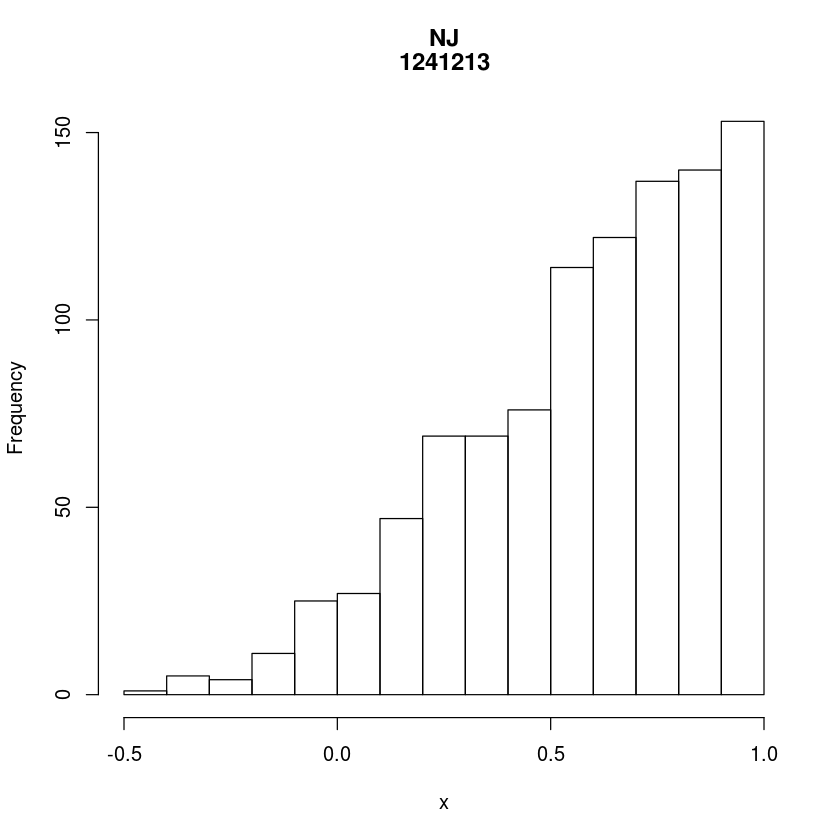

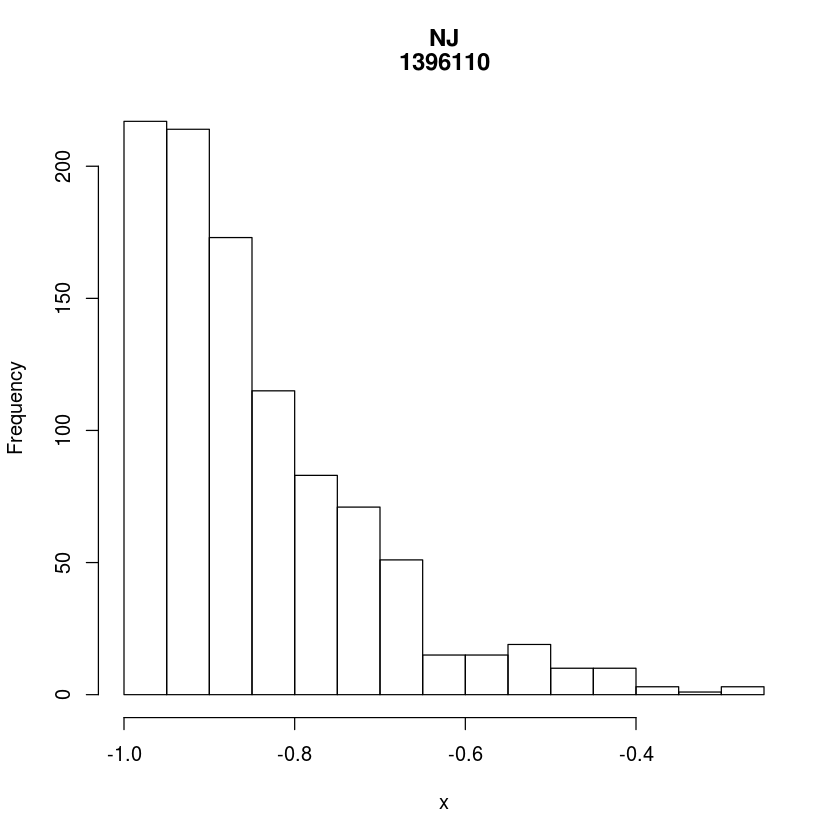

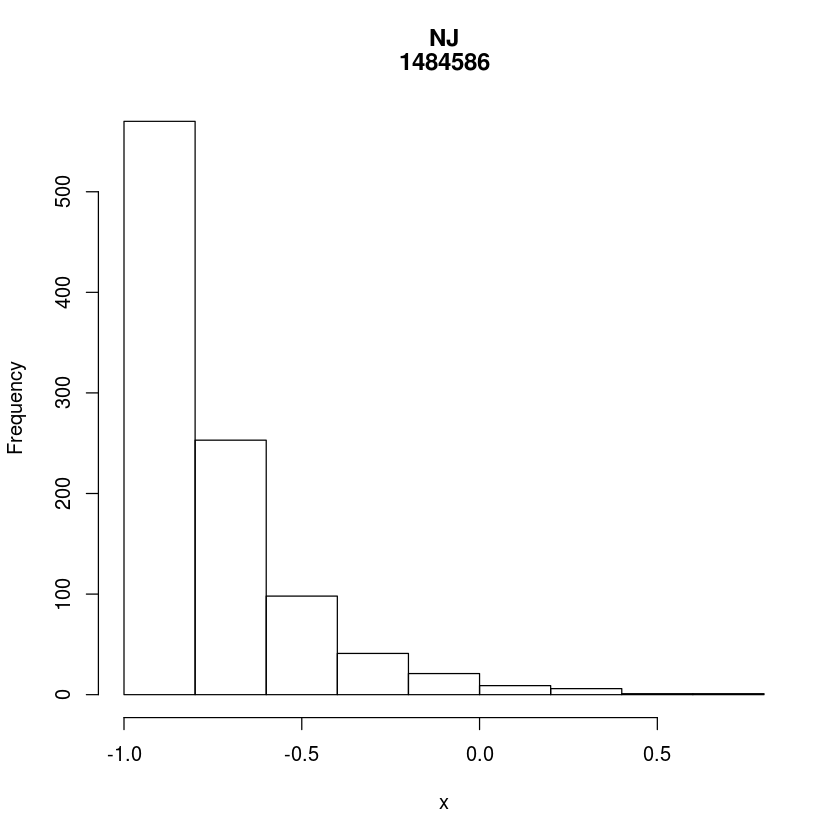

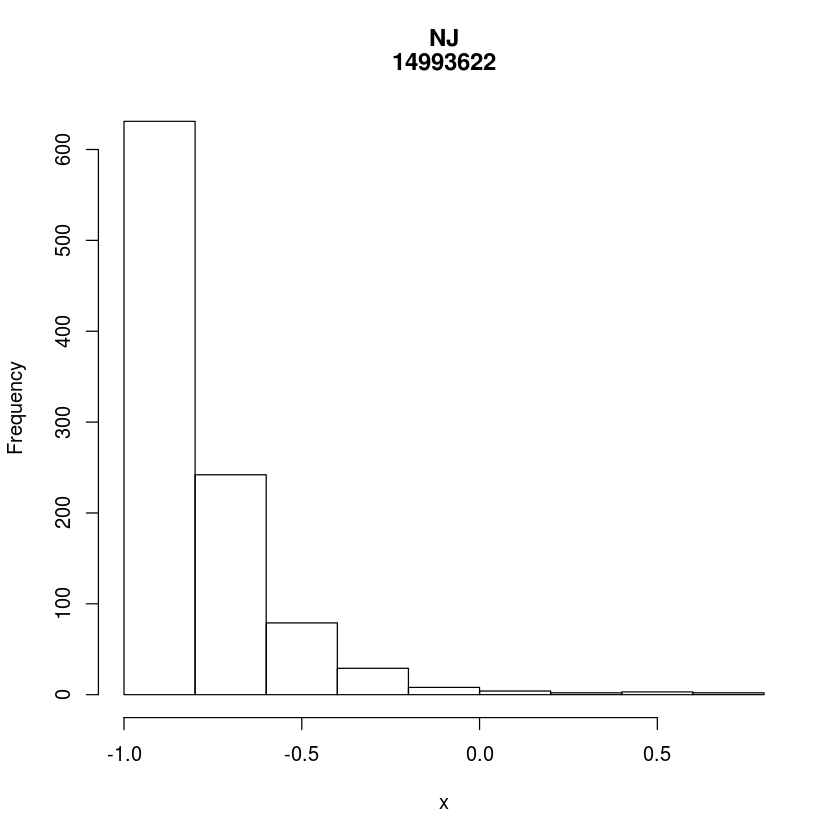

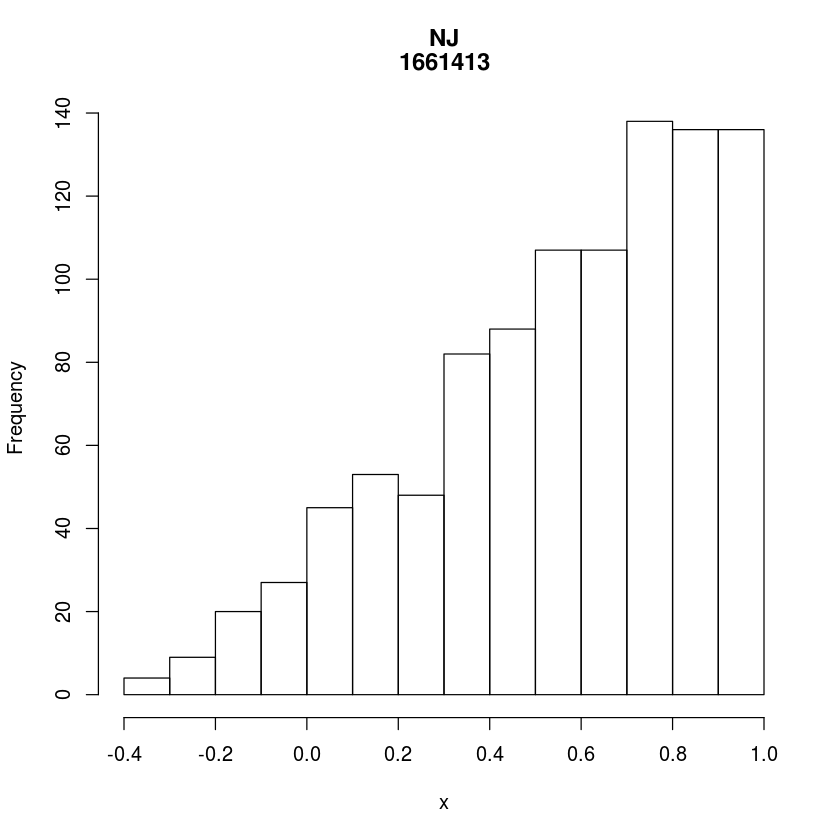

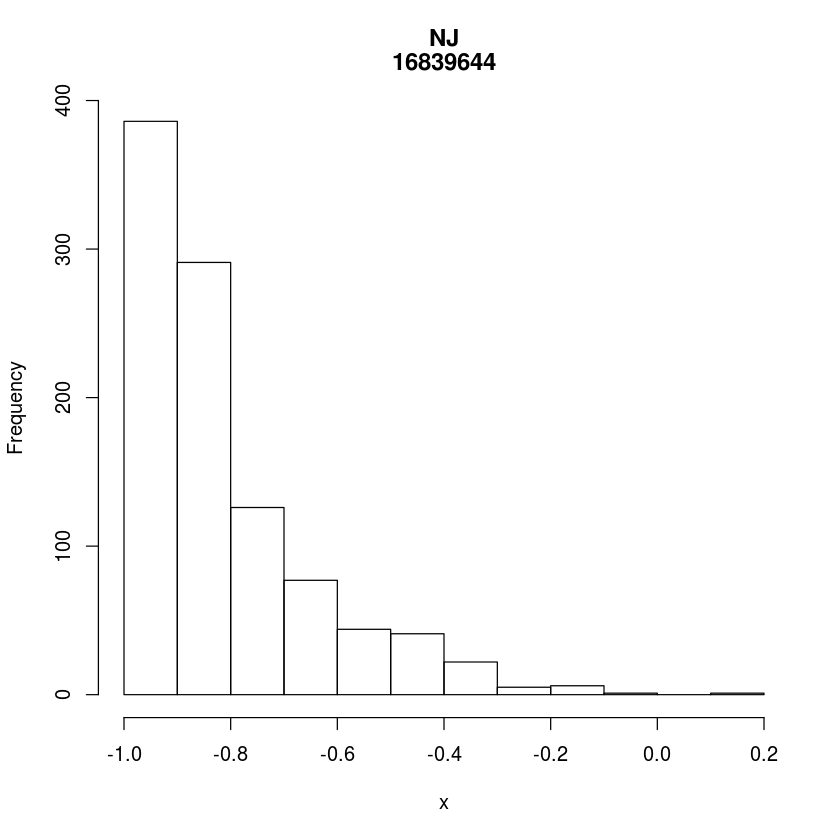

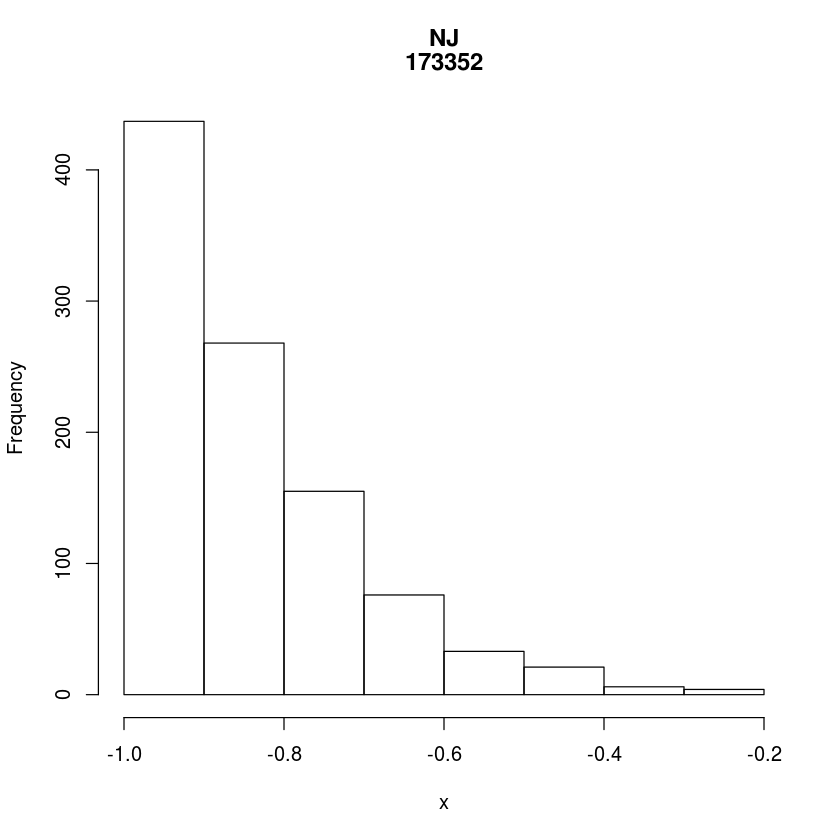

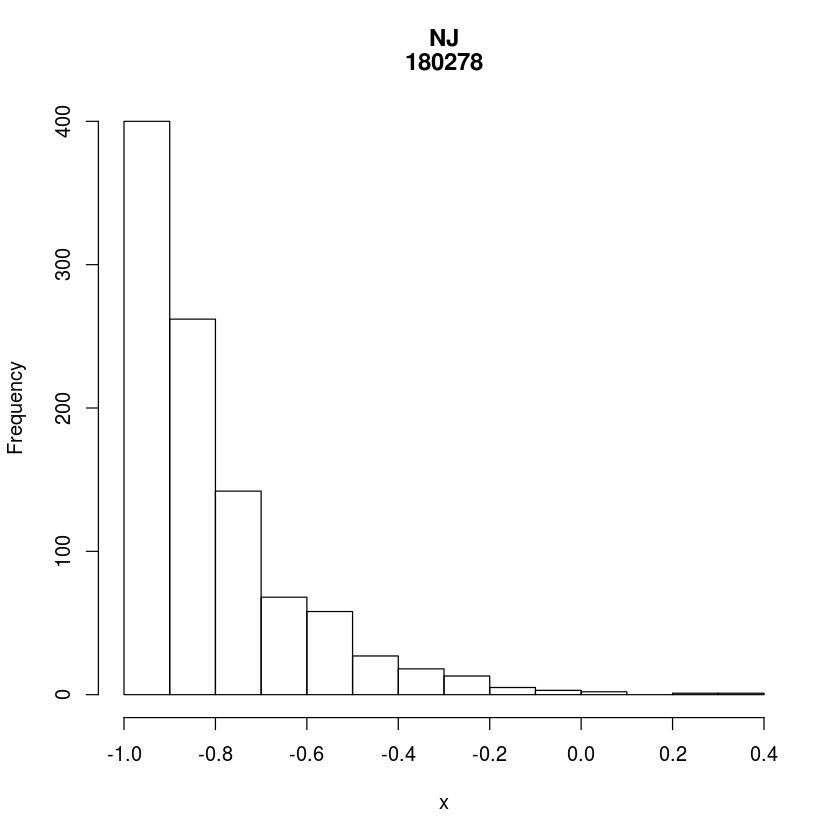

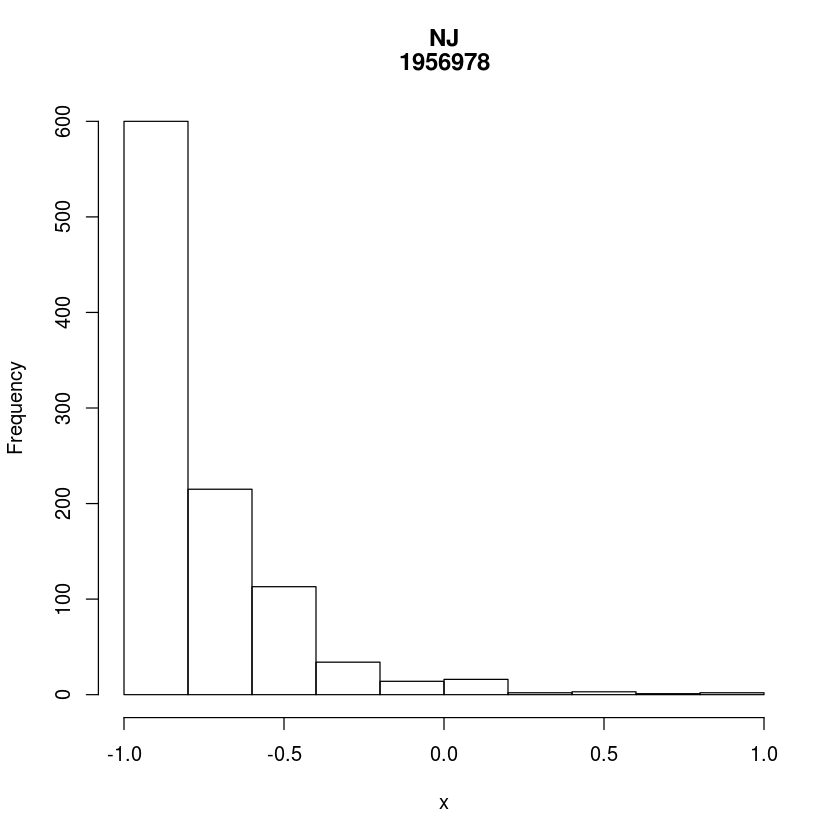

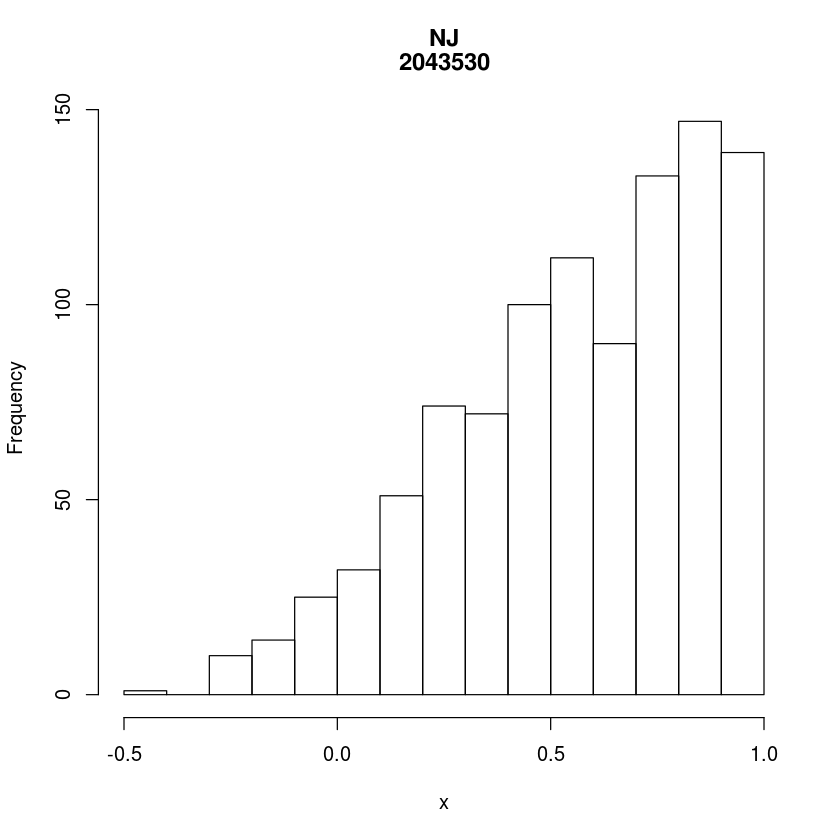

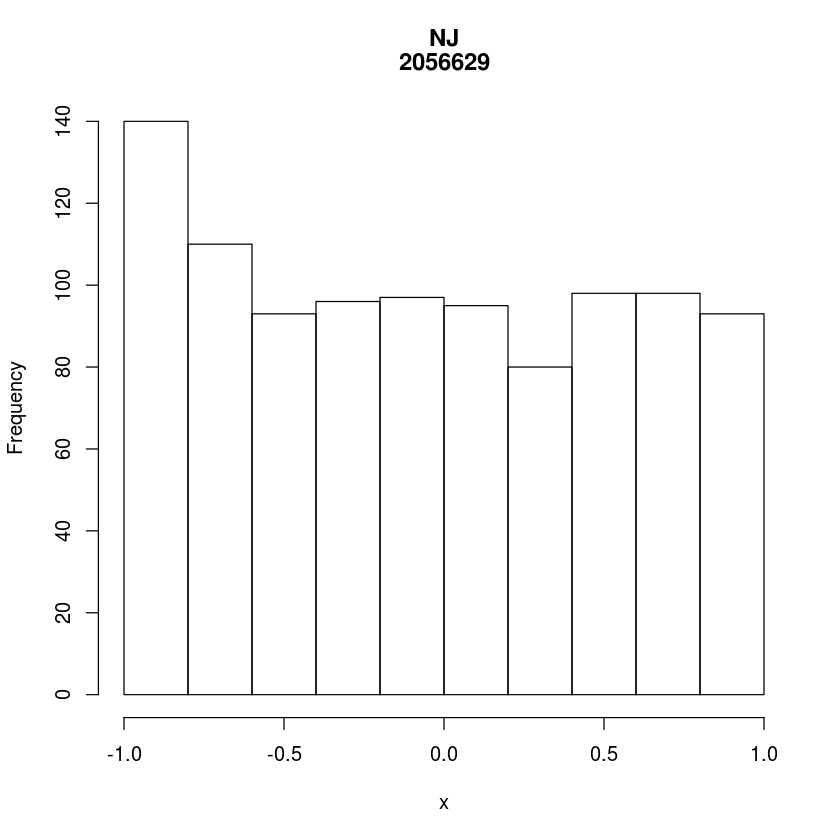

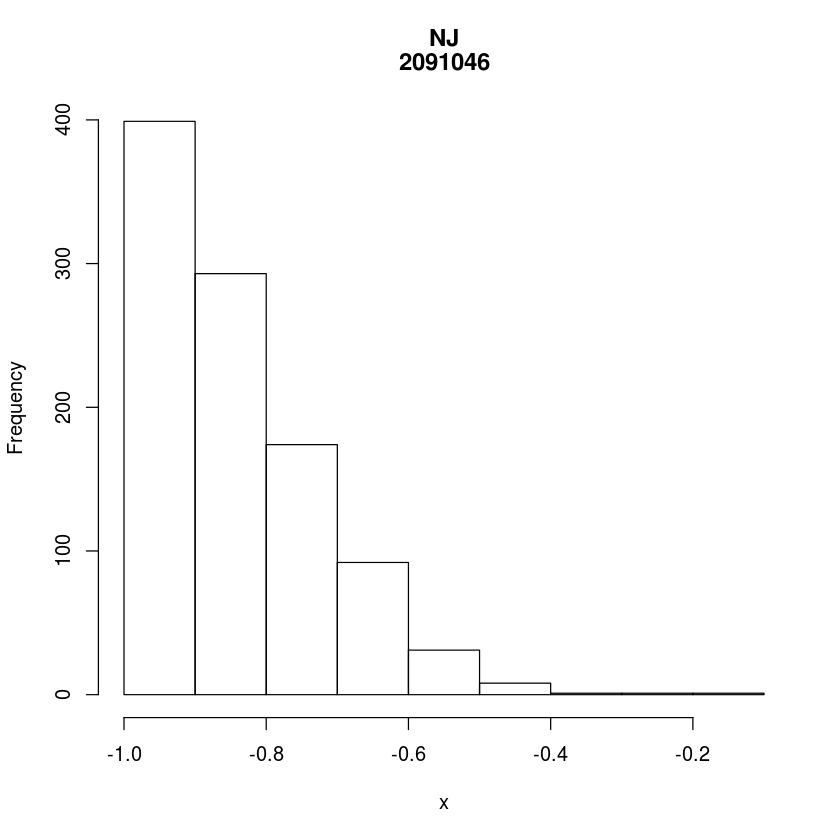

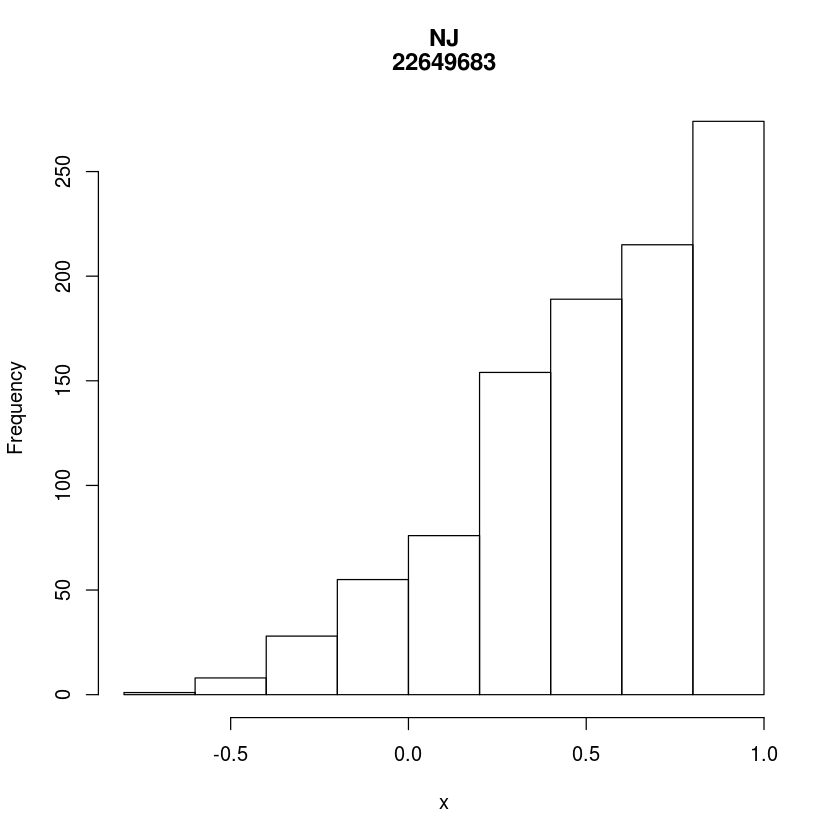

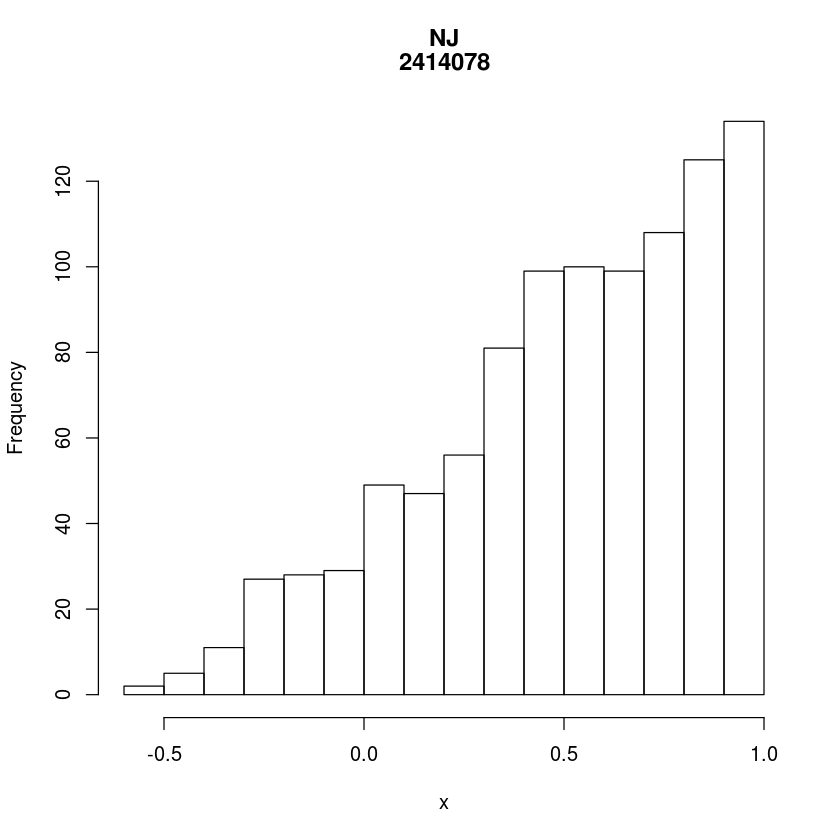

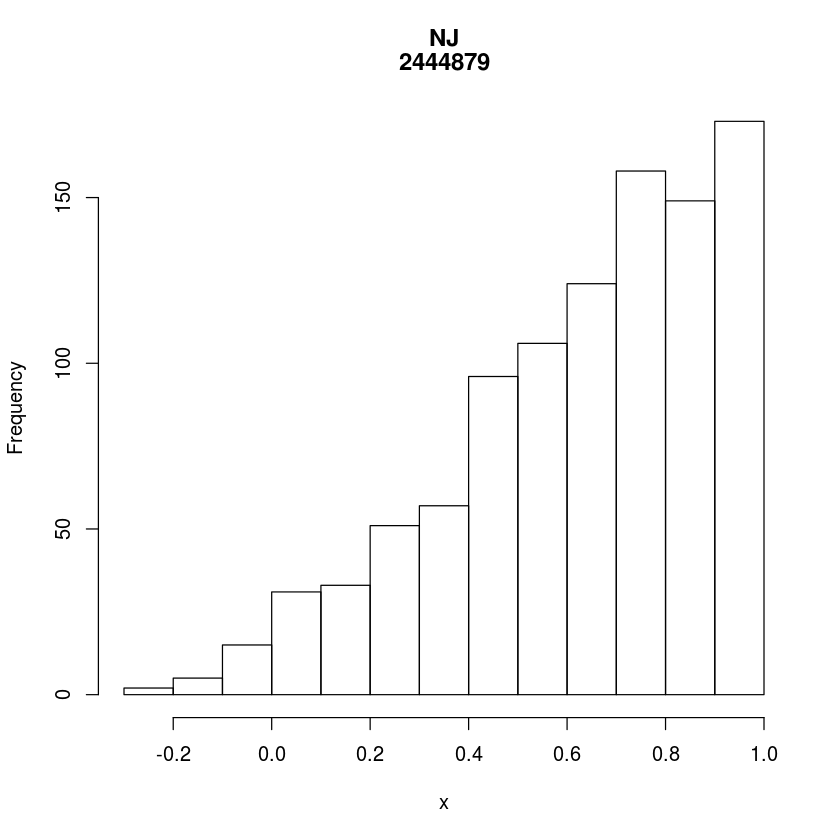

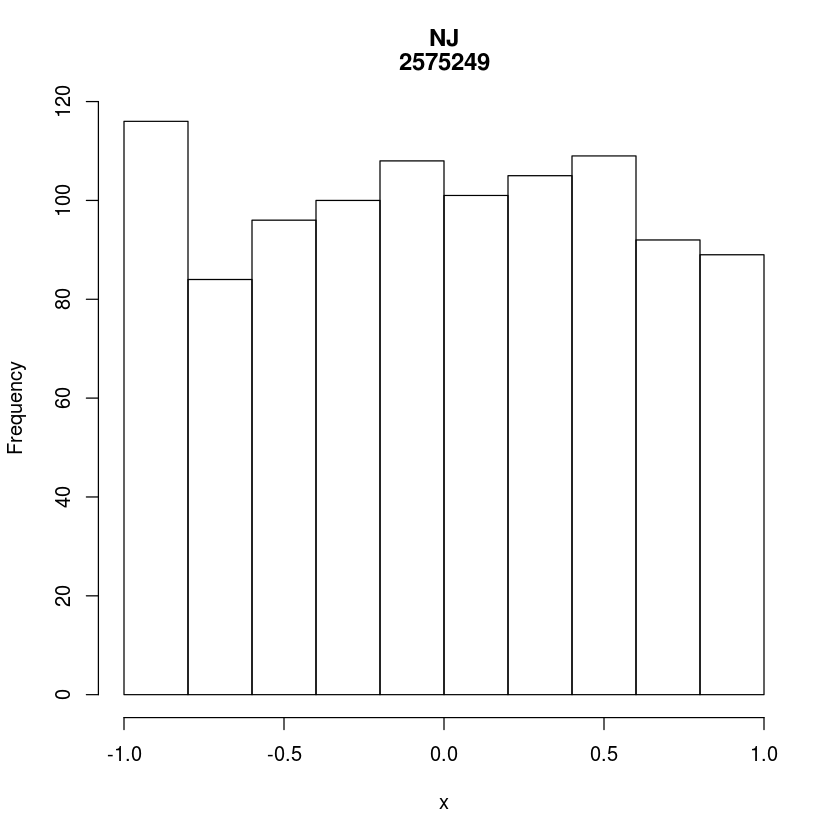

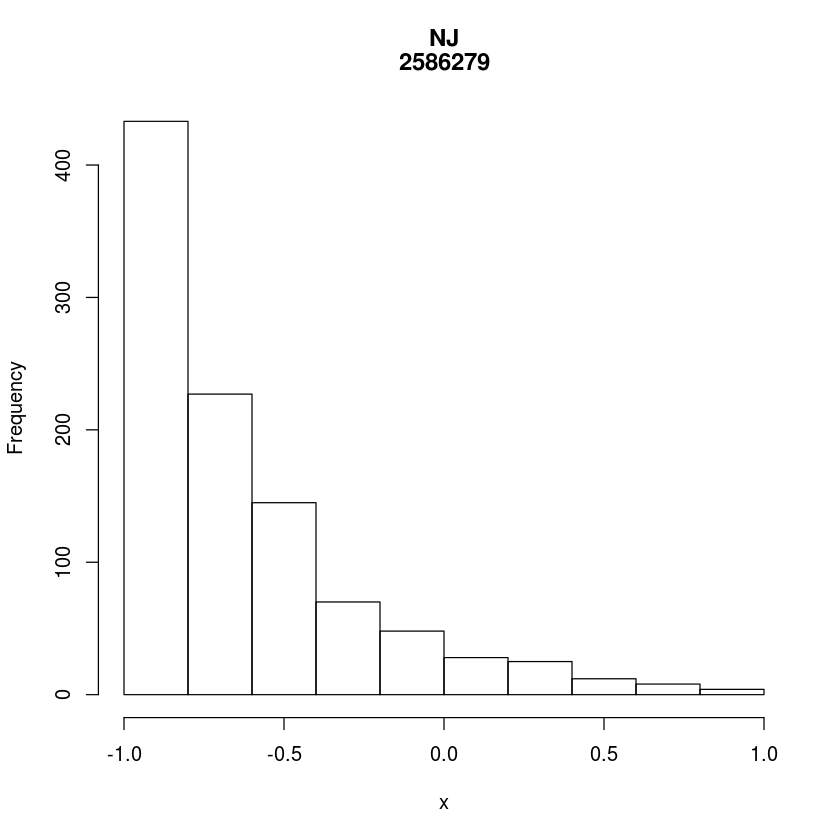

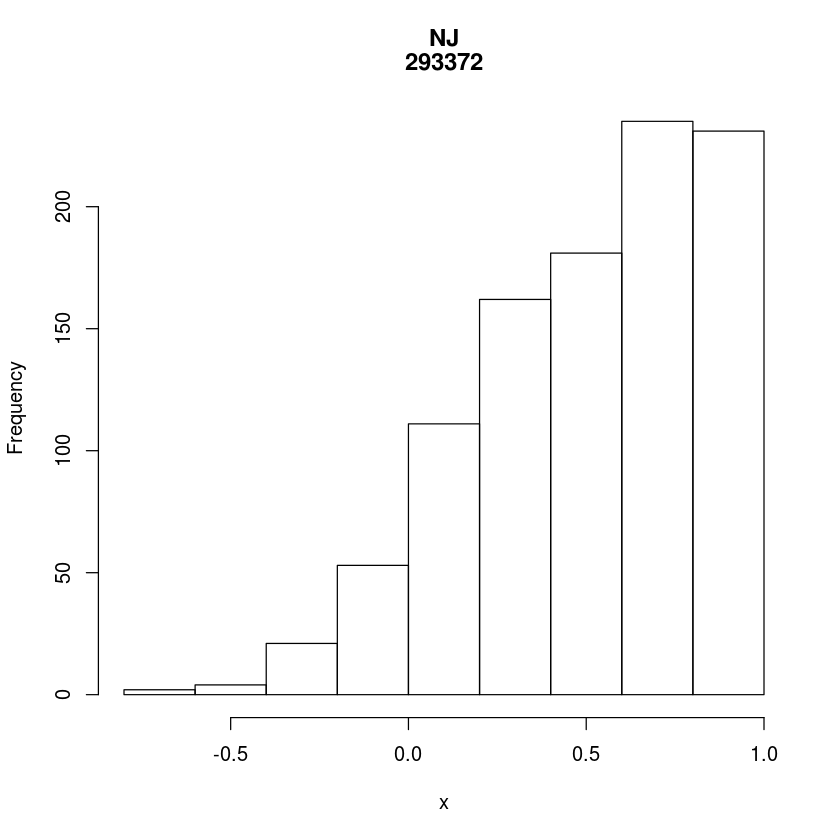

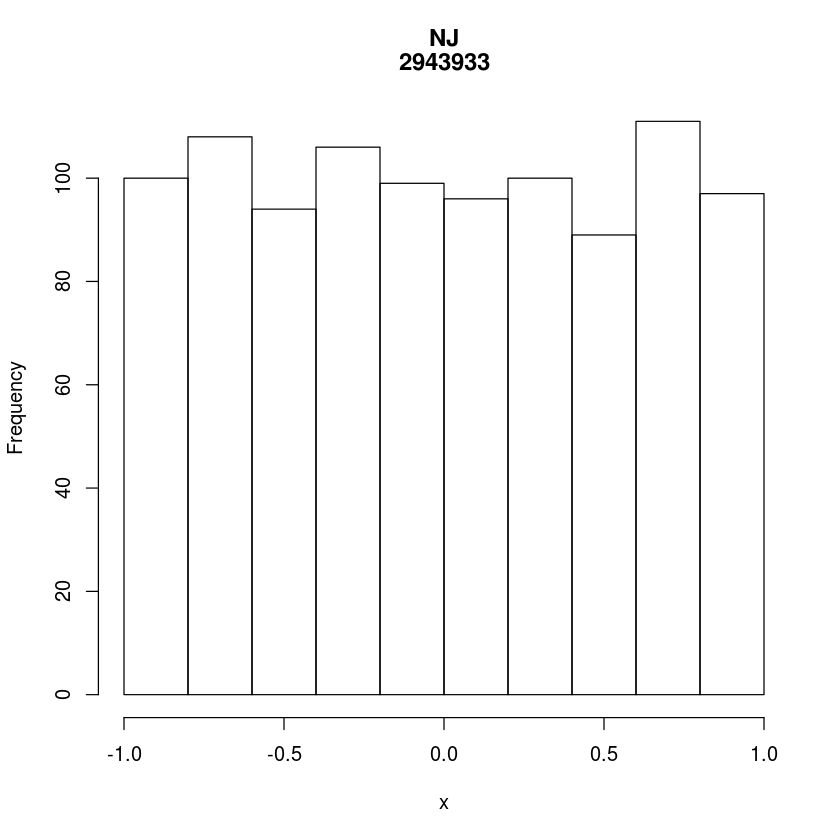

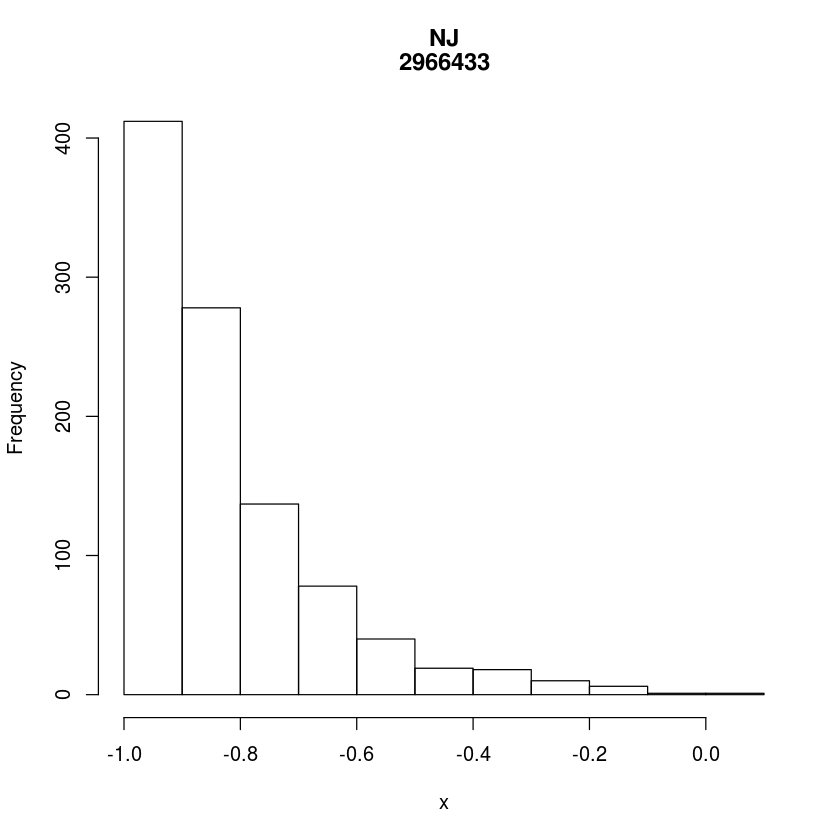

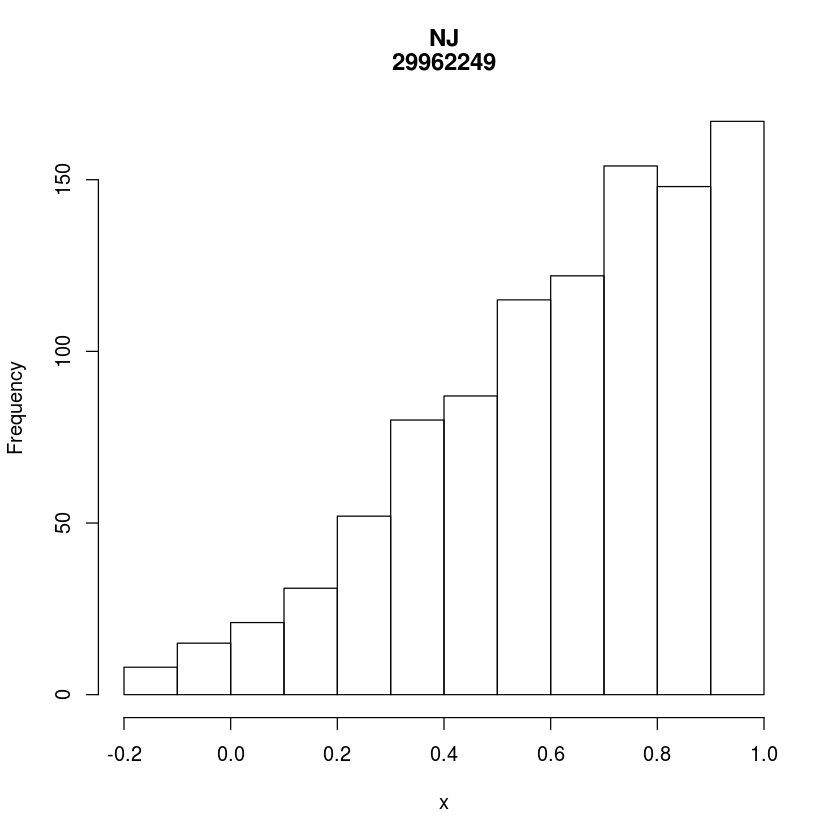

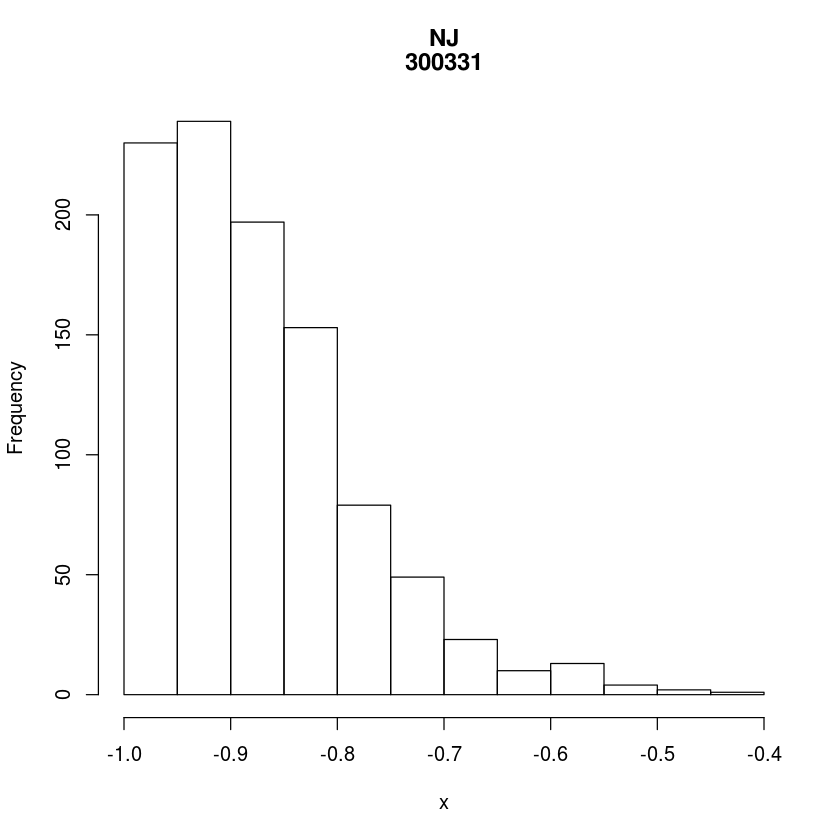

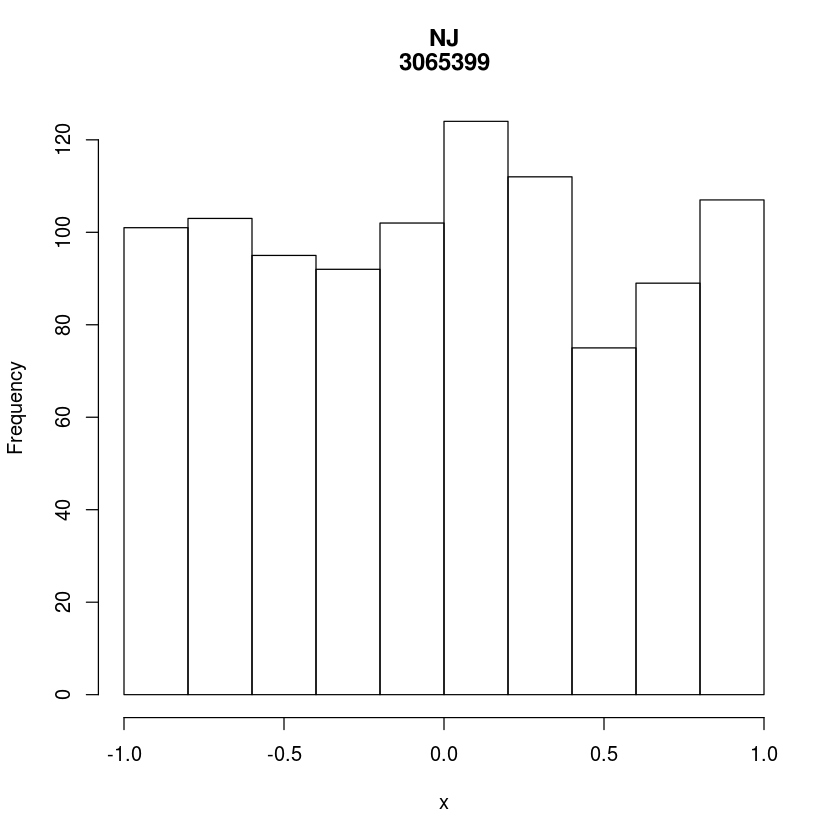

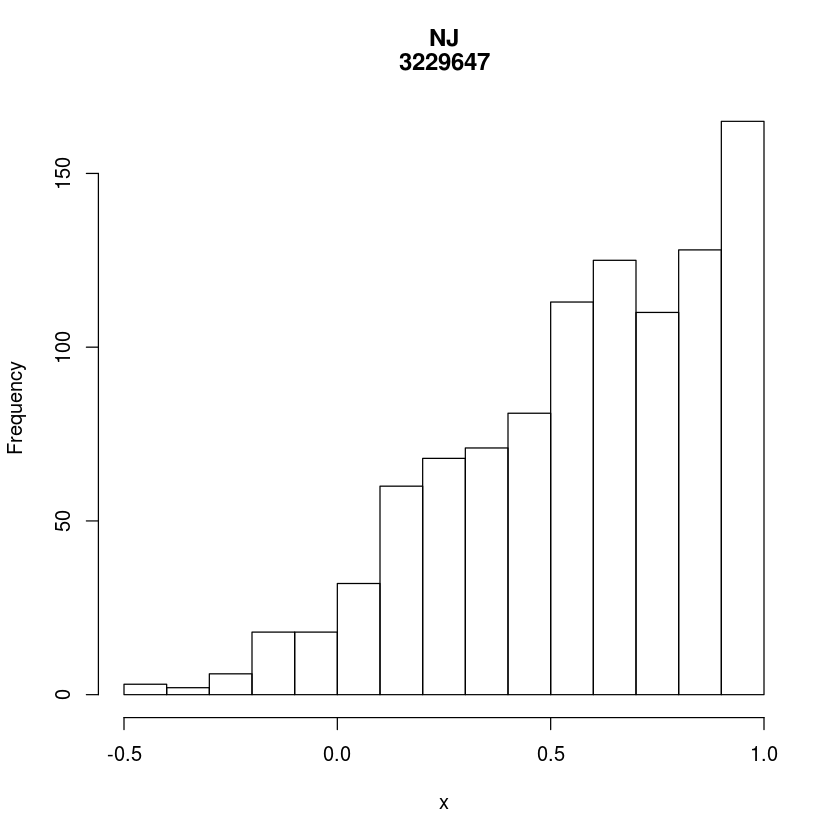

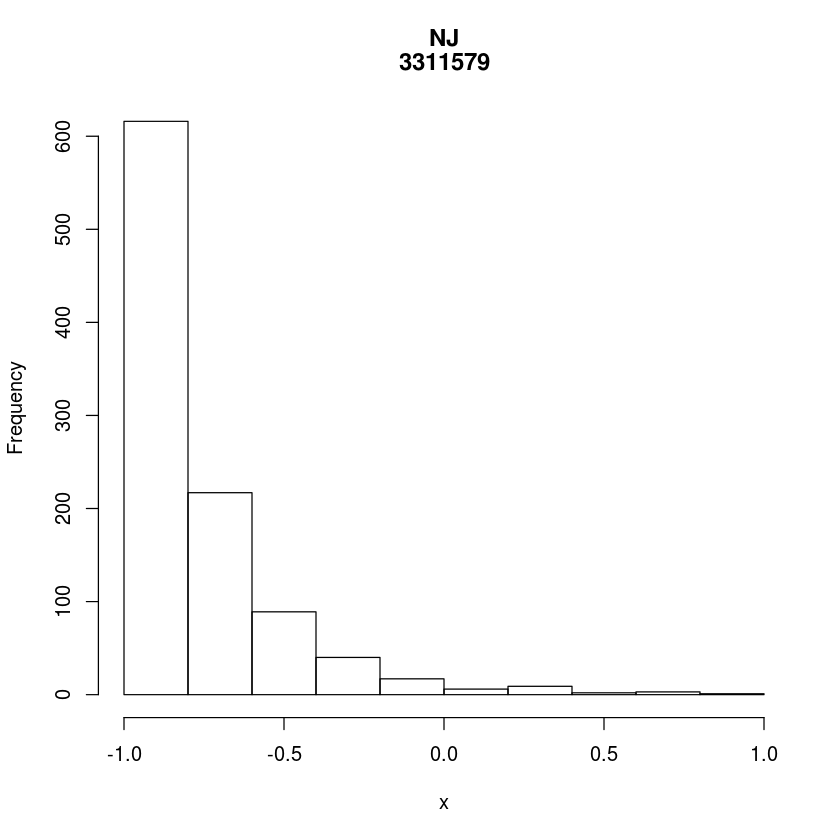

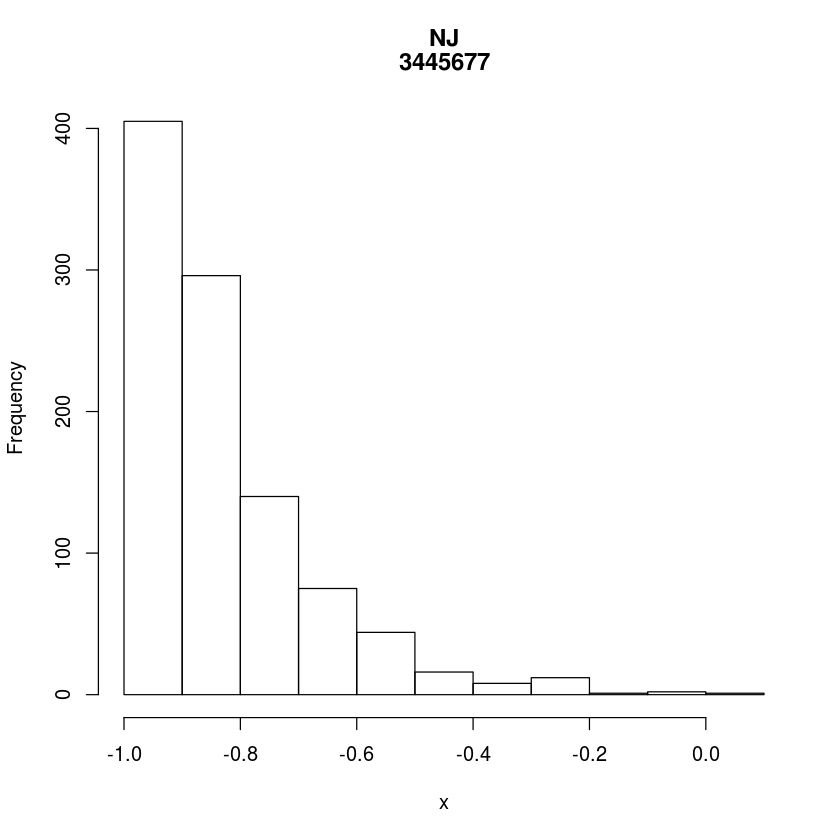

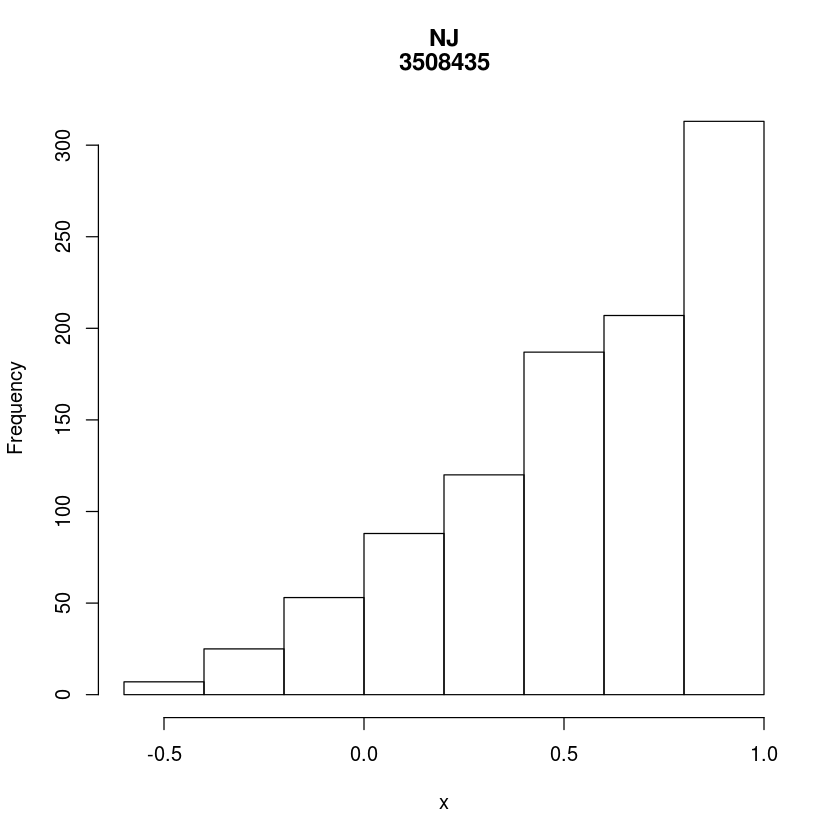

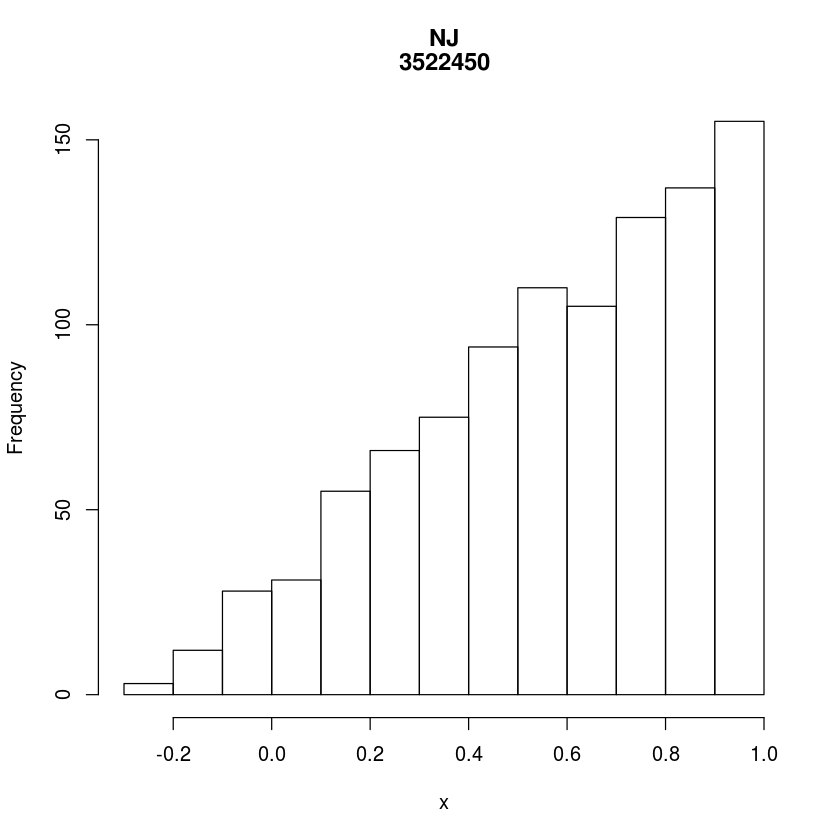

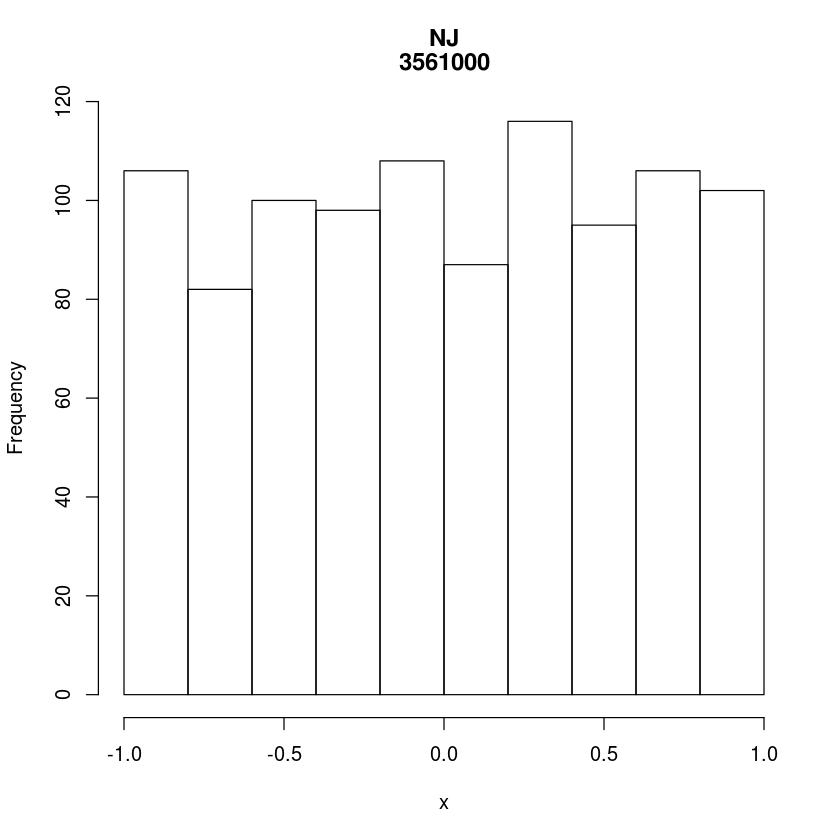

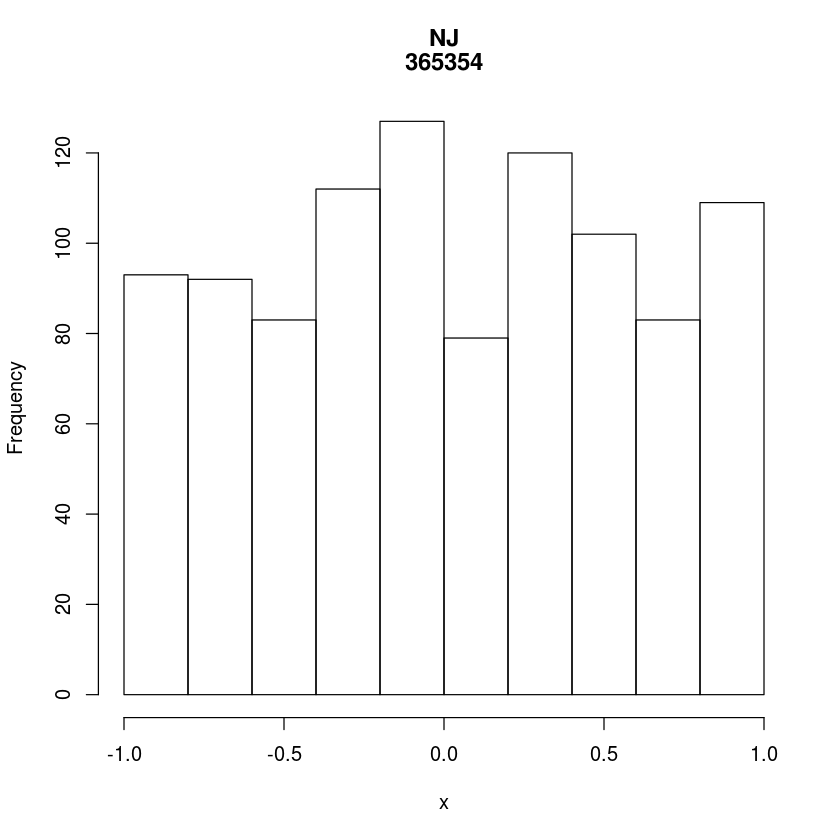

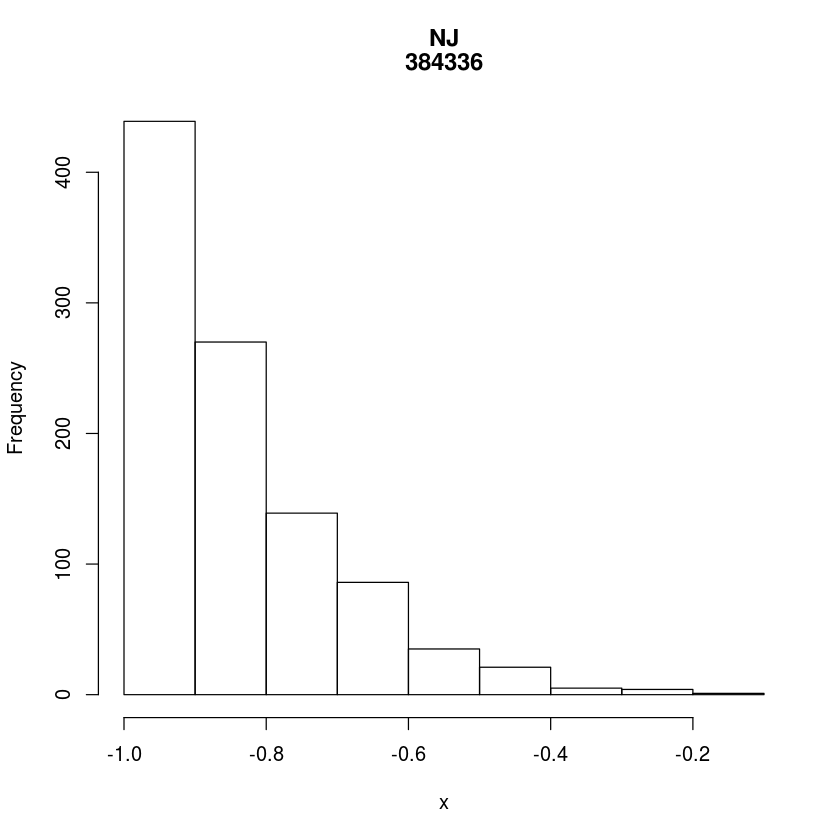

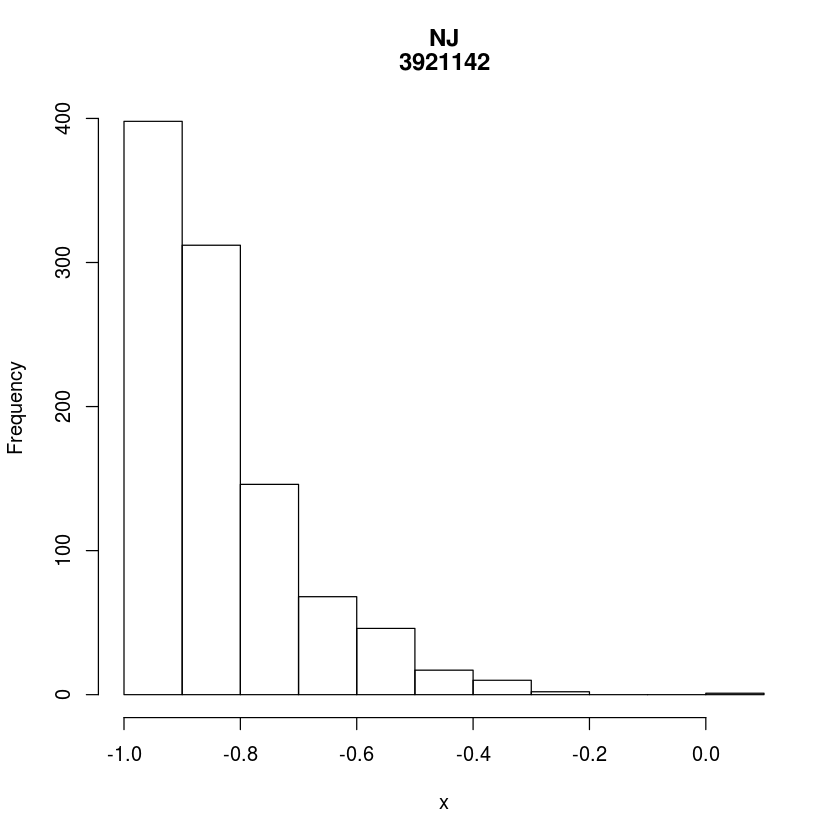

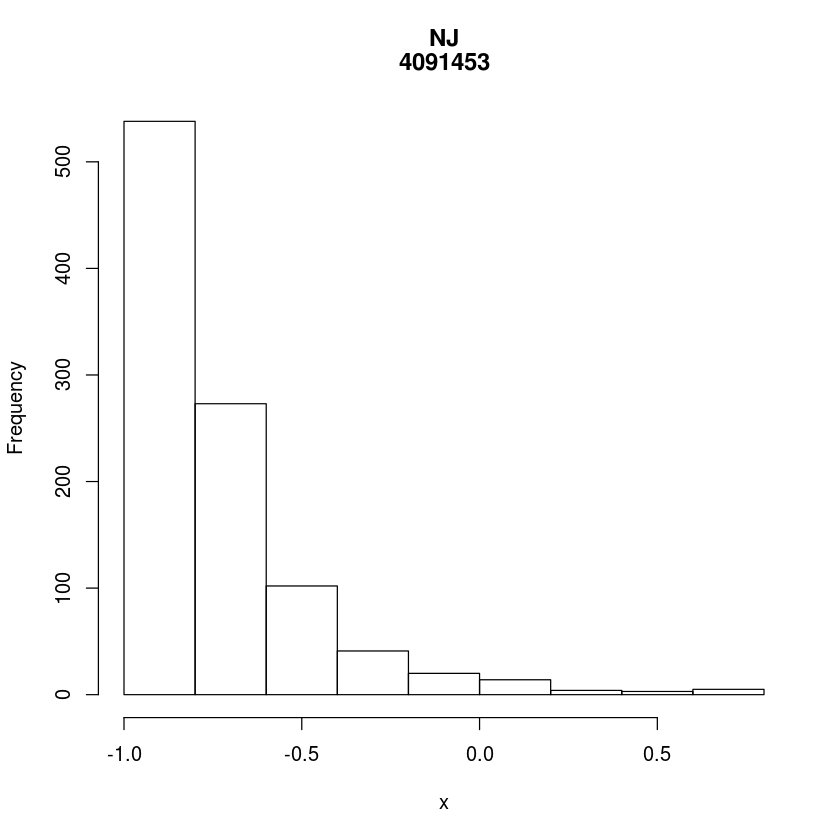

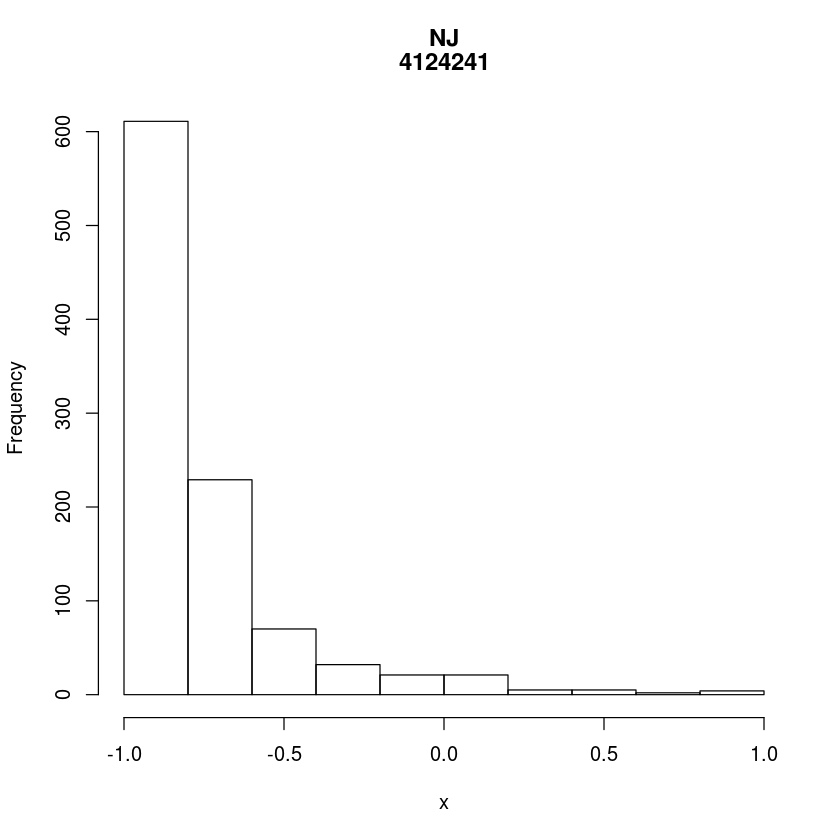

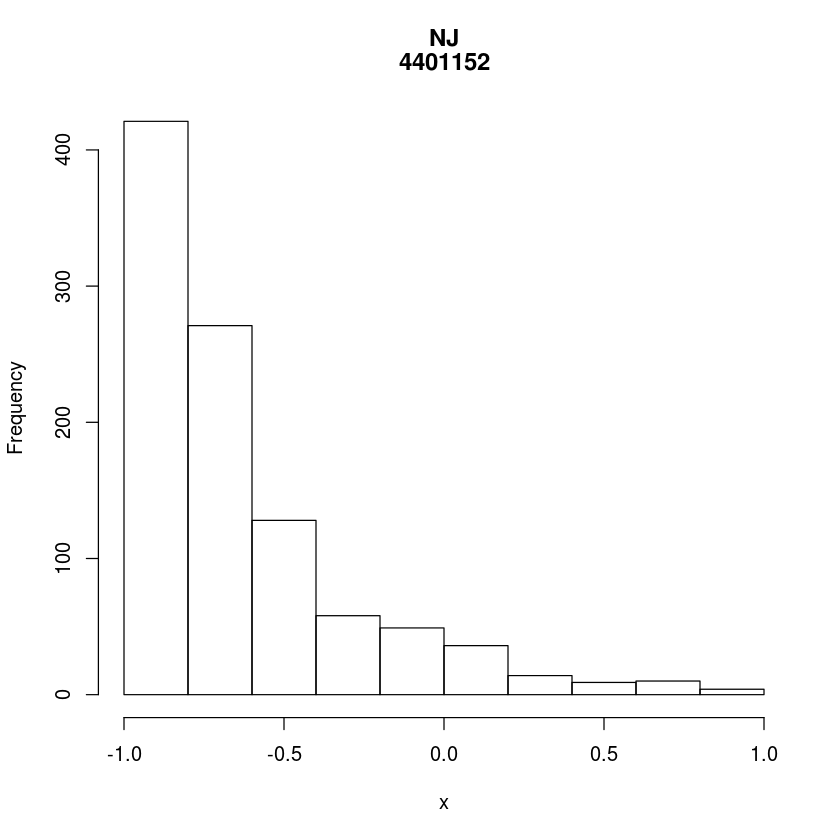

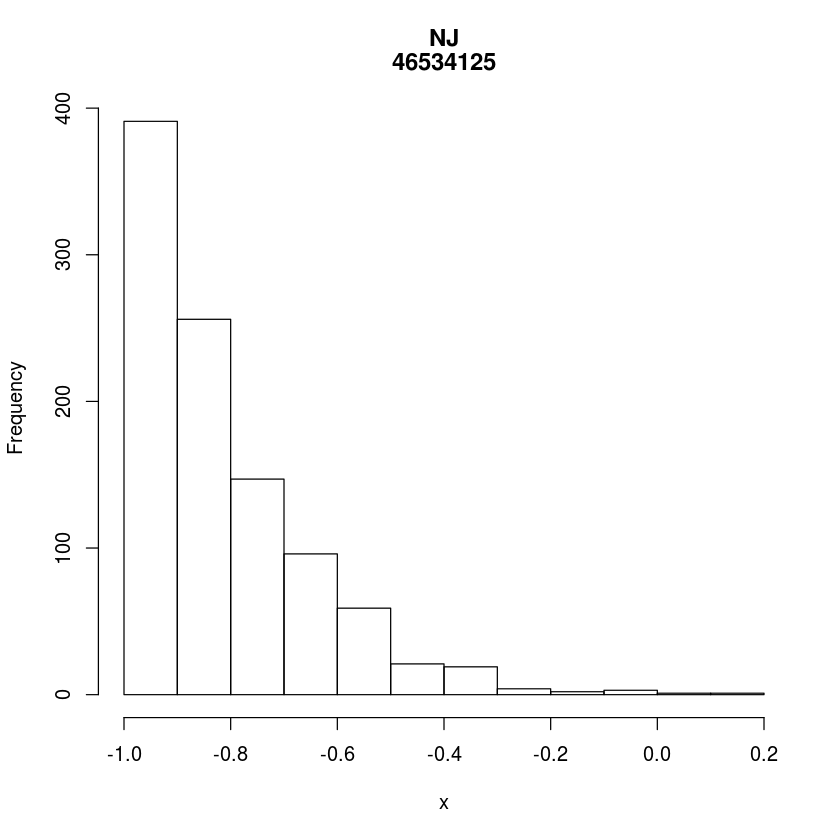

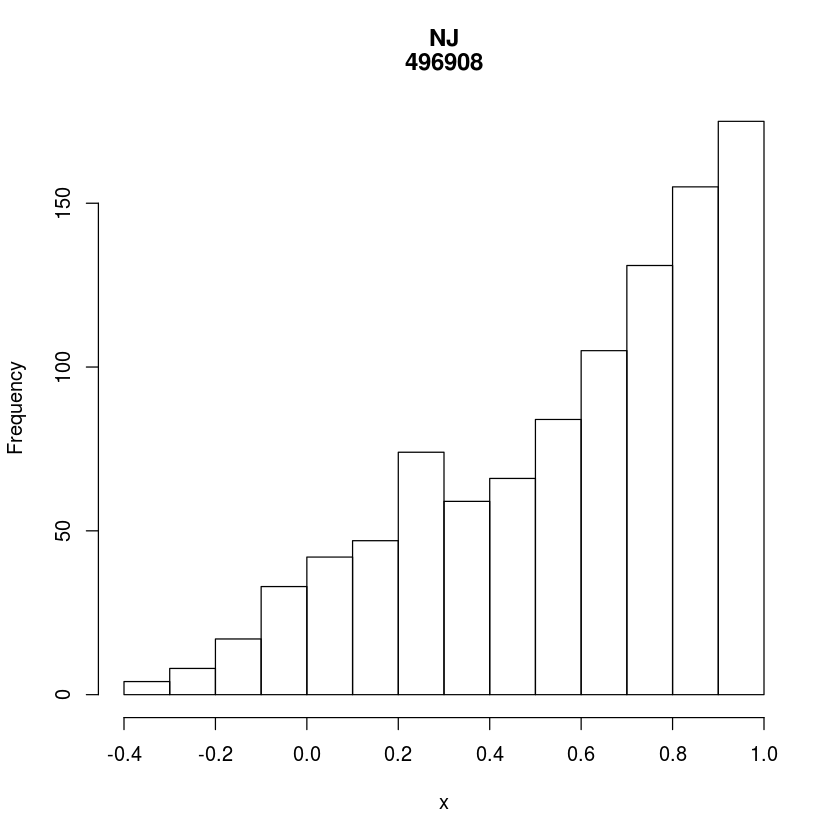

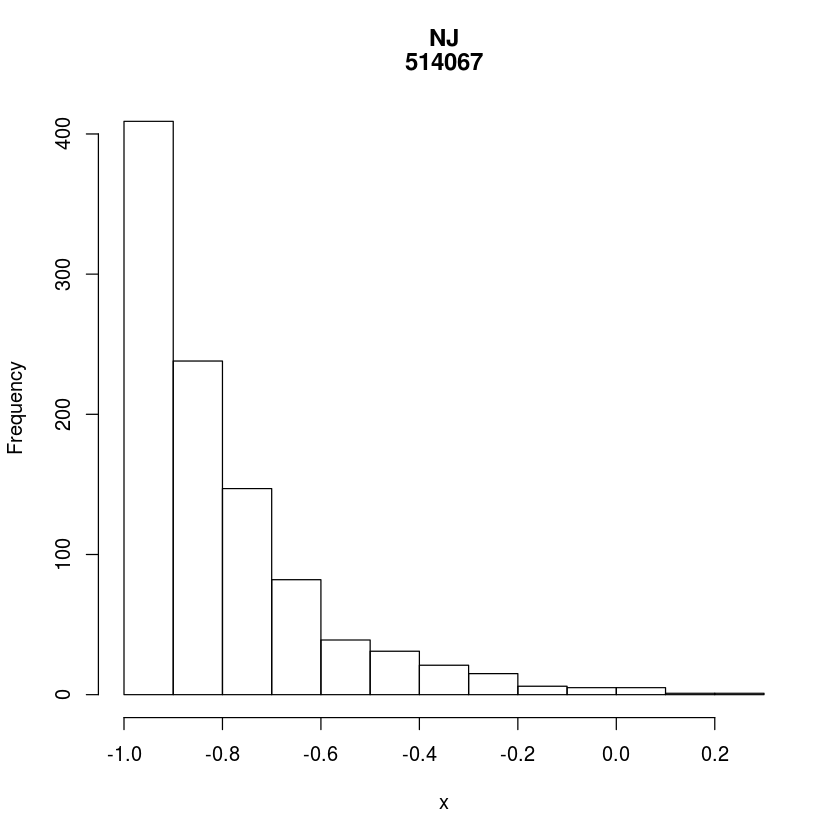

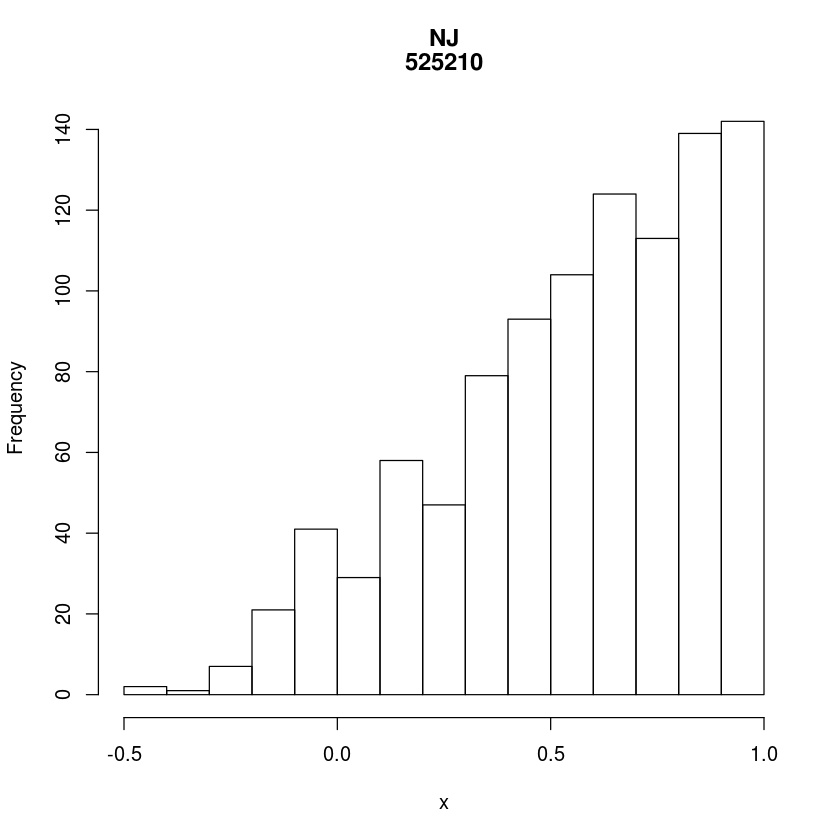

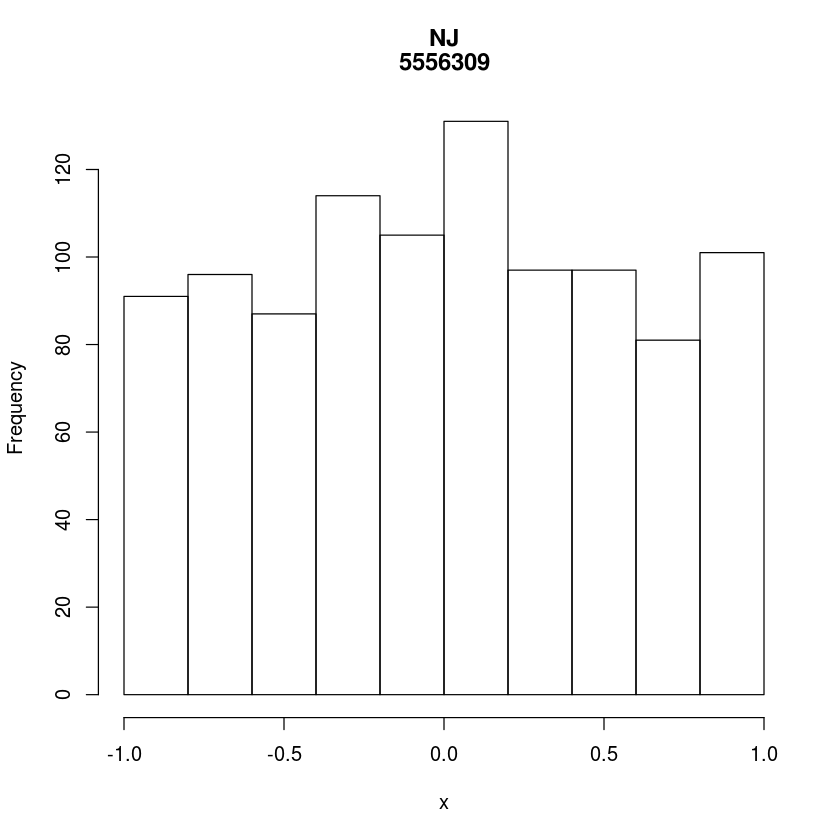

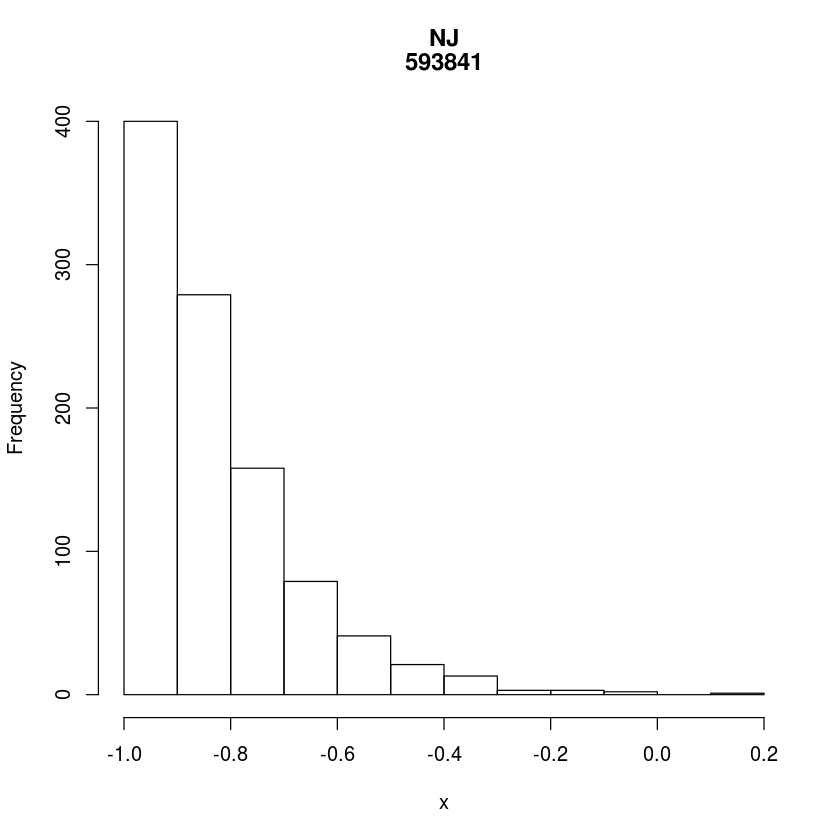

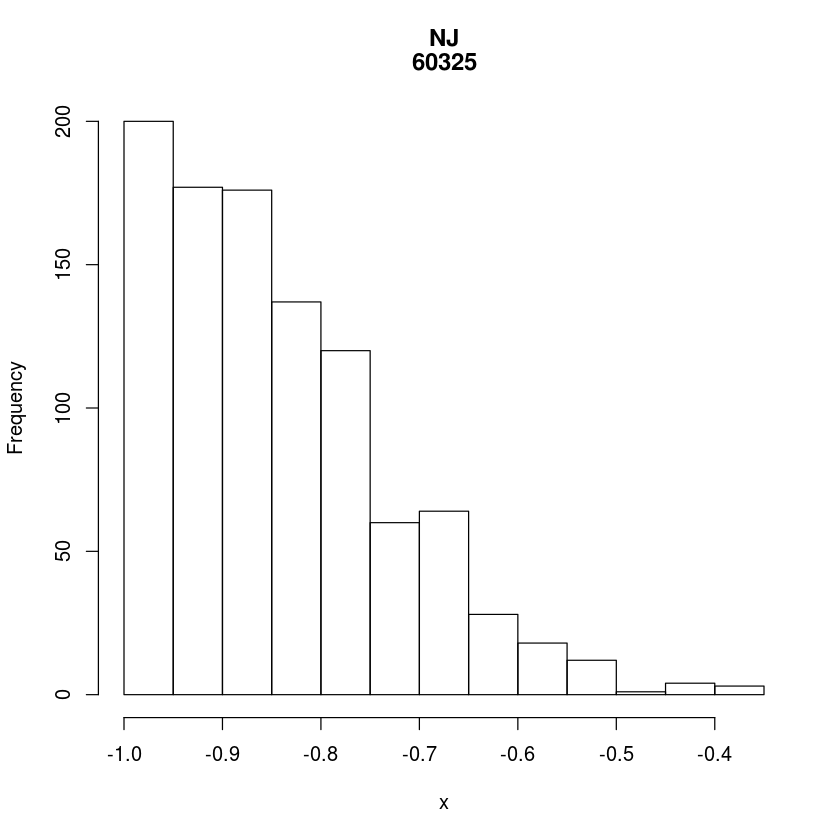

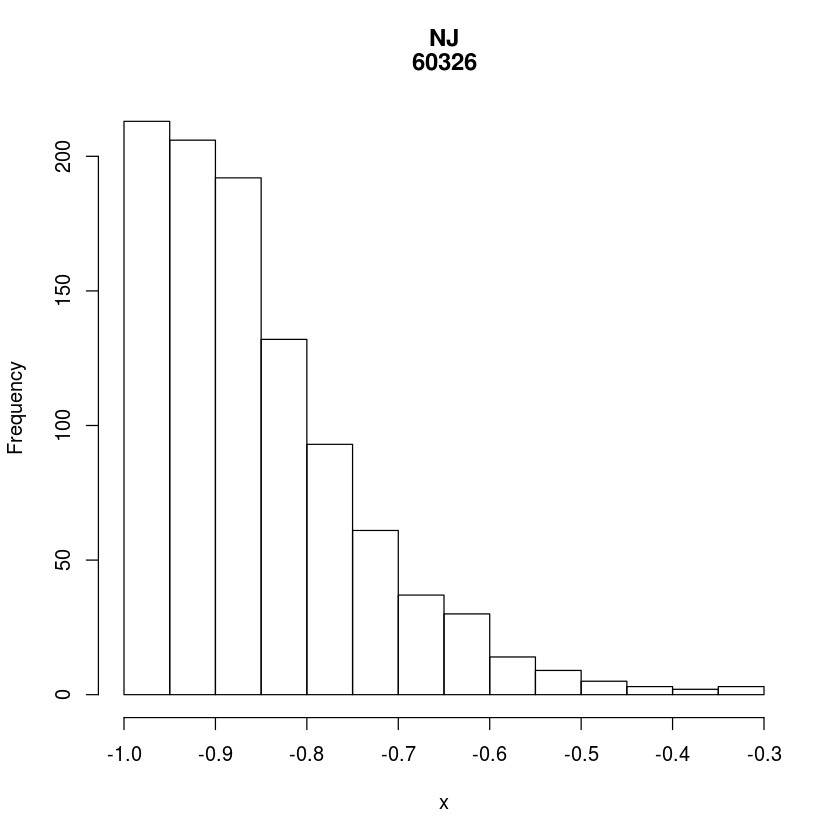

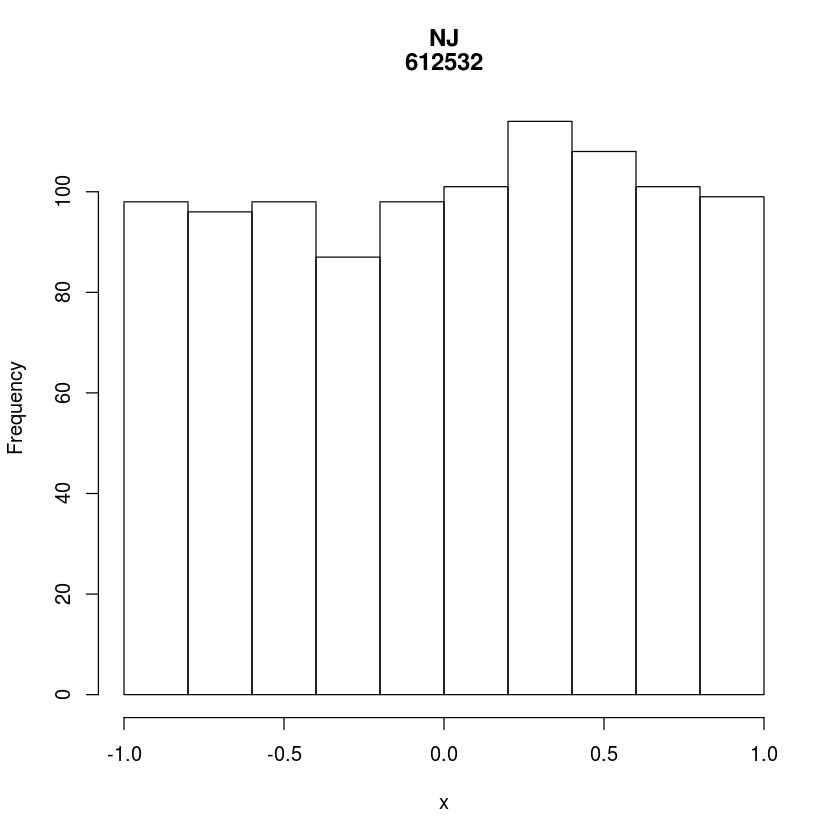

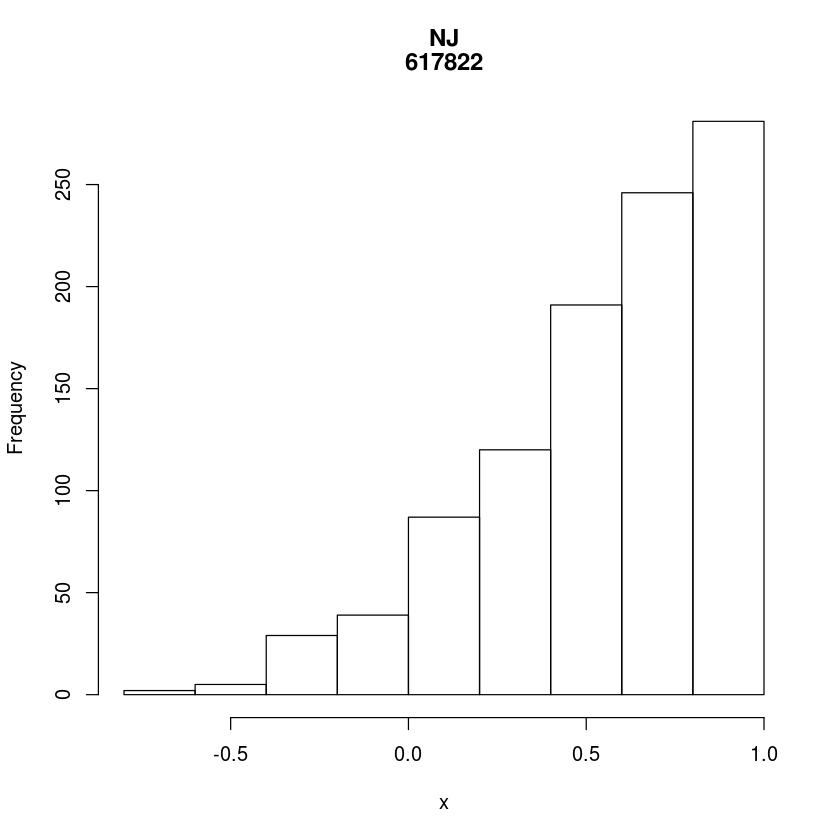

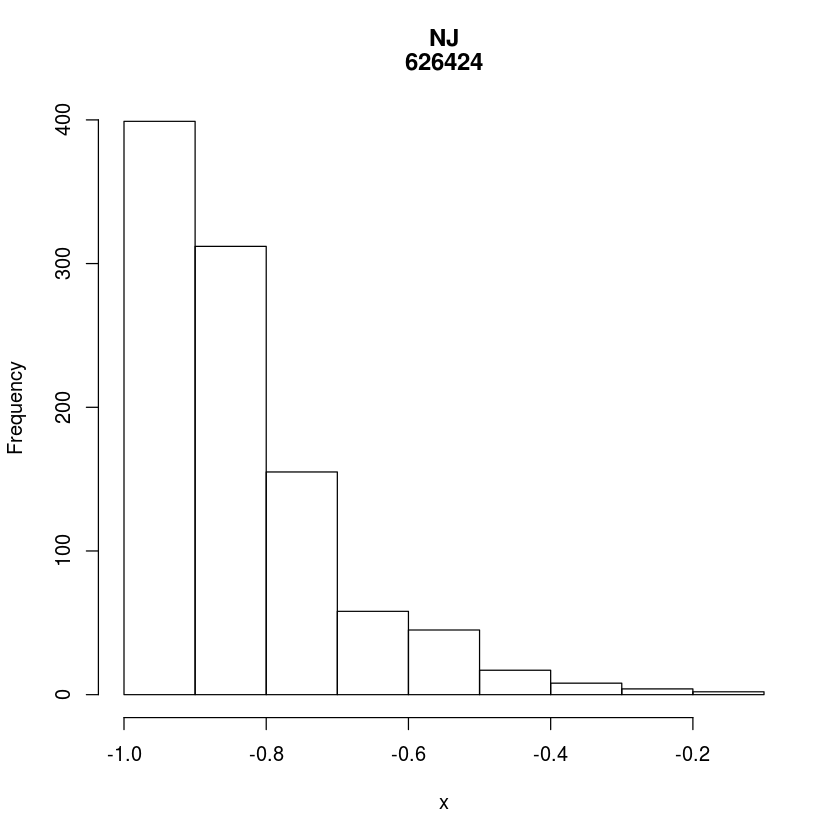

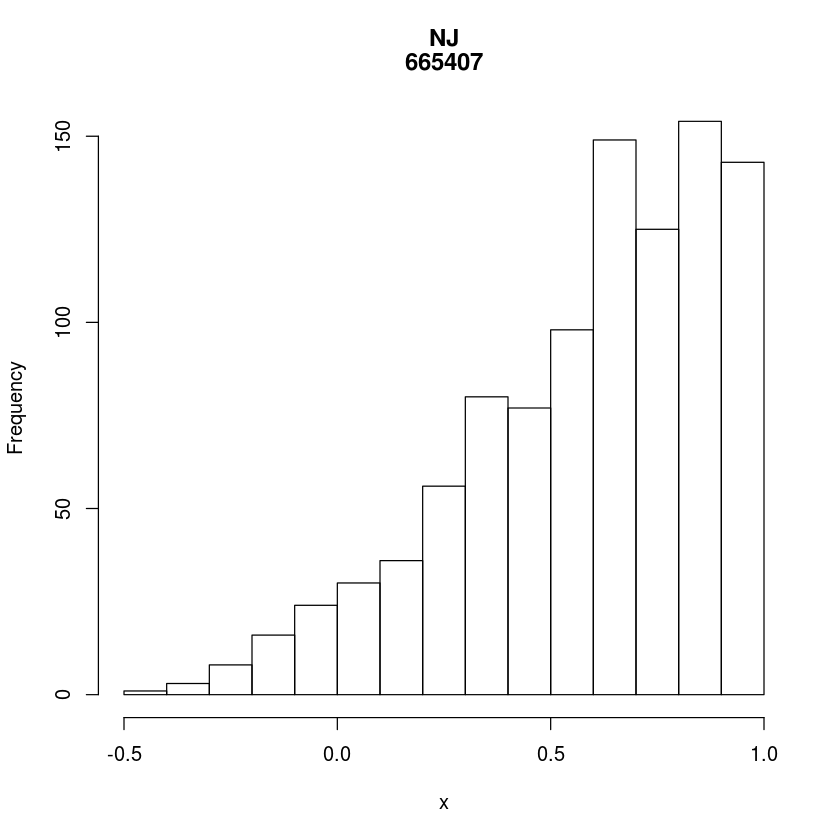

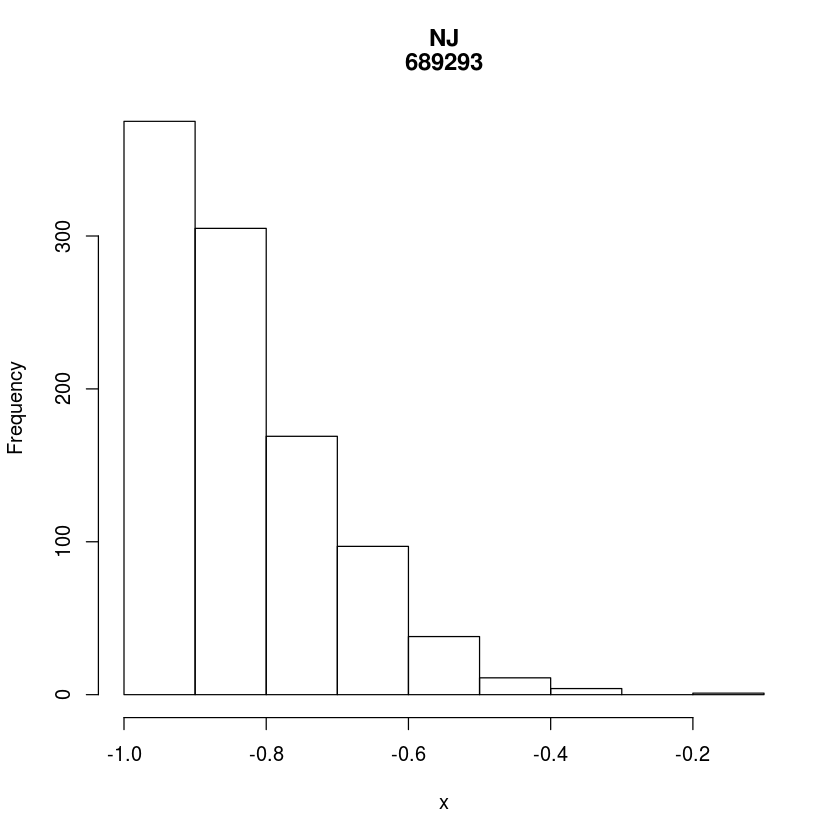

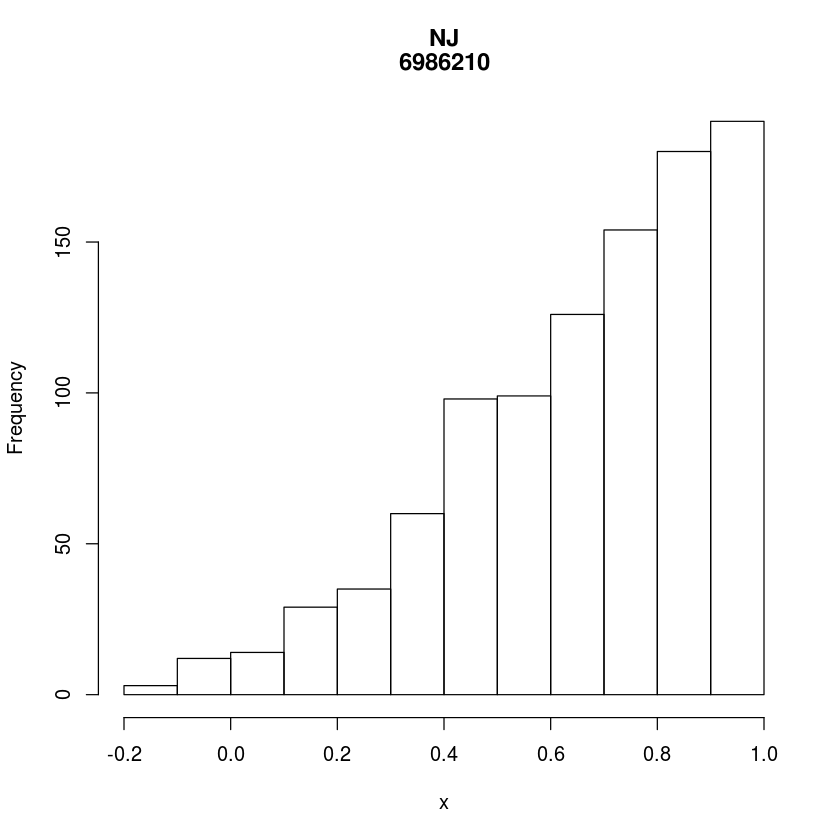

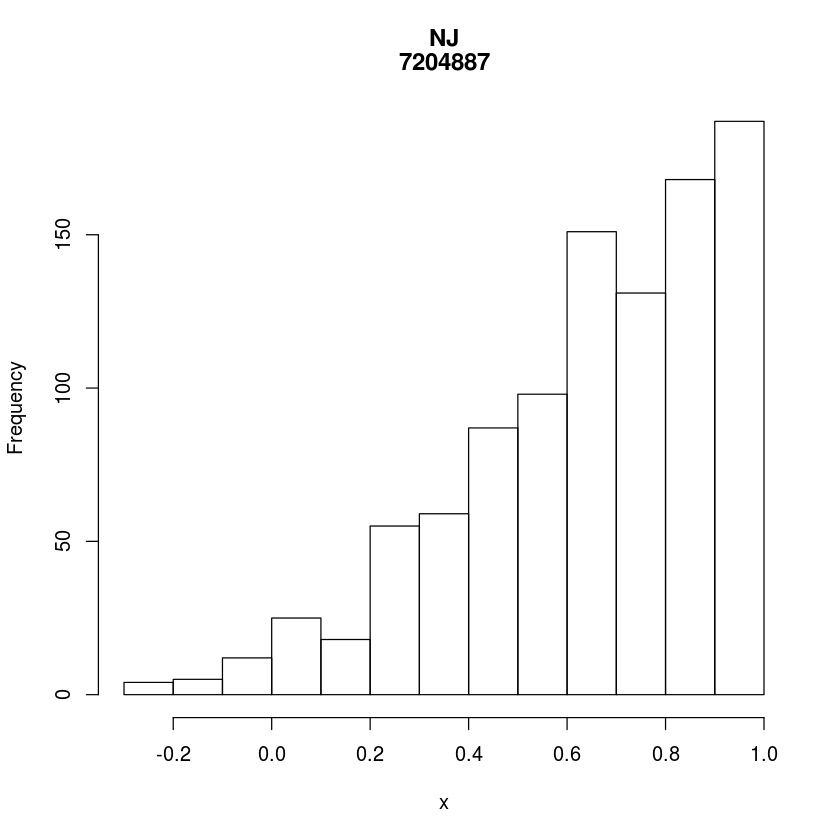

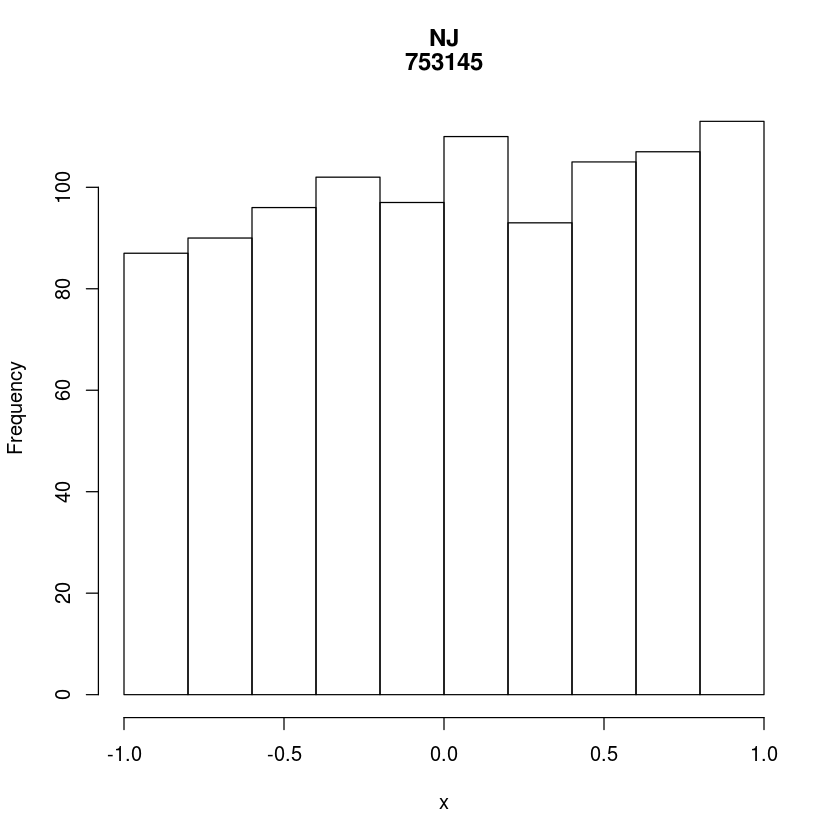

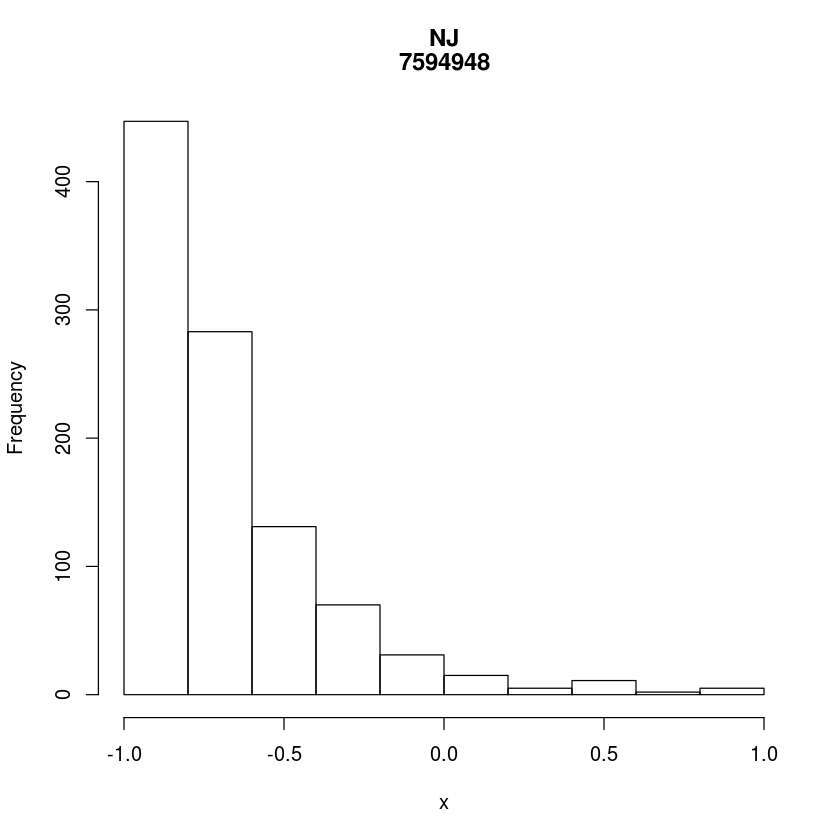

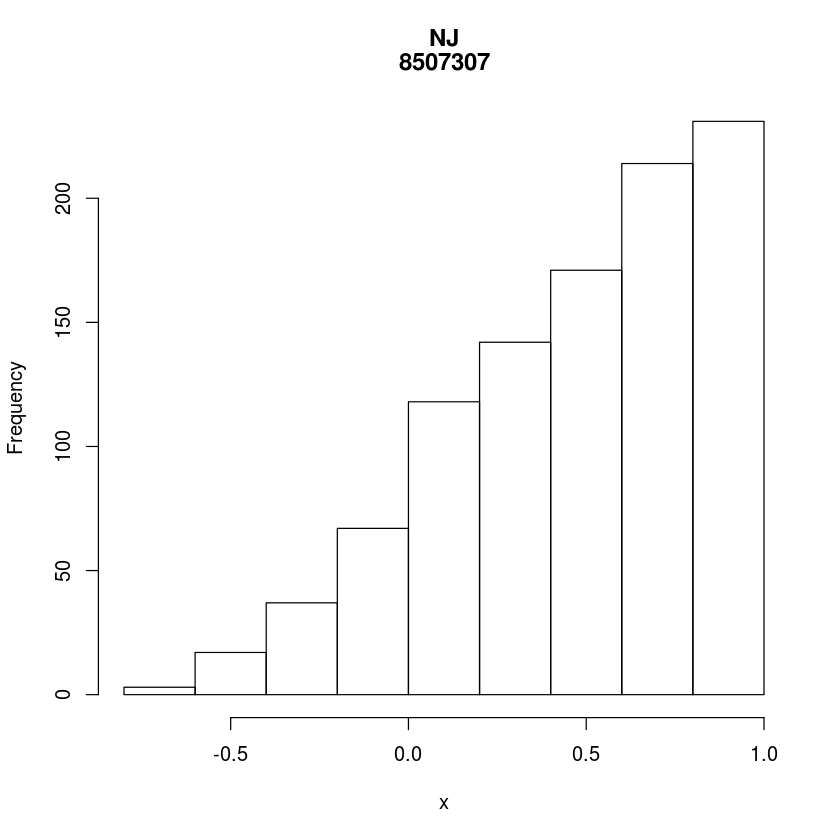

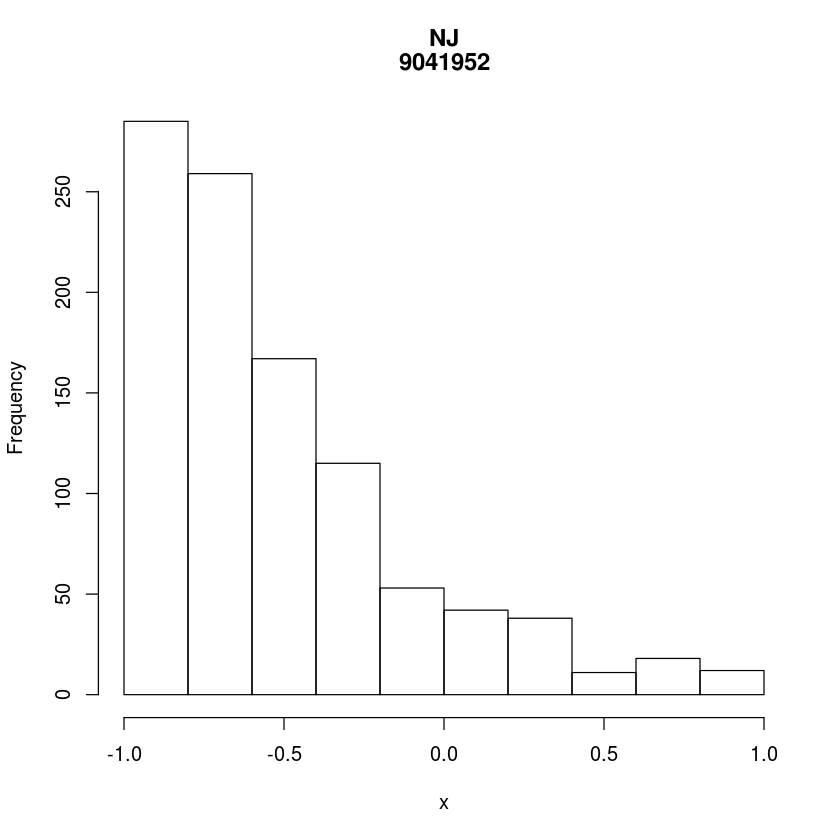

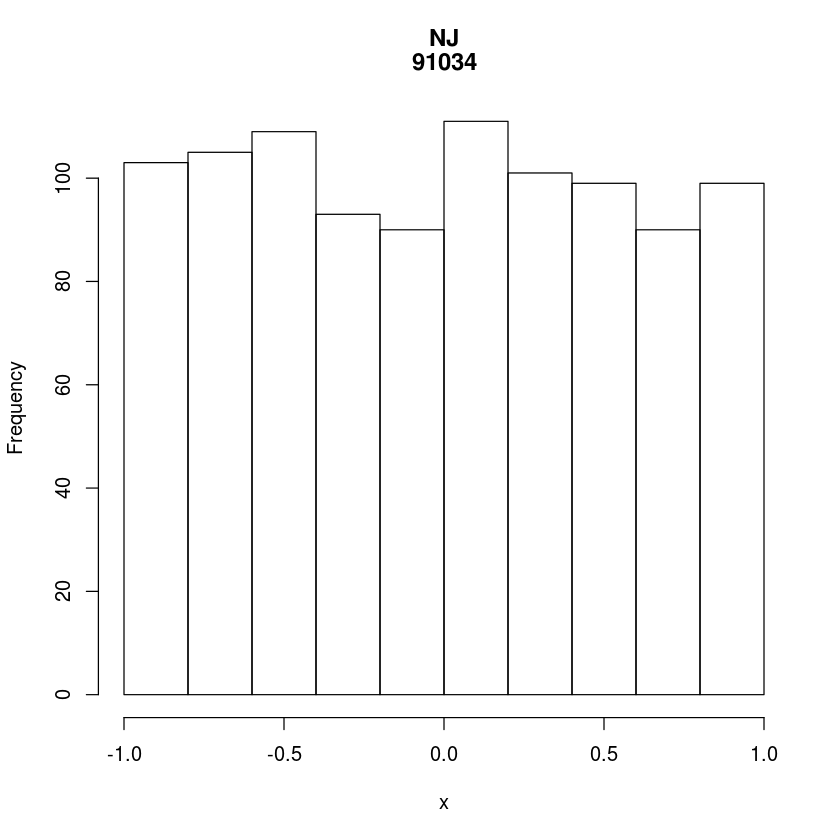

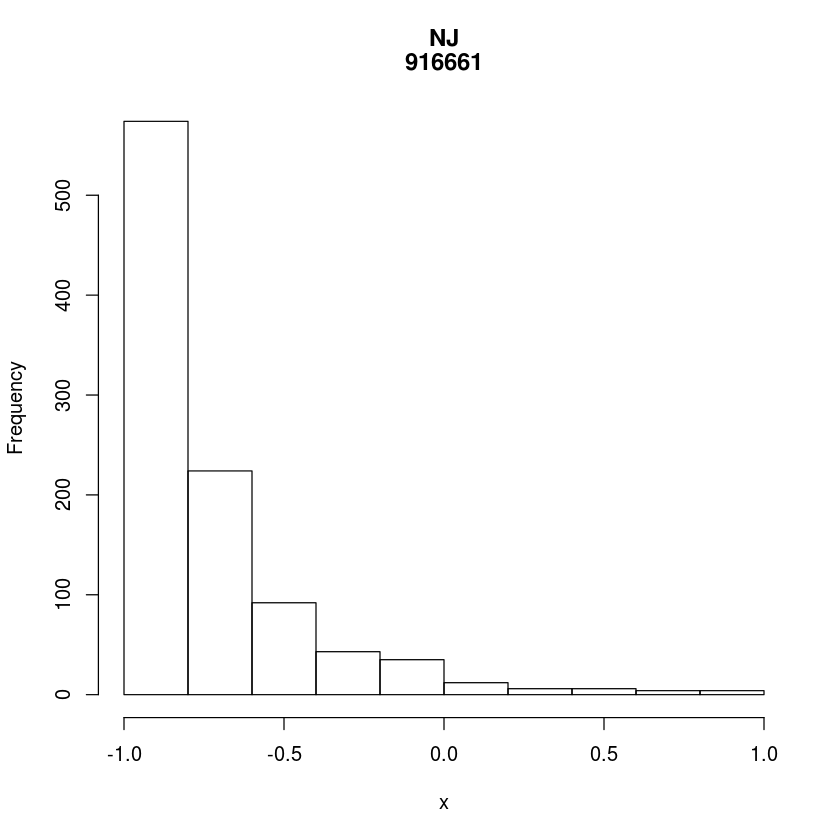

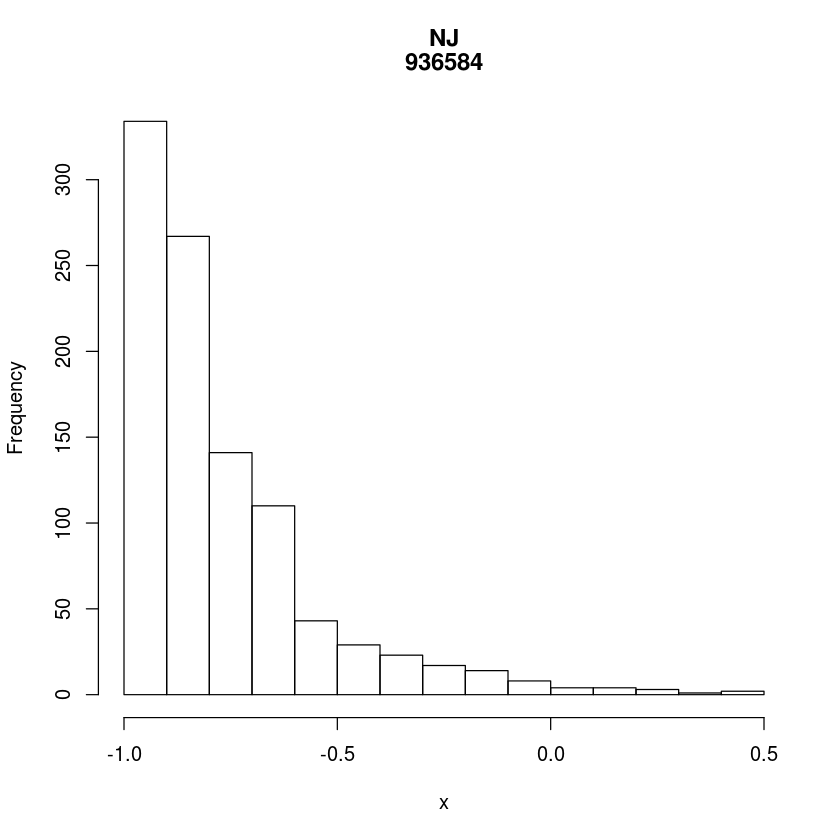

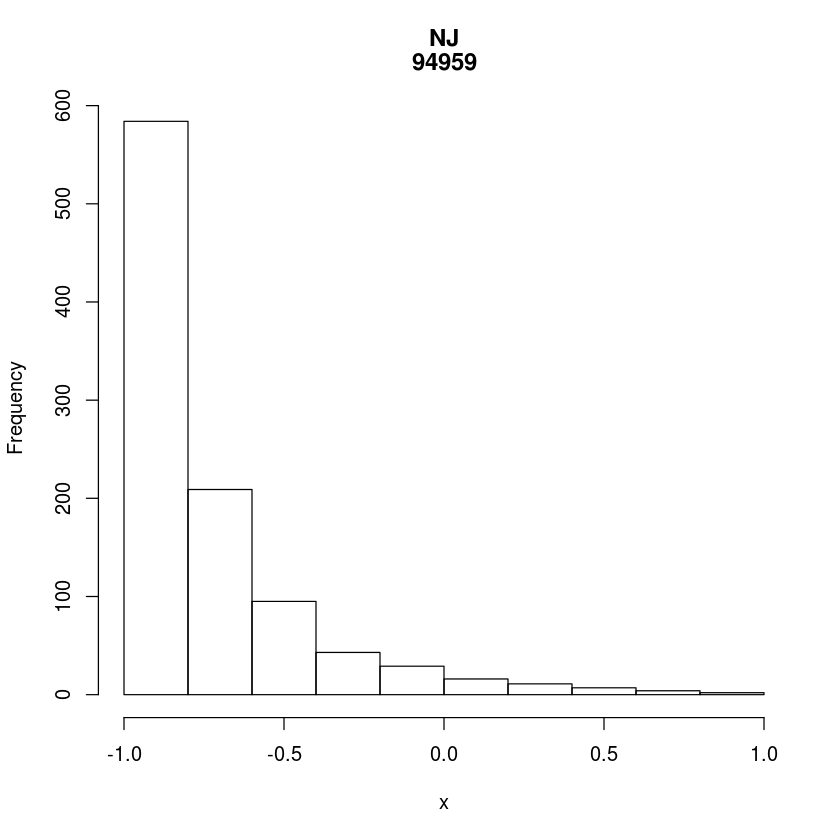

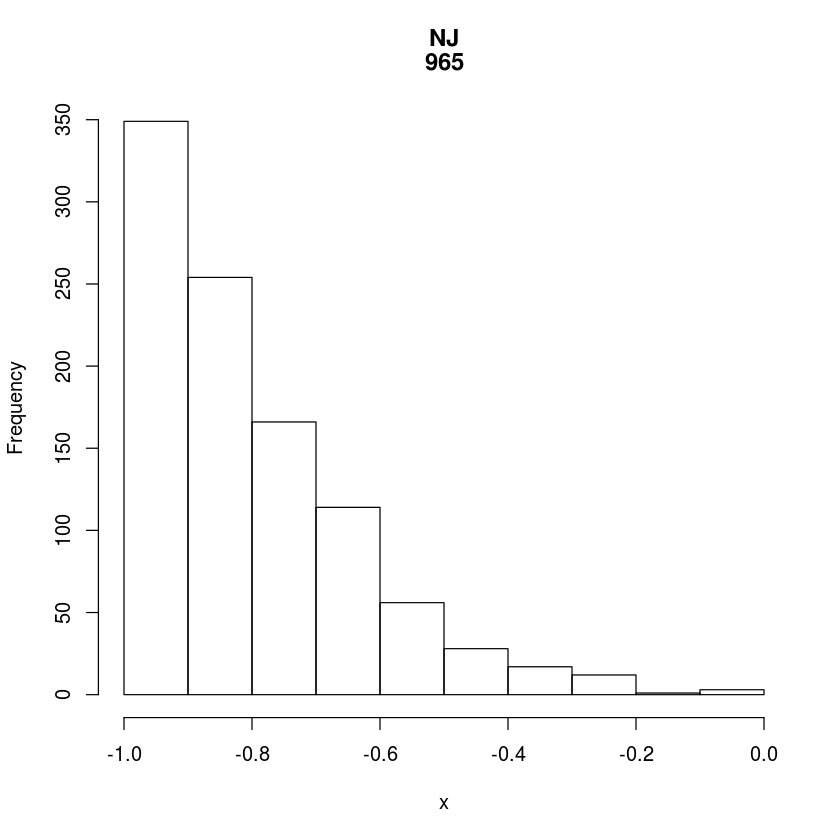

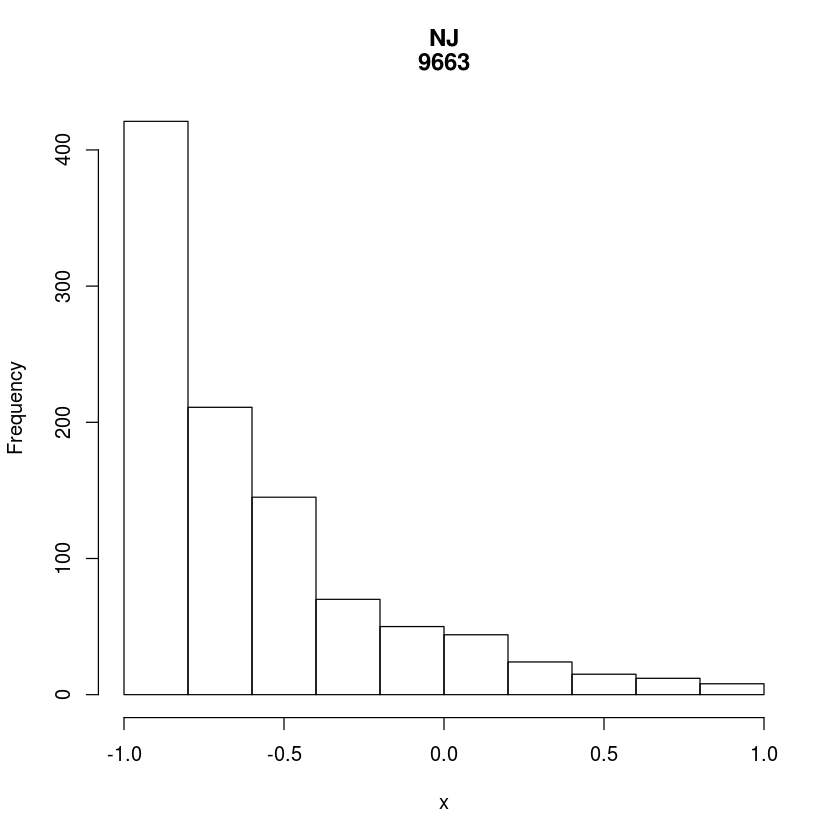

breaks,"-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35, -0.30, -0.25","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8","-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0",⋯,"-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0","-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0"
counts,"87, 95, 92, 104, 105, 96, 107, 113, 89, 112","1, 5, 4, 11, 25, 27, 47, 69, 69, 76, 114, 122, 137, 140, 153","217, 214, 173, 115, 83, 71, 51, 15, 15, 19, 10, 10, 3, 1, 3","570, 253, 98, 41, 21, 9, 6, 1, 1","631, 242, 79, 29, 8, 4, 2, 3, 2","4, 9, 20, 27, 45, 53, 48, 82, 88, 107, 107, 138, 136, 136","386, 291, 126, 77, 44, 41, 22, 5, 6, 1, 0, 1","437, 268, 155, 76, 33, 21, 6, 4","400, 262, 142, 68, 58, 27, 18, 13, 5, 3, 2, 0, 1, 1","600, 215, 113, 34, 14, 16, 2, 3, 1, 2",⋯,"447, 283, 131, 70, 31, 15, 5, 11, 2, 5","3, 17, 37, 67, 118, 142, 171, 214, 231","285, 259, 167, 115, 53, 42, 38, 11, 18, 12","103, 105, 109, 93, 90, 111, 101, 99, 90, 99","574, 224, 92, 43, 35, 12, 6, 6, 4, 4","334, 267, 141, 110, 43, 29, 23, 17, 14, 8, 4, 4, 3, 1, 2","584, 209, 95, 43, 29, 16, 11, 7, 4, 2","349, 254, 166, 114, 56, 28, 17, 12, 1, 3","421, 211, 145, 70, 50, 44, 24, 15, 12, 8","476, 264, 113, 69, 34, 23, 9, 4, 6, 2"
density,"0.435, 0.475, 0.460, 0.520, 0.525, 0.480, 0.535, 0.565, 0.445, 0.560","0.01, 0.05, 0.04, 0.11, 0.25, 0.27, 0.47, 0.69, 0.69, 0.76, 1.14, 1.22, 1.37, 1.40, 1.53","4.34, 4.28, 3.46, 2.30, 1.66, 1.42, 1.02, 0.30, 0.30, 0.38, 0.20, 0.20, 0.06, 0.02, 0.06","2.850, 1.265, 0.490, 0.205, 0.105, 0.045, 0.030, 0.005, 0.005","3.155, 1.210, 0.395, 0.145, 0.040, 0.020, 0.010, 0.015, 0.010","0.04, 0.09, 0.20, 0.27, 0.45, 0.53, 0.48, 0.82, 0.88, 1.07, 1.07, 1.38, 1.36, 1.36","3.86, 2.91, 1.26, 0.77, 0.44, 0.41, 0.22, 0.05, 0.06, 0.01, 0.00, 0.01","4.37, 2.68, 1.55, 0.76, 0.33, 0.21, 0.06, 0.04","4.00, 2.62, 1.42, 0.68, 0.58, 0.27, 0.18, 0.13, 0.05, 0.03, 0.02, 0.00, 0.01, 0.01","3.000, 1.075, 0.565, 0.170, 0.070, 0.080, 0.010, 0.015, 0.005, 0.010",⋯,"2.235, 1.415, 0.655, 0.350, 0.155, 0.075, 0.025, 0.055, 0.010, 0.025","0.015, 0.085, 0.185, 0.335, 0.590, 0.710, 0.855, 1.070, 1.155","1.425, 1.295, 0.835, 0.575, 0.265, 0.210, 0.190, 0.055, 0.090, 0.060","0.515, 0.525, 0.545, 0.465, 0.450, 0.555, 0.505, 0.495, 0.450, 0.495","2.870, 1.120, 0.460, 0.215, 0.175, 0.060, 0.030, 0.030, 0.020, 0.020","3.34, 2.67, 1.41, 1.10, 0.43, 0.29, 0.23, 0.17, 0.14, 0.08, 0.04, 0.04, 0.03, 0.01, 0.02","2.920, 1.045, 0.475, 0.215, 0.145, 0.080, 0.055, 0.035, 0.020, 0.010","3.49, 2.54, 1.66, 1.14, 0.56, 0.28, 0.17, 0.12, 0.01, 0.03","2.105, 1.055, 0.725, 0.350, 0.250, 0.220, 0.120, 0.075, 0.060, 0.040","2.380, 1.320, 0.565, 0.345, 0.170, 0.115, 0.045, 0.020, 0.030, 0.010"
mids,"-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9","-0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95","-0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.675, -0.625, -0.575, -0.5

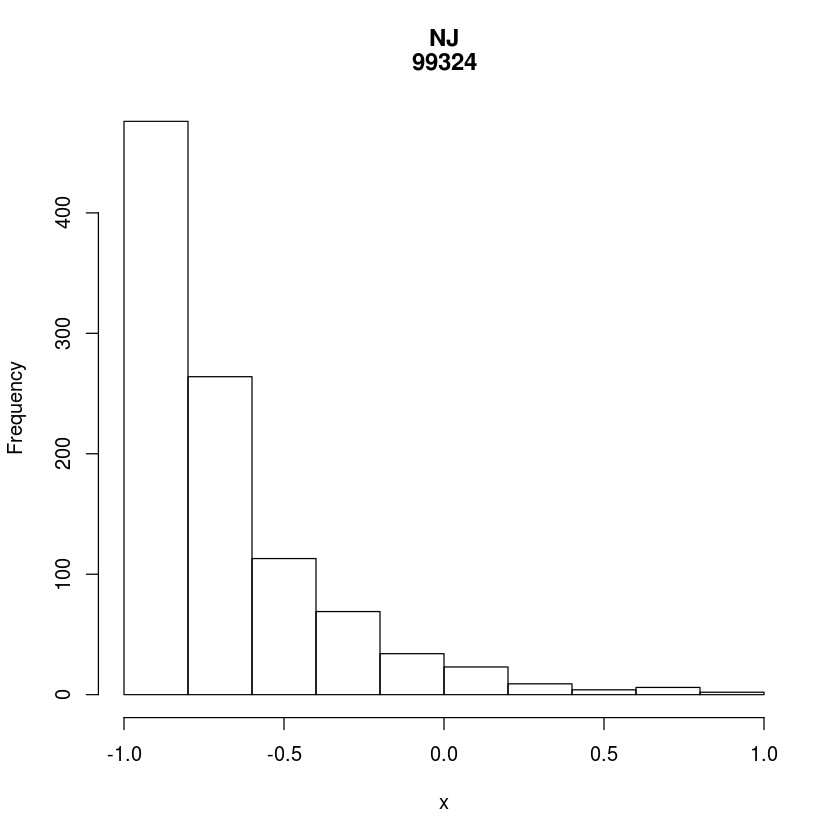

In [24]:
mapply(function(x, y) {
hist(x, main=c("NJ", y[1,4]))}, sNJ, NJ_f2scount)

A biplot of median or mean s vs. the change in allele frequency would be helpful. I’d expect higher s estimates for larger frequency changes, though this is also somewhat dependent on initial allele frequencies (perhaps color the dots by initial allele freq?). 



In [26]:
#calculate mean s value 
meansNJ=t(as.data.frame(mapply(function(x, y) {
cbind(mean(x), as.character(y[1,4]))}, sNJ, NJ_f2scount)))
row.names(meansNJ)=NULL
meansNJ=as.data.frame(meansNJ)
colnames(meansNJ)=c("mean", "Position")
meansNJ$mean=as.numeric(as.character(meansNJ$mean))

In [27]:
meansNY=t(as.data.frame(mapply(function(x, y) {
c(mean(x), as.character(y[1,4]))}, sNY, NY_f2scount)))
row.names(meansNY)=NULL
meansNY=as.data.frame(meansNY)
colnames(meansNY)=c("mean", "Position")
meansNY$mean=as.numeric(as.character(meansNY$mean))

In [10]:
#mafs for significant snps
mafsNJNY50SigoutVT=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT_nr.csv")

In [32]:
#mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_E.x", "Maf2_U.x", "Maf2_E.y", "Maf2_U.y", "Maf2_E.VT", "Maf2_U.VT", "diff.x", "diff.y", "diff.VT")]
#colnames(mafsSimp)=c("Scaffold", "Position", "NJ_Post", "NJ_Pre", "NY_Post", "NY_Pre", "VT_Post", "VT_Pre", "NJ_diff", "NY_diff", "VT_diff")

In [18]:
mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_U.x", "Maf2_U.y",  "Maf2_U.VT", "diff.x", "diff.y", "diff.VT")]
colnames(mafsSimp)=c("Scaffold", "Position",  "NJ_Pre",  "NY_Pre",  "VT_Pre", "NJ_diff", "NY_diff", "VT_diff")
mafsSimp[abs(mafsSimp$NY_diff)>0.7,]

,Scaffold,Position,NJ_Pre,NY_Pre,VT_Pre,NJ_diff,NY_diff,VT_diff
1,GL429767,16839644,0.665153,0.925564,0.433736,-0.617749,-0.705524,0.010050
8,GL429772,14993622,0.746480,0.863641,0.461392,-0.561531,-0.713684,-0.004424
44,GL429998,99324,0.640445,0.800678,0.401198,-0.567629,-0.755151,0.056708
47,GL430029,1661413,0.152913,0.044739,0.368284,0.563131,0.819578,-0.064558
49,GL430101,496908,0.324946,0.000003,0.211981,0.505373,0.917935,0.240994


In [36]:
#rearrange to graph 
mafsSimp=pivot_longer(mafsSimp,
  cols = 3:8,
  names_to = c("Site", "Time"),
  names_pattern = "(.*)_(.*)",
  values_to = "maf"
)

In [37]:
head(mafsSimp)

Scaffold,Position,Site,Time,maf
GL429767,16839644,NJ,Pre,0.665153
GL429767,16839644,NY,Pre,0.925564
GL429767,16839644,VT,Pre,0.433736
GL429767,16839644,NJ,diff,-0.617749
GL429767,16839644,NY,diff,-0.705524
GL429767,16839644,VT,diff,0.010050


In [61]:
mafsSimp=pivot_longer(mafsSimp,
  cols = 3:5,
  names_to = c("Site2"),
  names_pattern = "(.*)_",
  values_to = "diff"
)

In [38]:
mafsSimp=pivot_wider(mafsSimp, names_from = Time, values_from = maf)

In [39]:
mafsSimp$Position=as.factor(as.character(mafsSimp$Position))

In [40]:
meanmafsNJ=merge(meansNJ, mafsSimp[mafsSimp$Site=="NJ",], by="Position")

In [41]:
meanmafsNY=merge(meansNY, mafsSimp[mafsSimp$Site=="NY",], by="Position")

In [46]:
head(meanmafsNY)

Position,mean,Scaffold,Site,Pre,diff
11932,0.5735574,GL430166,NY,0.172547,0.509016
1241213,0.4972427,GL429927,NY,0.240988,0.617383
1396110,-0.8444408,GL430008,NY,0.786277,-0.524482
1484586,-0.8058517,GL429955,NY,0.500034,-0.500032
14993622,-0.7969121,GL429772,NY,0.863641,-0.713684
1661413,0.6524540,GL430029,NY,0.044739,0.819578


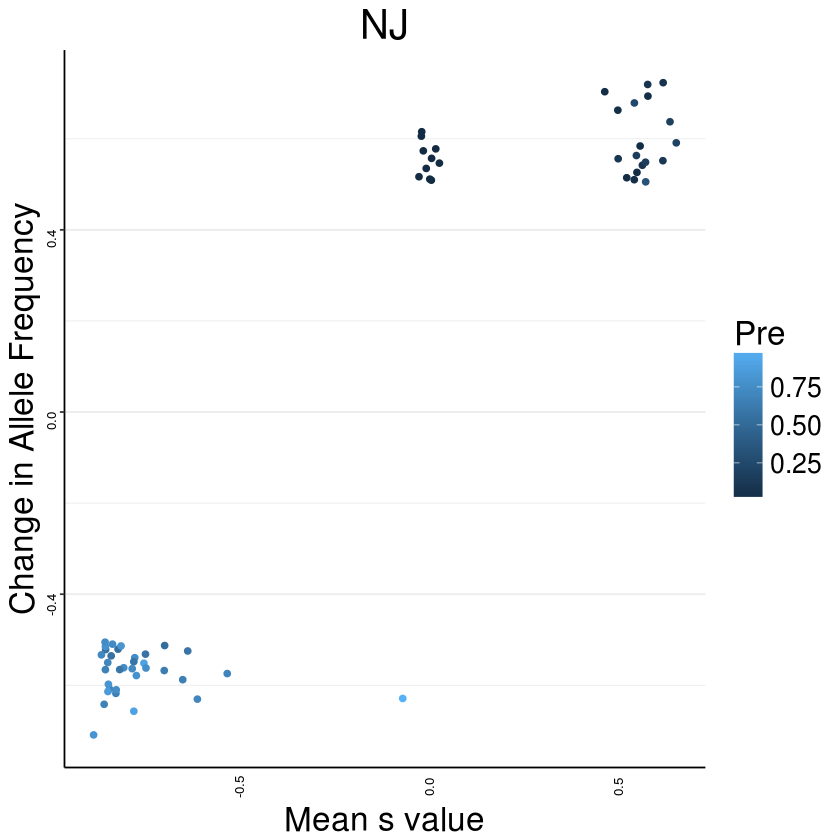

In [42]:
ggplot(meanmafsNJ, aes(x=mean, y=(diff))) +
ggtitle("NJ") +
    geom_point(aes(color=Pre)) +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

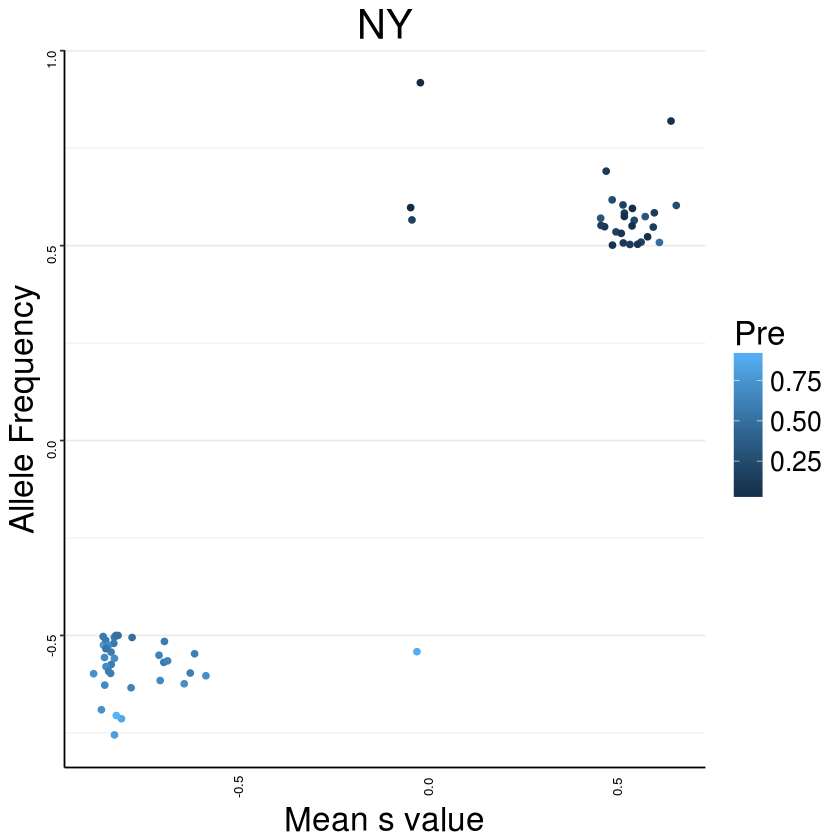

In [43]:
ggplot(meanmafsNY, aes(x=mean, y=(diff))) +
    geom_point(aes(color=Pre)) +
    ggtitle("NY") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

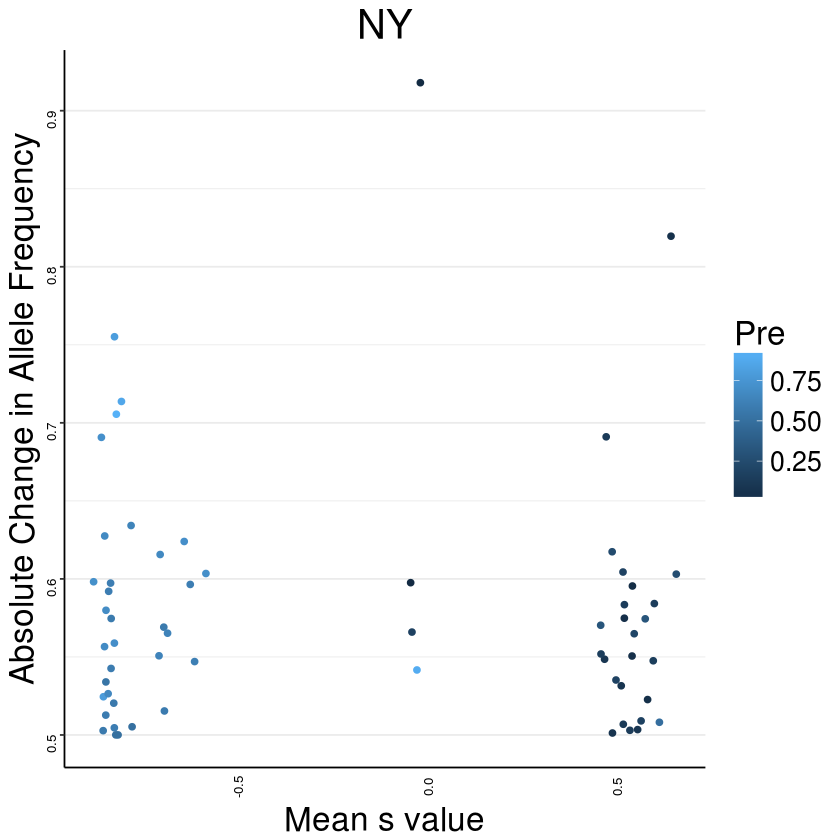

In [44]:
ggplot(meanmafsNY, aes(x=mean, y=abs(diff))) +
    geom_point(aes(color=Pre)) +
    ggtitle("NY") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Absolute Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

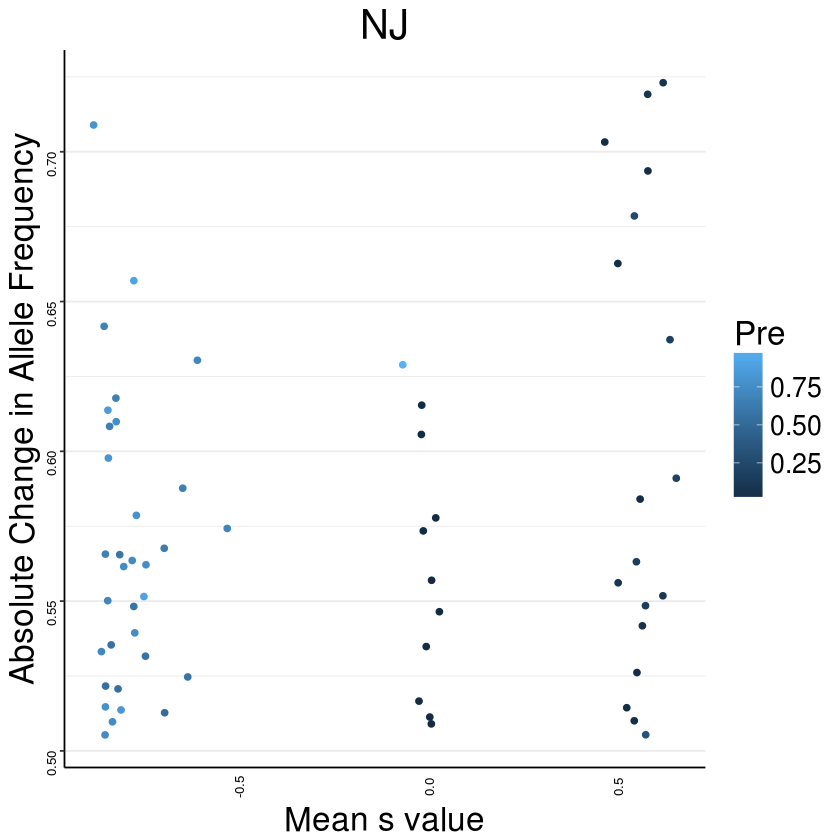

In [45]:
ggplot(meanmafsNJ, aes(x=mean, y=abs(diff))) +
ggtitle("NJ") +
    geom_point(aes(color=Pre)) +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Absolute Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

Make plots of each step in the simulations

In [150]:
NJ_sig[8]

SNP,MAF_U,MAF_E,nInd_U,nInd_E
173352,0.561062,0.000003,14,11
173352,0.440419,0.064113,14,11
173352,0.513923,0.057650,14,11
173352,0.440182,0.054857,14,11
173352,0.566576,0.122286,14,11
173352,0.479334,0.058166,14,11
173352,0.534002,0.000001,14,11
173352,0.353669,0.000002,14,11
173352,0.420129,0.058925,14,11
173352,0.413787,0.060309,14,11


In [140]:
NY_f2s=lapply(NY_sig[8], wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [141]:
test=as.data.frame(tNY_f2s)
colnames(test)=c("f1", "f2", "s", "SNP")
head(test)

,f1,f2,s,SNP
V1,0.385683,0.55067568,0.9738304,173352
V2,0.714167,0.35472973,-0.7844719,173352
V3,0.595902,0.64189189,0.4840414,173352
V4,0.541282,0.69594595,0.6408104,173352
V5,0.478721,0.62837838,0.6207227,173352
V6,0.318907,0.09121622,-0.9335740,173352


In [50]:
head(NY_sig[6])

SNP,MAF_U,MAF_E,nInd_U,nInd_E
1661413,0.160564,0.758840,10,11
1661413,0.160362,0.790855,10,11
1661413,0.208804,0.849666,10,11
1661413,0.079881,0.710997,10,11
1661413,0.149196,0.932348,10,11
1661413,0.139600,0.774771,10,11
1661413,0.083585,0.735652,10,11
1661413,0.000002,0.927578,10,11
1661413,0.076873,0.854783,10,11
1661413,0.154743,0.806443,10,11


In [142]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    #print(NROW(f2bsvalues))
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    simfull$f2bs=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        simfull=simfull[order(simfull$diff),]
        simfull$f2bs[i]=f2bs
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }
    out=c(simfull)
return(out)
}

In [143]:
NY_f2scount=mapply(wfs_bs_s_count, NY_sig[8], tNY_f2s, SIMPLIFY=FALSE)

In [144]:
head(tNY_f2s)

,V1,V2,V3,SNP
V1,0.385683,0.55067568,0.97383043,173352
V2,0.714167,0.35472973,-0.78447185,173352
V3,0.595902,0.64189189,0.48404136,173352
V4,0.541282,0.69594595,0.64081037,173352
V5,0.478721,0.62837838,0.62072270,173352
V6,0.318907,0.09121622,-0.93357396,173352
V7,0.470133,0.21283784,-0.66656732,173352
V8,0.648336,0.38175676,-0.71681108,173352
V9,0.615053,0.76013514,0.96161725,173352
V10,0.654446,0.73310811,0.19177113,173352


In [145]:
NY_f2scount=as.data.frame(NY_f2scount)
colnames(NY_f2scount)=c("f1bs", "f2sim", "s", "SNP", "count", "f2bs", "diff")
NY_f2scount$sim=1:nrow(NY_f2scount)
head(NY_f2scount)


f1bs,f2sim,s,SNP,count,f2bs,diff,sim
0.197621,0.05067568,-0.8599016,173352,94,0.000004,0.004131676,1
0.197621,0.04054054,-0.9231791,173352,94,0.039768,0.006003459,2
0.197621,0.04054054,-0.9548994,173352,94,0.038804,0.006003459,3
0.197621,0.05405405,-0.8901089,173352,96,0.044701,0.007510054,4
0.350144,0.06081081,-0.8680672,173352,97,0.000000,0.014266811,5
0.197621,0.06418919,-0.6617643,173352,98,0.000000,0.017645189,6


In [146]:
NY_f2scount=pivot_longer(NY_f2scount,
  cols = c(1:3,6),
  names_to = "Stat",
  values_to = "value"
)

In [147]:
head(NY_f2scount)

SNP,count,diff,sim,Stat,value
173352,94,0.004131676,1,f1bs,0.19762100
173352,94,0.004131676,1,f2sim,0.05067568
173352,94,0.004131676,1,s,-0.85990162
173352,94,0.004131676,1,f2bs,0.00000400
173352,94,0.006003459,2,f1bs,0.19762100
173352,94,0.006003459,2,f2sim,0.04054054


Warning message:
“Removed 3 rows containing missing values (geom_point).”

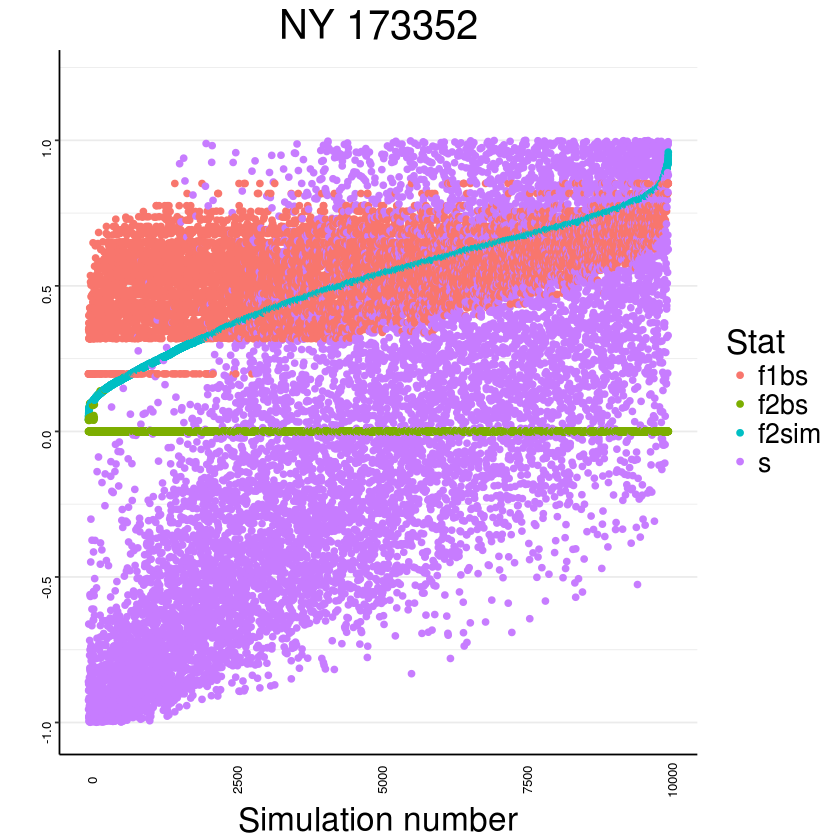

In [149]:
ggplot(NY_f2scount, aes(x=sim, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 173352") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Simulation number")+
    ylab("")+
    ylim(-1,1.2)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

In [31]:
sNY=lapply(NY_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})

In [32]:
head(sNY)

[[1]]
   [1]  0.568392934  0.439066180  0.485889636  0.383833420  0.230506157
   [6]  0.811154693 -0.058806612  0.287690906  0.079620465  0.545441979
  [11]  0.802839926  0.660622481  0.650359088  0.728180375  0.002390553
  [16]  0.959975537  0.801456689  0.570116763  0.816586492  0.340019292
  [21]  0.142873934  0.915115261  0.951363148  0.334281145  0.807844231
  [26]  0.252888514  0.483170751  0.311948674  0.763859387  0.758799622
  [31]  0.938350409  0.505976241  0.546354456  0.509315377  0.352929016
  [36]  0.831535561  0.414924674  0.917104577  0.439513315  0.537074226
  [41]  0.244151169  0.828392095  0.793704394  0.769634428  0.539974656
  [46]  0.676064431  0.586950078 -0.005149254  0.963019403  0.299368329
  [51]  0.533095967  0.735237005  0.654527730  0.689730140  0.173768596
  [56]  0.195528226  0.871925674  0.636433065  0.784115163  0.997504658
  [61]  0.275364959  0.562103728  0.065016831  0.640423655  0.883454918
  [66]  0.959430598 -0.129936181  0.194196493  0.451253441  0.719331603
  [71]  0.741462754  0.950153607  0.694773805  0.176793472  0.908516832
  [76]  0.764159510  0.727316721  0.810719229  0.846050391  0.170671934
  [81]  0.573169535  0.620937959  0.585719697  0.694733460  0.619002673
  [86]  0.998917961  0.877820852  0.214601897  0.346139868  0.811413939
  [91]  0.914234356  0.648396391  0.406796621  0.802421747  0.922716680
  [96]  0.989763016  0.749796630  0.695209038  0.400687188  0.533537515
 [101]  0.203878201  0.342158514  0.702610567  0.823671218  0.850583382
 [106]  0.822493595  0.530790864  0.332129171  0.031353956  0.923934069
 [111]  0.104246001  0.408904501 -0.070645455  0.643321679  0.939475198
 [116]  0.889975475  0.936935326  0.506021732  0.470377197  0.643848048
 [121]  0.422072709  0.143714244  0.900797955  0.416206033  0.976601199
 [126]  0.933731264  0.954128308  0.385599936  0.883282770 -0.158657480
 [131]  0.948291536  0.503431423  0.798552989  0.438287414  0.969568164
 [136]  0.918525961  0.902872900  0.256448241  0.878006435  0.803622690
 [141]  0.070932538  0.598312124  0.988008108  0.836239617  0.853347621
 [146]  0.413838980  0.682802401  0.703572188  0.463821694  0.455507841
 [151]  0.301377568  0.795090765  0.821002656  0.882759823  0.946103376
 [156]  0.606161109  0.325479822  0.899612486  0.675492656  0.586018197
 [161]  0.550532349  0.306037918  0.579706790  0.645881364  0.688090611
 [166]  0.584702243  0.919208997  0.192859321  0.955677375  0.210155512
 [171]  0.790969535  0.508359481  0.900906099  0.771140914  0.785168276
 [176]  0.867192816  0.387822280  0.774940795  0.432486050  0.733719906
 [181]  0.916953482  0.474671736  0.852326510  0.874611148  0.613165825
 [186]  0.020479122  0.558712617  0.365783600  0.222579454  0.717989272
 [191]  0.579466398  0.093826680  0.293953098  0.507529853  0.612061526
 [196]  0.573929021  0.684847043  0.303690830  0.814702225  0.952011826
 [201]  0.967508593  0.645672395  0.797896053  0.994945427  0.382215092
 [206]  0.710408606  0.404123607  0.895362370  0.705689720  0.672468127
 [211]  0.689620837  0.756210413  0.936107168  0.989763186  0.968329788
 [216]  0.709266342  0.807406330  0.906440629 -0.004907419  0.026935126
 [221]  0.664563558  0.447392887  0.974583520  0.546637026  0.888786726
 [226]  0.794896296  0.470618865  0.228387536  0.980459700  0.439316520
 [231]  0.561992539  0.811898786  0.954480580  0.160360772  0.731209047
 [236]  0.625920944  0.814388294  0.486732608  0.825796359  0.204666614
 [241]  0.945662551  0.781945260  0.789426426  0.763699356  0.640656004
 [246]  0.722908949  0.919135019  0.855147844  0.559682562  0.797106648
 [251]  0.687812649  0.632413477  0.728370485  0.612807280  0.951387146
 [256]  0.977757263  0.637869439  0.997794650  0.590565707  0.630887206
 [261]  0.815993569  0.909242705  0.908543790  0.693754177  0.963793062
 [266]  0.513886941  0.255539277  0.400493153  0.996569654  0.788093587
 [271]  0.602675340  0.852785631  0.760857643  0.937150389  0.684709572
 [276]  0.741676894  0.999407208  

In [ ]:
histogram of bootstrapped f1s, plots of the s and f2 simulations, a plot of the counts that came out of comparing observations to the f2 simulations, plots of the selected s and f2s fro the simulations,